In [1]:
# Technical Analysis
# 1. Introduction
# Technical analysis is the use of charts and technical indicators to identify trading signals and price patterns. 
# Various technical strategies will be investigated using the most common indicators.

In [2]:
# Importing libs
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator, DayLocator, MONDAY
import seaborn as sns

import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

from scipy import stats
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Let us begin agan by downloading FTSE 100 stock data from Yahoo! Finance and store it in a pandas dataframe.
# Same constituent companies as in Step - 1 wiill be selected. 

In [4]:
ftse100_stocks = yf.download("AZN.L GSK.L ULVR.L BP.L SHEL.L HSBA.L", start=datetime.datetime(2014, 1, 1), 
                                     end=datetime.datetime(2023, 12, 31), group_by='tickers')
ftse100_stocks.head(10)

[*********************100%%**********************]  6 of 6 completed


Ticker      SHEL.L                                                       \
Price         Open         High     Low   Close    Adj Close     Volume   
Date                                                                      
2014-01-02  2156.0  2164.500000  2141.5  2155.5  1236.284912  3014631.0   
2014-01-03  2155.5  2175.500000  2147.5  2158.5  1238.006104  1808530.0   
2014-01-06  2159.5  2162.500000  2144.0  2147.0  1231.410278  2424268.0   
2014-01-07  2147.5  2166.500000  2137.0  2159.0  1238.292603  1971412.0   
2014-01-08  2163.5  2164.500000  2141.0  2143.5  1229.402832  2202404.0   
2014-01-09  2147.0  2161.000000  2141.0  2145.0  1230.262817  2532490.0   
2014-01-10  2157.0  2190.500000  2156.5  2190.0  1256.072510  5353986.0   
2014-01-13  2181.5  2192.500000  2172.0  2190.0  1256.072510  2483459.0   
2014-01-14  2171.0  2181.975098  2161.0  2174.0  1246.895752  2485415.0   
2014-01-15  2179.0  2187.000000  2167.5  2180.0  1250.337280  3330035.0   

Ticker       AZN.L                                    ...       ULVR.L  \
Price         Open         High          Low   Close  ...          Low   
Date                                                  ...                
2014-01-02  3566.0  3592.500000  3545.500000  3558.0  ...  2432.000000   
2014-01-03  3561.5  3604.000000  3554.000000  3585.5  ...  2434.824951   
2014-01-06  3579.0  3607.850098  3579.000000  3598.5  ...  2429.000000   
2014-01-07  3584.0  3591.000000  3557.000000  3562.5  ...  2438.719971   
2014-01-08  3558.0  3571.500000  3539.500000  3549.5  ...  2402.000000   
2014-01-09  3575.0  3613.750000  3564.000000  3572.5  ...  2362.000000   
2014-01-10  3598.5  3676.000000  3580.500000  3652.0  ...  2374.040039   
2014-01-13  3671.0  3675.500000  3367.070068  3663.5  ...  2372.225098   
2014-01-14  3714.0  3779.500000  3696.000000  3755.5  ...  2381.000000   
2014-01-15  3764.5  3845.000000  3746.639893  3845.0  ...  2377.335938   

Ticker                                            BP.L              \
Price        Close    Adj Close     Volume        Open        High   
Date                                                                 
2014-01-02  2436.0  1741.064209  1852349.0  490.950012  490.950012   
2014-01-03  2445.0  1747.496704  1398177.0  488.850006  493.399994   
2014-01-06  2441.0  1744.637451  1432621.0  488.350006  491.600006   
2014-01-07  2443.0  1746.067139  1399261.0  488.049988  495.109009   
2014-01-08  2409.0  1721.766479  1863248.0  494.500000  494.721008   
2014-01-09  2370.0  1693.892822  2966235.0  495.100006  499.899994   
2014-01-10  2388.0  1706.757446  4714168.0  489.000000  499.350006   
2014-01-13  2402.0  1716.763672  2548625.0  496.299988  497.649994   
2014-01-14  2413.0  1724.625732  1717866.0  490.950012  492.808014   
2014-01-15  2406.0  1719.622314  2733235.0  493.399994  494.899994   

Ticker                                                      
Price              Low       Close   Adj Close      Volume  
Date                                                        
2014-01-02  484.649994  488.850006  267.519196  17484921.0  
2014-01-03  486.200012  487.899994  266.999268  18104875.0  
2014-01-06  485.100006  488.950012  267.573853  18270944.0  
2014-01-07  484.100006  494.000000  270.337463  23078624.0  
2014-01-08  491.250000  492.850006  269.708160  15469583.0  
2014-01-09  494.100006  495.299988  271.048828  24620468.0  
2014-01-10  487.000000  497.000000  271.979218  37147710.0  
2014-01-13  490.544006  495.799988  271.322418  21919521.0  
2014-01-14  487.000000  491.049988  268.723145  22855348.0  
2014-01-15  491.045013  492.850006  269.708160  27630089.0  

[10 rows x 36 columns]

In [5]:
# HSBC stock (HSBA.L) data will be selected for plotting charts and testing various trading strategies for no specific reason other than
# personal preference.

In [6]:
hsba =  ftse100_stocks['HSBA.L']
                                     
hsba.head()

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  658.400024  661.200012  654.599976  659.700012  383.506287   
2014-01-03  653.000000  659.388000  649.796997  656.400024  381.587799   
2014-01-06  658.099976  664.299988  656.388000  660.000000  383.680542   
2014-01-07  659.799988  678.400024  659.599976  675.799988  392.865692   
2014-01-08  673.099976  677.940979  671.911011  674.500000  392.110046   

Price         Volume  
Date                  
2014-01-02  15181957  
2014-01-03  15846261  
2014-01-06  26415293  
2014-01-07  31453649  
2014-01-08  24154793

In [7]:
# Visualising stock data
# Japanese candlestick charts are tools used in a particular trading style called price action to predict market movement through 
# pattern recognition of continuations, breakouts and reversals.
# Unlike a line chart, all of the price information can be viewed in one figure showing the high, low, open and close price of the day 
# or chosen time frame. Price action traders observe patterns formed by green bullish candles where the stock is trending upwards
# over time, and red bearish candles where there is a downward trend.

In [277]:
def pandas_candlestick_ohlc(dat, stick="day", otherseries=None, txt=""):
    """
    Japanese candlestick chart showing OHLC prices for a specified time period

    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
    :param txt: Title text for the candlestick chart

    :returns: a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    sns.set(rc={'figure.figsize':(20, 10)})
    sns.set_style("whitegrid")  # Apply seaborn whitegrid style to the plots 

    transdat = dat.loc[:, ["Open", "High", "Low", "Close"]].copy()

    if type(stick) == str and stick in ["day", "week", "month", "year"]:
        if stick != "day":
            if stick == "week":
                transdat['period'] = pd.to_datetime(transdat.index).map(lambda x: x.strftime('%Y-%U'))
            elif stick == "month":
                transdat['period'] = pd.to_datetime(transdat.index).map(lambda x: x.strftime('%Y-%m'))
            elif stick == "year":
                transdat['period'] = pd.to_datetime(transdat.index).map(lambda x: x.strftime('%Y'))
            
            grouped = transdat.groupby('period')
            plotdat = pd.DataFrame([{
                "Open": group.iloc[0]["Open"],
                "High": max(group["High"]),
                "Low": min(group["Low"]),
                "Close": group.iloc[-1]["Close"]
            } for _, group in grouped], index=pd.to_datetime([period for period, _ in grouped]))
        else:
            plotdat = transdat
            plotdat['period'] = pd.to_datetime(plotdat.index)
    elif type(stick) == int and stick >= 1:
        transdat['period'] = np.floor(np.arange(len(transdat)) / stick)
        grouped = transdat.groupby('period')
        plotdat = pd.DataFrame([{
            "Open": group.iloc[0]["Open"],
            "High": max(group["High"]),
            "Low": min(group["Low"]),
            "Close": group.iloc[-1]["Close"]
        } for _, group in grouped], index=[group.index[0] for _, group in grouped])
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')

    plotdat['date_num'] = date2num(plotdat.index.to_pydatetime())

    fig, ax = plt.subplots()
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(20, 10)})
    candlestick_ohlc(ax, plotdat[['date_num', 'Open', 'High', 'Low', 'Close']].values, width=0.6/(24*60), colorup='g', colordown='r')

    if otherseries is not None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        for series in otherseries:
            dat[series].plot(ax=ax, lw=1.3)

    plt.title(f"Candlestick chart of HSBA.L OHLC stock prices from 01 Jan 2014 - 31 Dec 2023", color = 'black', fontsize = 20)
    plt.xlabel('Date', color = 'black', fontsize = 15)
    plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15)
    candlestick_ohlc(ax, plotdat[['date_num', 'Open', 'High', 'Low', 'Close']].values, width=20, colorup='g', colordown='r')

    plt.show()
  

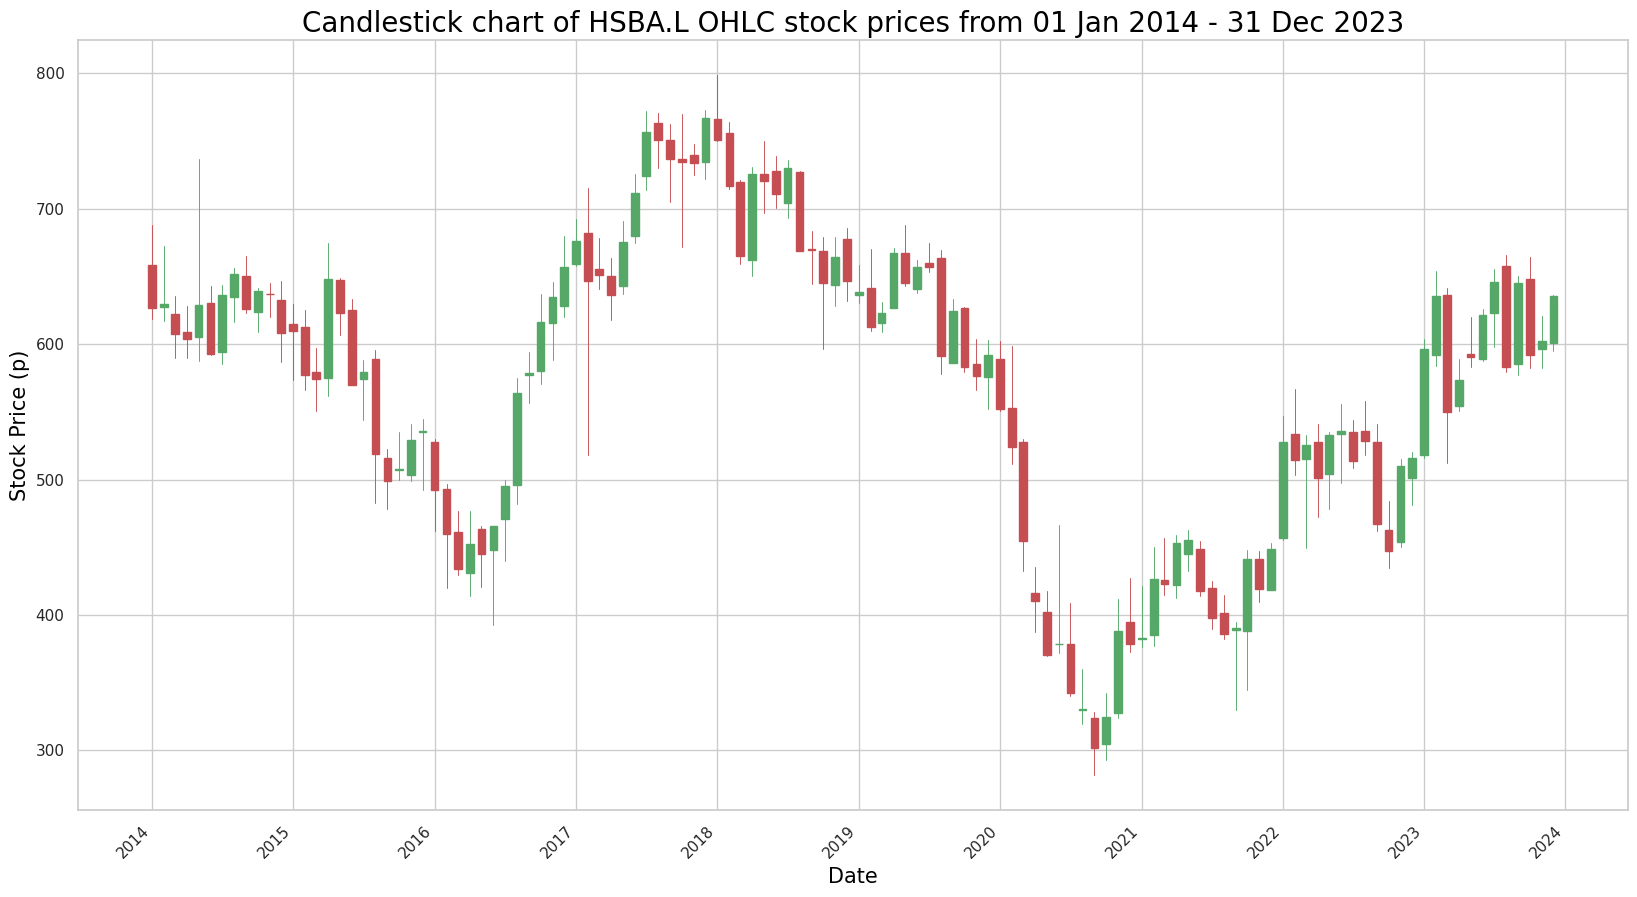

In [278]:

# Plot candlestick chart for 10 year period from 20114-20223

pandas_candlestick_ohlc(hsba, stick="month")

In [11]:
# Technical Indicators and Strategies
# A technical indicator is a series of data points that are derived by applying a formula to the price data of a security. Basically, they are price-derived indicators
# that use formulas to translate the momentum or price levels into quantifiable time series.

# There are two categories of indicator: leading and lagging, and four types: trend, momentum, volatility and volume, which serve three broad functions: to alert, 
# to confirm and to predict.

# Trend-following strategies
# Trend-following is about profiting from the prevailing trend through buying an asset when its price trend goes up, and selling when its trend goes down, 
# expecting price movements to continue.

# Moving averages
# Moving averages smooth a series filtering out noise to help identify trends, one of the fundamental principles of technical analysis being that prices move in trends. 
# Types of moving averages include simple, exponential, smoothed, linear-weighted, MACD, and as lagging indicators they follow the price action and are commonly referred 
# to as trend-following indicators.

# Simple Moving Average (SMA)
# The simplest form of a moving average, known as a Simple Moving Average (SMA), is calculated by taking the arithmetic mean of a given set of values over a set time period.
# This model is probably the most naive approach to time series modelling and simply states that the next observation is the mean of all past observations and each value in
# the time period carries equal weight.

# Modelling this an as average calculation problem we would try to predict the future stock market prices (for example, xt+1 ) as an average of the previously observed 
# stock market prices within a fixed size window (for example, xt-n, ..., xt). This helps smooth out the price data by creating a constantly updated average price so
# that the impacts of random, short-term fluctuations on the price of a stock over a specified time-frame are mitigated.


In [12]:
def sma():
  plt.figure(figsize=(15,9))
  ftse100_stocks[ticker]['Adj Close'].loc['2023-01-01':'2023-12-31'].rolling(window=20).mean().plot(label='20 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2023-01-01':'2023-12-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

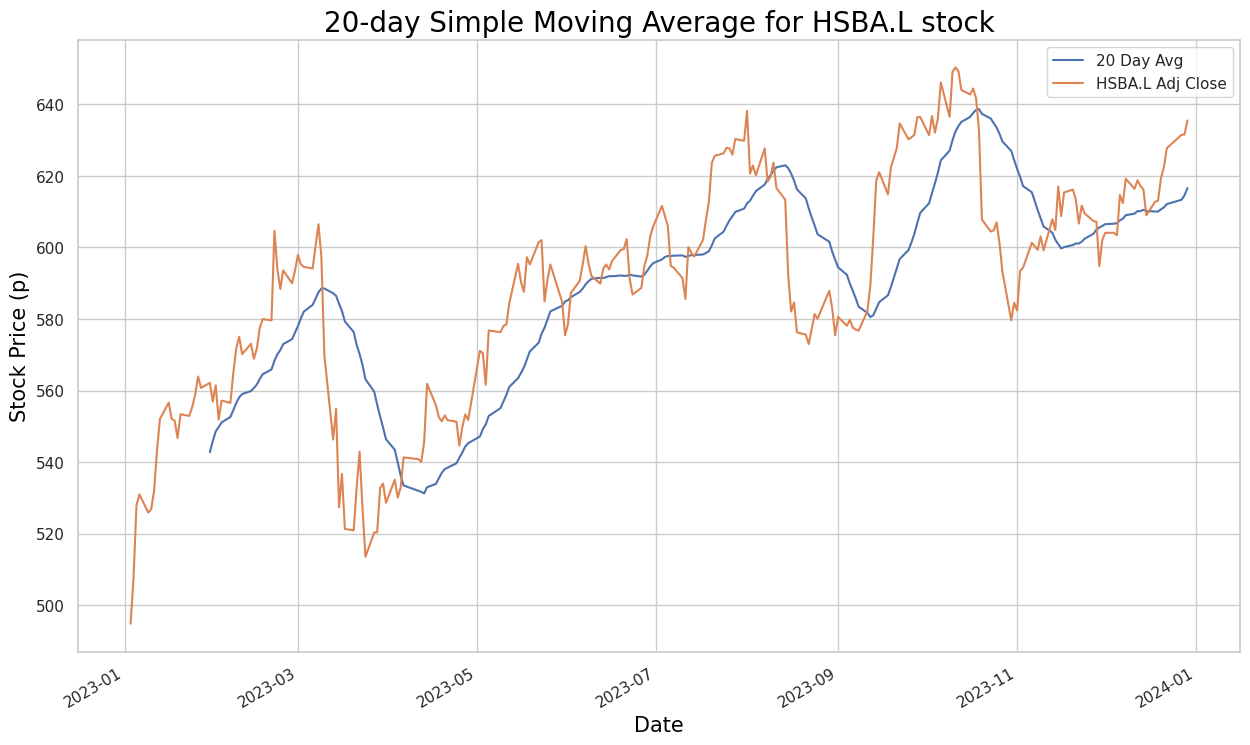

In [13]:
ticker = 'HSBA.L'
title_txt = "20-day Simple Moving Average for HSBA.L stock"
label_txt = "HSBA.L Adj Close"

sma()

In [14]:
# The SMA follows the time series removing noise from the signal and keeping the relevant information about the trend. If the stock price is above its moving average 
# it is assumed that it will likely continue rising in an uptrend.

In [15]:
# Moving Average Crossover Strategy
# The most popular moving average crossover strategy, and the "Hello World!" of quantitative trading, being the easiest to construct, is based on the simple moving average.
# When moving averages cross, it is usually confirmation of a change in the prevailing trend, and we want to test whether over the long term the lag caused by the moving 
# average can still give us profitable trades.

# Depending on the type of investor or trader (high risk vs. low risk, short-term vs. long-term trading), you can adjust your moving ‘time’ average 
# (10 days, 20 days, 50 days, 200 days, 1 year, 5 years, etc). The longer the period of an SMA, the longer the time horizon of the trend it spots. 
# The most commonly used SMA periods are 20 for short-term (swing) trading, 50 for medium-term (position) trading and 200 for long-term (portfolio) trading.

# There is no single right answer and this will vary according to whether a trader is planning to buy when the trend is going down and sell when it's going up, 
# potentially making short-term gains, or to hold for a more long-term investment.

In [16]:
def sma2():
  plt.figure(figsize=(15,9))
  ftse100_stocks[ticker]['Adj Close'].loc['2020-01-01':'2023-12-31'].rolling(window=20).mean().plot(label='20 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2020-01-01':'2023-12-31'].rolling(window=50).mean().plot(label='50 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2020-01-01':'2023-12-31'].rolling(window=200).mean().plot(label='200 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2020-01-01':'2023-12-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

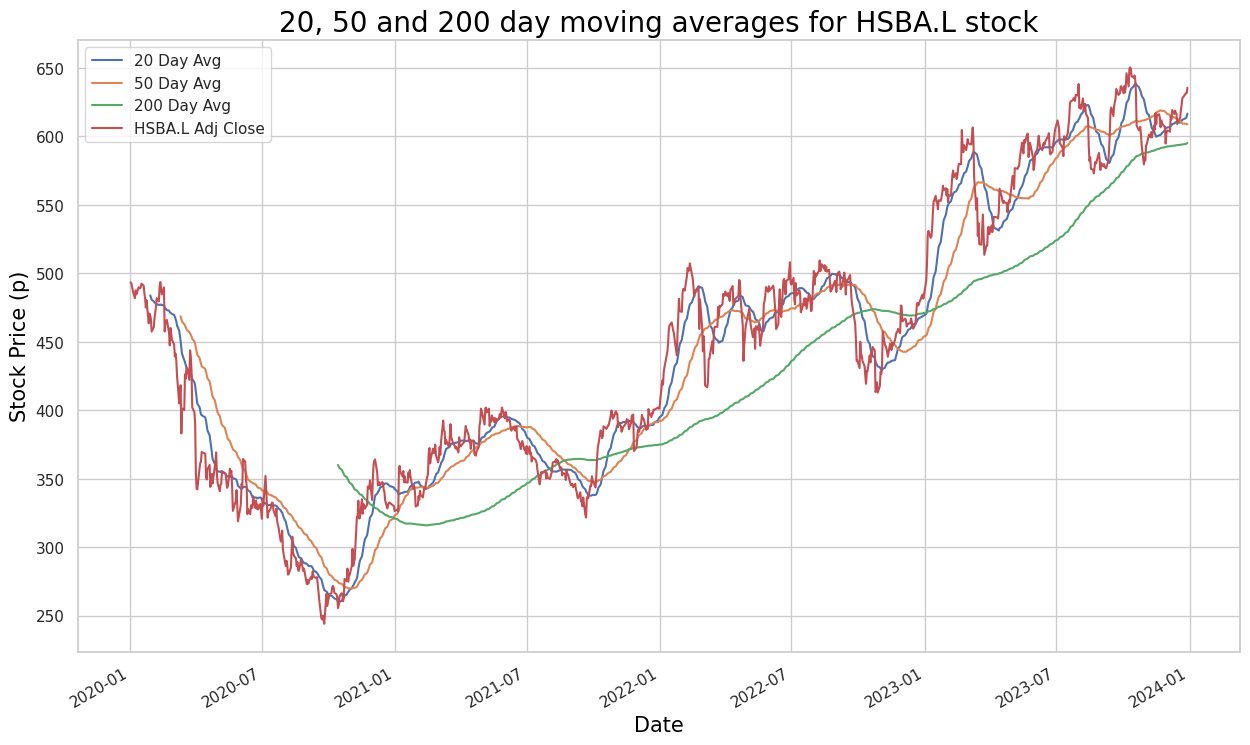

In [17]:
ticker = 'HSBA.L'

title_txt = "20, 50 and 200 day moving averages for HSBA.L stock"
label_txt = "HSBA.L Adj Close"

sma2()

In [18]:
# The chart shows that the 20-day moving average is the most sensitive to local changes, and the 200-day moving average the least.
# Here, the 200-day moving average indicates an overall bullish trend - the stock is trending upward over time. The 20- and 50-day moving averages are at times bearish
# and at other times bullish.

# The major drawback of moving averages, however, is that because they are lagging, and smooth out prices, they tend to recognise reversals too late and are therefore 
# not very helpful when used alone.

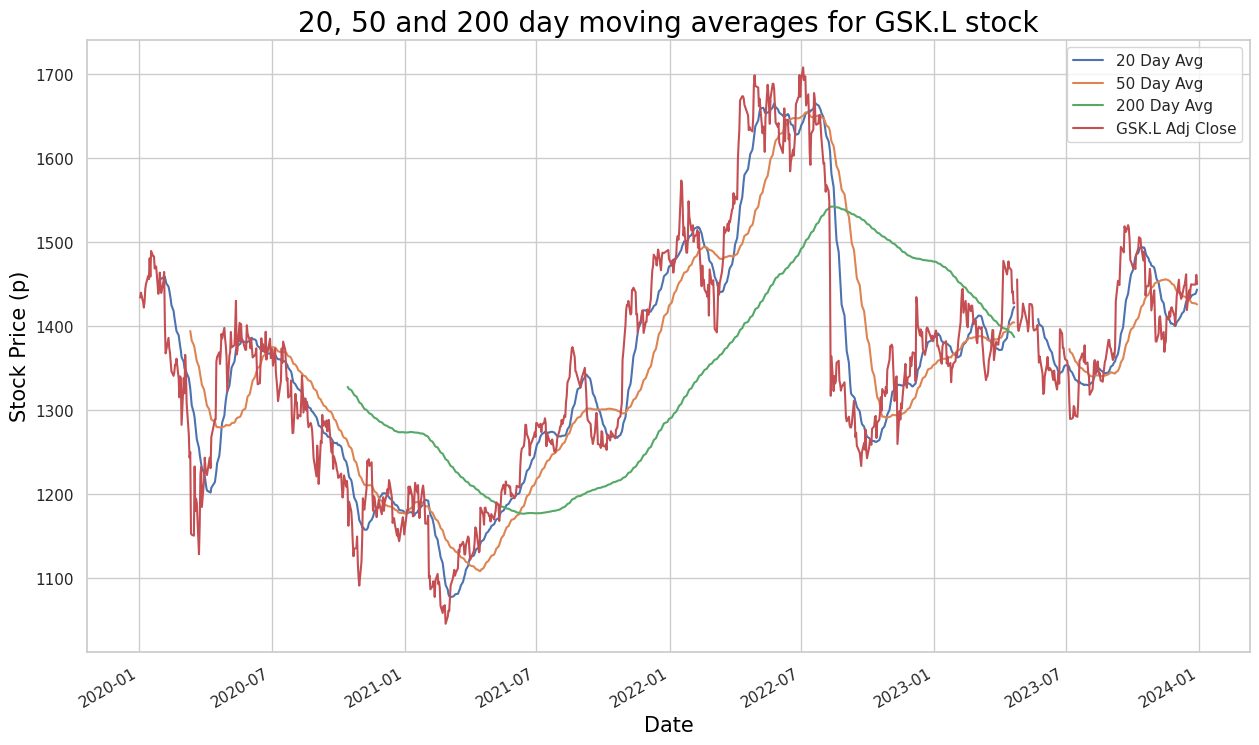

In [19]:
# For statisticcal accuracy we should plot the same 20, 50 and 200 day MA for a company of the same sector, however we happened to select HSBC - the only company from 
# banking in the list of our honouran;e guinea pigs. So let us do a GlaxoSmithKline Adjusted Close price data for the same time period, just for the sake of it. 

ticker = 'GSK.L'

title_txt = "20, 50 and 200 day moving averages for GSK.L stock"
label_txt = "GSK.L Adj Close"

sma2()

In [20]:
#Trading Strategy
# The moving average crossover trading strategy will be to take two moving averages - 20-day (fast) and 200-day (slow) - and to go long (buy) when the fast MA goes 
# above the slow MA and to go short (sell) when the fast MA goes below the slow MA.

In [21]:
# Create copy of dataframe for HSBC data for 2014-2024

hsba_sma = hsba.copy()

In [22]:
hsba_sma

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  658.400024  661.200012  654.599976  659.700012  383.506287   
2014-01-03  653.000000  659.388000  649.796997  656.400024  381.587799   
2014-01-06  658.099976  664.299988  656.388000  660.000000  383.680542   
2014-01-07  659.799988  678.400024  659.599976  675.799988  392.865692   
2014-01-08  673.099976  677.940979  671.911011  674.500000  392.110046   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2014-01-02  15181957  
2014-01-03  15846261  
2014-01-06  26415293  
2014-01-07  31453649  
2014-01-08  24154793  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[2525 rows x 6 columns]

In [23]:
 # Calculate and add columns for moving averages of Adjusted Close price data
  
hsba_sma["20d"] = np.round(hsba_sma["Adj Close"].rolling(window = 20, center = False).mean(), 2)
hsba_sma["50d"] = np.round(hsba_sma["Adj Close"].rolling(window = 50, center = False).mean(), 2)
hsba_sma["200d"] = np.round(hsba_sma["Adj Close"].rolling(window = 200, center = False).mean(), 2)

In [24]:
hsba_sma.tail()

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume     20d     50d    200d  
Date                                          
2023-12-21  21034187  611.22  609.76  593.99  
2023-12-22  10833490  612.14  609.44  594.14  
2023-12-27  16151929  613.34  609.21  594.45  
2023-12-28   9952106  614.56  608.95  594.87  
2023-12-29   5844099  616.59  608.83  595.28

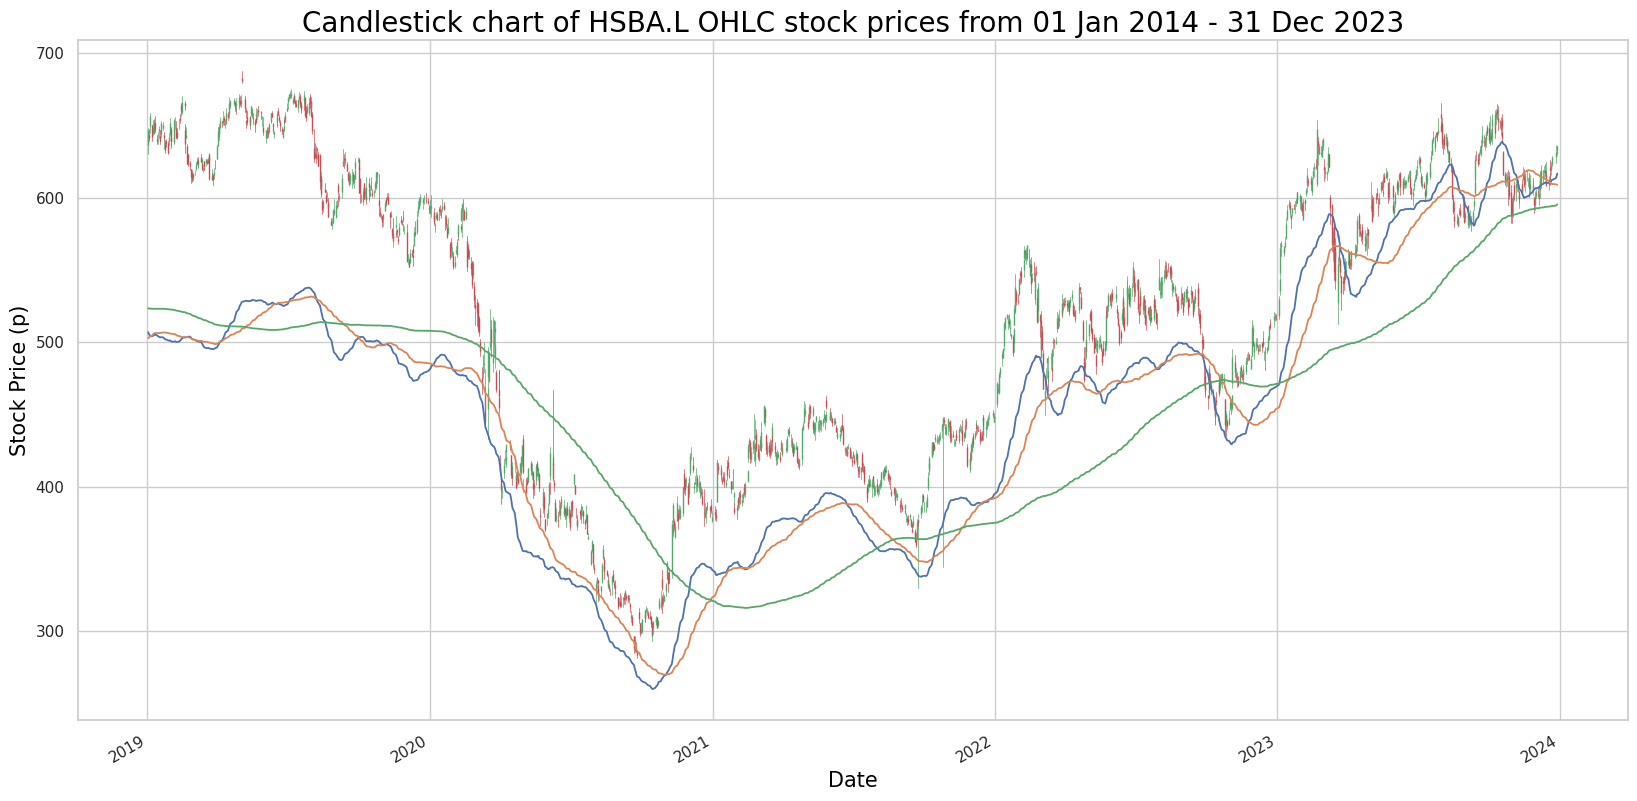

In [25]:
txt = "20, 50 and 200 day moving averages for HSBA.L stock"

# Slice rows to plot data from 2019-20123 
pandas_candlestick_ohlc(hsba_sma.loc['2019-01-01':'2023-12-31',:], otherseries = ["20d", "50d", "200d"])

In [26]:
# Backtesting
# Before using the strategy we will evaluate the quality of it first by backtesting, or looking at how profitable it is on historical data.
# Identify when the 20-day average is below the 200-day average, and vice versa.

hsba_sma['20d-200d'] = hsba_sma['20d'] - hsba_sma['200d']
hsba_sma.tail()

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume     20d     50d    200d  20d-200d  
Date                                                    
2023-12-21  21034187  611.22  609.76  593.99     17.23  
2023-12-22  10833490  612.14  609.44  594.14     18.00  
2023-12-27  16151929  613.34  609.21  594.45     18.89  
2023-12-28   9952106  614.56  608.95  594.87     19.69  
2023-12-29   5844099  616.59  608.83  595.28     21.31

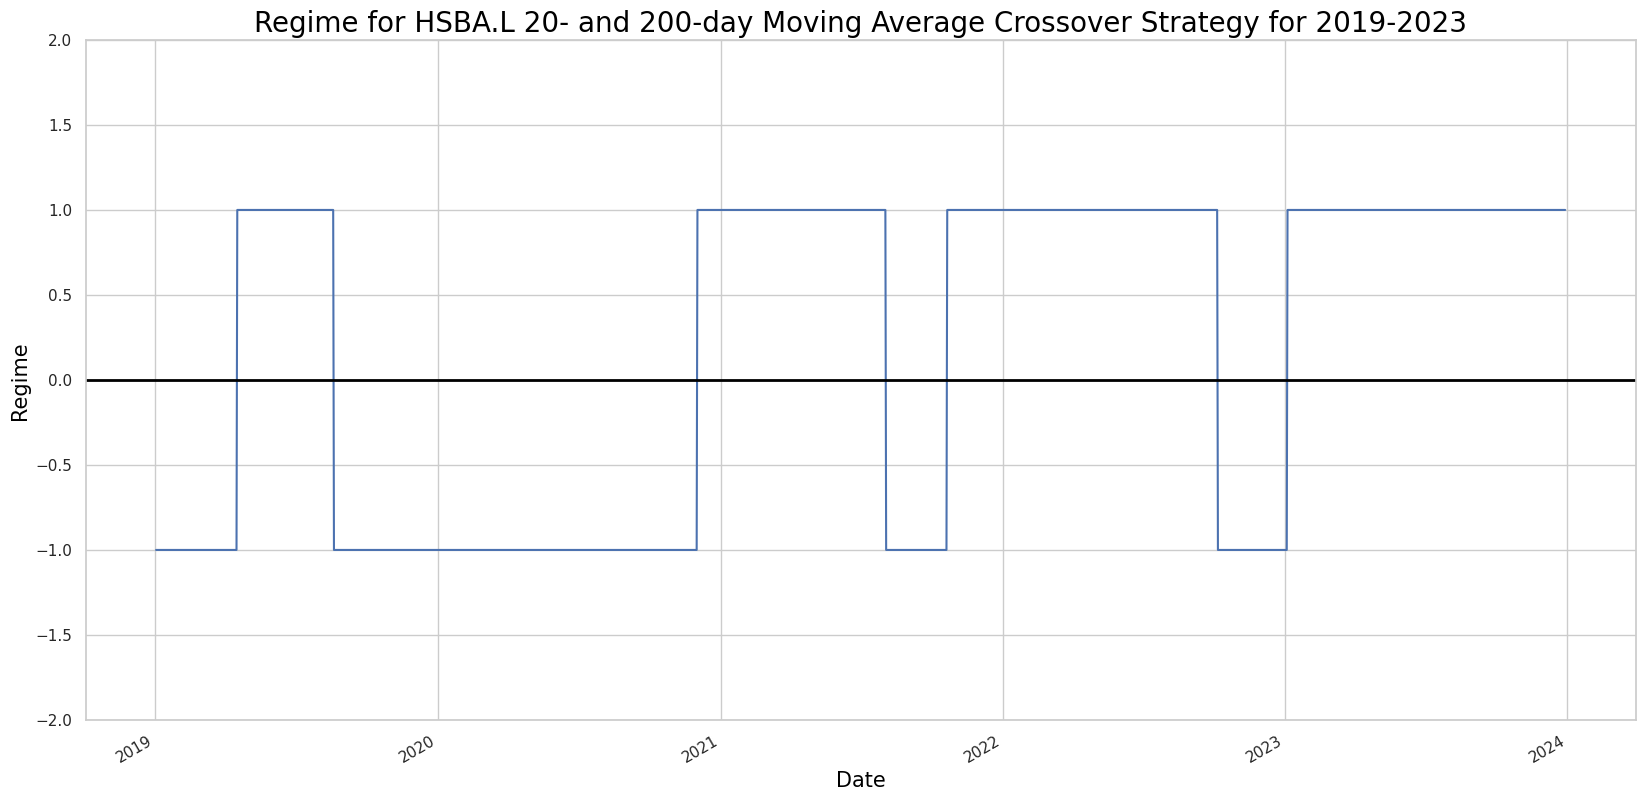

In [27]:
# The sign of this difference is the regime; that is, if the fast moving average is above the slow moving average, 
# this is a bullish regime, and a bearish regime holds when the fast moving average is below the slow moving average

# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
hsba_sma["Regime"] = np.where(hsba_sma['20d-200d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Replace bearish regime's values with -1, and to maintain the rest of the vector, the second argument is hsba_sma["Regime"]
hsba_sma["Regime"] = np.where(hsba_sma['20d-200d'] < 0, -1, hsba_sma["Regime"])
hsba_sma.loc['2019-01-01':'2023-12-31',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2);
plt.title("Regime for HSBA.L 20- and 200-day Moving Average Crossover Strategy for 2019-2023", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Regime', color = 'black', fontsize = 15);

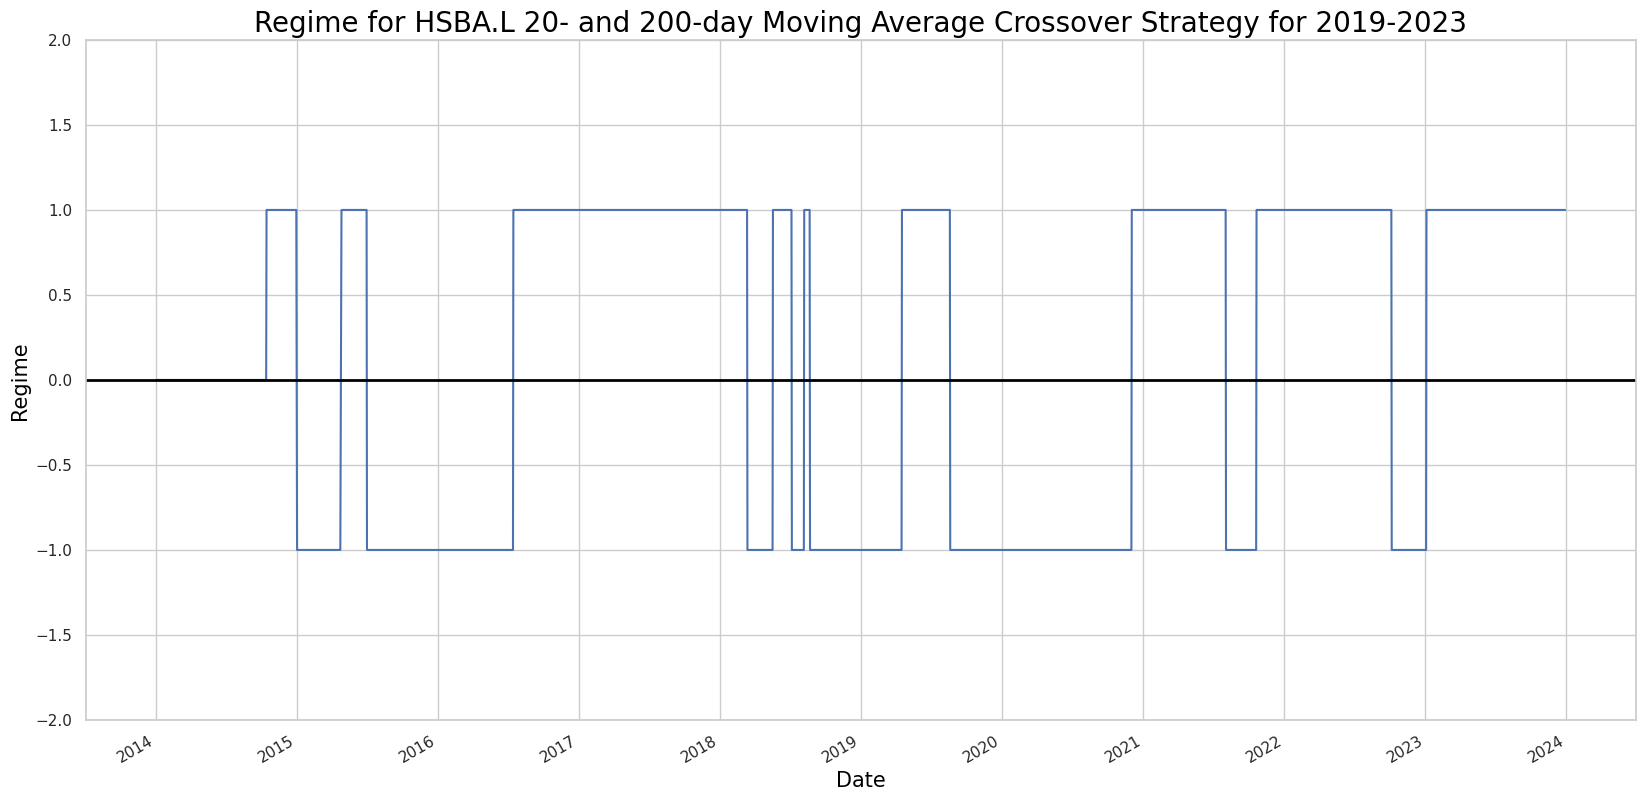

In [28]:
hsba_sma["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2);
plt.title("Regime for HSBA.L 20- and 200-day Moving Average Crossover Strategy for 2019-2023", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Regime', color = 'black', fontsize = 15);

In [29]:
# Number of bullish and bearish days

hsba_sma["Regime"].value_counts()

Regime
 1    1307
-1    1019
 0     199
Name: count, dtype: int64

In [30]:
# For 1715 days the market was bullish, for 604 days it was bearish, and neutral for 199 days for the time period 2019-2023

In [31]:
hsba_sma

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  658.400024  661.200012  654.599976  659.700012  383.506287   
2014-01-03  653.000000  659.388000  649.796997  656.400024  381.587799   
2014-01-06  658.099976  664.299988  656.388000  660.000000  383.680542   
2014-01-07  659.799988  678.400024  659.599976  675.799988  392.865692   
2014-01-08  673.099976  677.940979  671.911011  674.500000  392.110046   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume     20d     50d    200d  20d-200d  Regime  
Date                                                            
2014-01-02  15181957     NaN     NaN     NaN       NaN       0  
2014-01-03  15846261     NaN     NaN     NaN       NaN       0  
2014-01-06  26415293     NaN     NaN     NaN       NaN       0  
2014-01-07  31453649     NaN     NaN     NaN       NaN       0  
2014-01-08  24154793     NaN     NaN     NaN       NaN       0  
...              ...     ...     ...     ...       ...     ...  
2023-12-21  21034187  611.22  609.76  593.99     17.23       1  
2023-12-22  10833490  612.14  609.44  594.14     18.00       1  
2023-12-27  16151929  613.34  609.21  594.45     18.89       1  
2023-12-28   9952106  614.56  608.95  594.87     19.69       1  
2023-12-29   5844099  616.59  608.83  595.28     21.31       1  

[2525 rows x 11 columns]

In [32]:
# Obtain signals with -1 indicating “sell”, 1 indicating “buy”, and 0 no action
# To ensure that all trades close out, temporarily change the regime of the last row to 0
regime_orig = hsba_sma.iloc[-1, 10]
hsba_sma.iloc[-1, 10] = 0
hsba_sma["Signal"] = np.sign(hsba_sma["Regime"] - hsba_sma["Regime"].shift(1))
# Restore original regime data
hsba_sma.iloc[-1, 10] = regime_orig
hsba_sma.tail()

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume     20d     50d    200d  20d-200d  Regime  Signal  
Date                                                                    
2023-12-21  21034187  611.22  609.76  593.99     17.23       1     0.0  
2023-12-22  10833490  612.14  609.44  594.14     18.00       1     0.0  
2023-12-27  16151929  613.34  609.21  594.45     18.89       1     0.0  
2023-12-28   9952106  614.56  608.95  594.87     19.69       1     0.0  
2023-12-29   5844099  616.59  608.83  595.28     21.31       1    -1.0

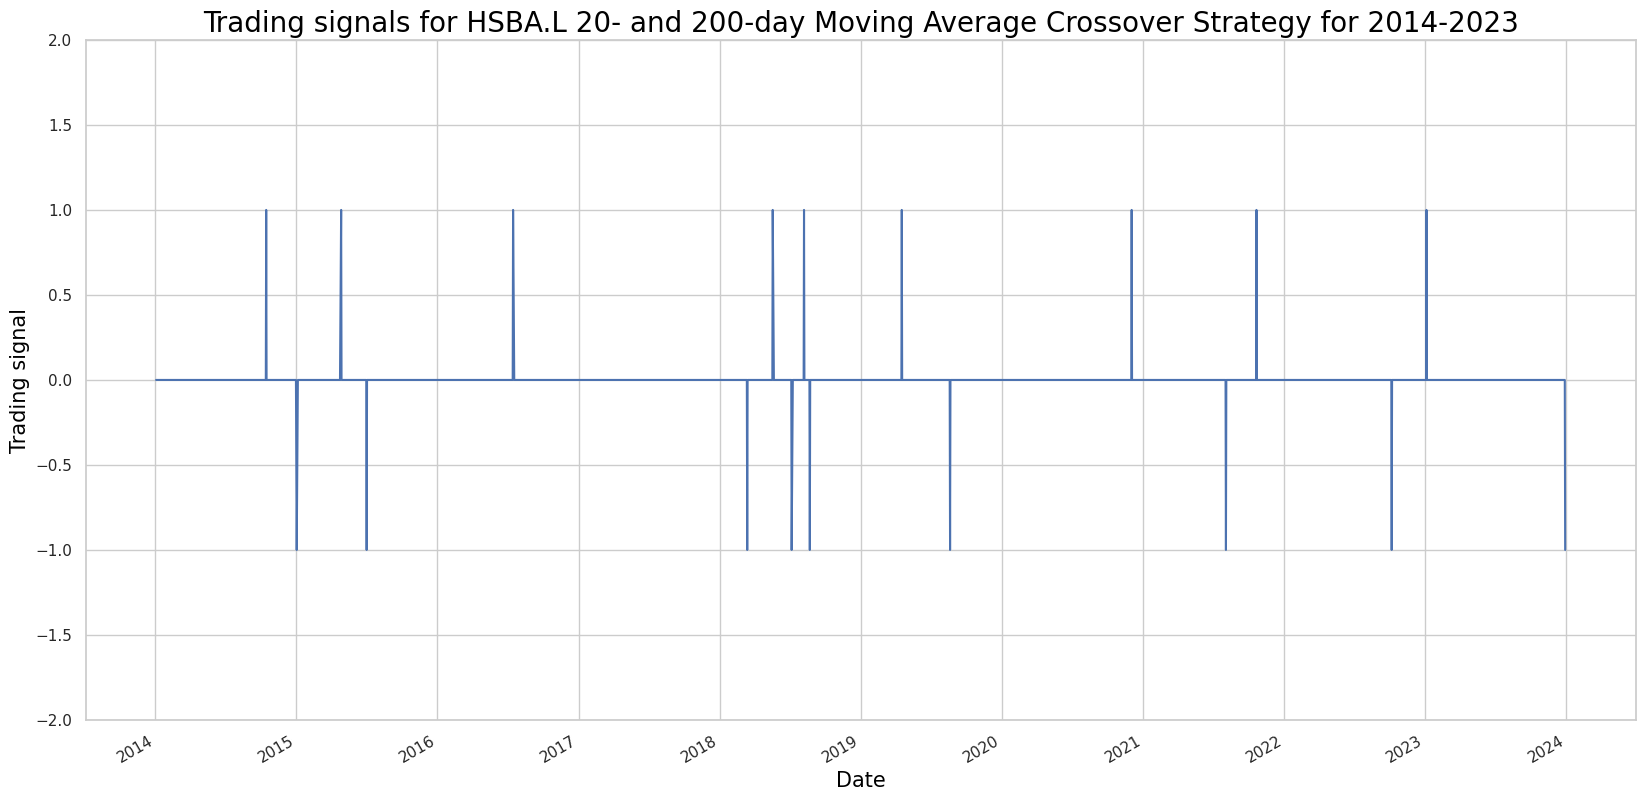

In [33]:
hsba_sma["Signal"].plot(ylim = (-2, 2));
plt.title("Trading signals for HSBA.L 20- and 200-day Moving Average Crossover Strategy for 2014-2023", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Trading signal', color = 'black', fontsize = 15);

In [34]:
# Unique counts of trading signals

hsba_sma["Signal"].value_counts()

Signal
 0.0    2506
 1.0       9
-1.0       9
Name: count, dtype: int64

In [35]:
# We would buy HSBC stock 14 times and sell 14 times. If we only go long 14 trades will be engaged in over the 10-year period, while if we pivot 
# from a long to a short position every time a long position is terminated, we would engage in 14 trades total. 
# It is worth bearing in mind that trading more frequently isn’t necessarily good as trades are never free.

In [36]:
# Identify what the price of the stock is at every buy.

hsba_sma.loc[hsba_sma["Signal"] == 1, "Close"]

Date
2014-10-15    617.000000
2015-04-27    649.299988
2016-07-15    479.299988
2018-05-18    732.900024
2018-08-07    716.099976
2019-04-17    665.299988
2020-12-02    418.350006
2021-10-21    434.750000
2023-01-04    543.500000
Name: Close, dtype: float64

In [37]:
# Identify what the price of the stock is at every sell.

hsba_sma.loc[hsba_sma["Signal"] == -1, "Close"]

Date
2015-01-02    612.000000
2015-07-02    578.000000
2018-03-13    697.799988
2018-07-06    702.299988
2018-08-22    689.299988
2019-08-20    596.900024
2021-08-03    398.049988
2022-10-06    471.299988
2023-12-29    635.500000
Name: Close, dtype: float64

In [38]:
# Create a dataframe with trades, including the price at the trade and the regime under which the trade is made.

hsba_signals = pd.concat([
        pd.DataFrame({"Price": hsba_sma.loc[hsba_sma["Signal"] == 1, "Adj Close"],
                     "Regime": hsba_sma.loc[hsba_sma["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": hsba_sma.loc[hsba_sma["Signal"] == -1, "Adj Close"],
                     "Regime": hsba_sma.loc[hsba_sma["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
hsba_signals.sort_index(inplace = True)
hsba_signals

Price  Regime Signal
Date                                 
2014-10-15  372.369720       1    Buy
2015-01-02  373.114258      -1   Sell
2015-04-27  405.116882       1    Buy
2015-07-02  364.357330      -1   Sell
2016-07-15  325.277649       1    Buy
2018-03-13  525.293640      -1   Sell
2018-05-18  557.413025       1    Buy
2018-07-06  534.140015      -1   Sell
2018-08-07  544.635681       1    Buy
2018-08-22  529.985962      -1   Sell
2019-04-17  530.836914       1    Buy
2019-08-20  488.471710      -1   Sell
2020-12-02  360.469574       1    Buy
2021-08-03  351.481354      -1   Sell
2021-10-21  388.797729       1    Buy
2022-10-06  440.105591      -1   Sell
2023-01-04  507.526855       1    Buy
2023-12-29  635.500000       1   Sell

In [39]:
# Let's see the profitability of long trades

hsba_long_profits = pd.DataFrame({
        "Price": hsba_signals.loc[(hsba_signals["Signal"] == "Buy") &
                                  hsba_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(hsba_signals["Price"] - hsba_signals["Price"].shift(1)).loc[
            hsba_signals.loc[(hsba_signals["Signal"].shift(1) == "Buy") & (hsba_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": hsba_signals["Price"].loc[
            hsba_signals.loc[(hsba_signals["Signal"].shift(1) == "Buy") & (hsba_signals["Regime"].shift(1) == 1)].index
        ].index
    })
hsba_long_profits

Price      Profit   End Date
Date                                         
2014-10-15  372.369720    0.744537 2015-01-02
2015-04-27  405.116882  -40.759552 2015-07-02
2016-07-15  325.277649  200.015991 2018-03-13
2018-05-18  557.413025  -23.273010 2018-07-06
2018-08-07  544.635681  -14.649719 2018-08-22
2019-04-17  530.836914  -42.365204 2019-08-20
2020-12-02  360.469574   -8.988220 2021-08-03
2021-10-21  388.797729   51.307861 2022-10-06
2023-01-04  507.526855  127.973145 2023-12-29

In [40]:
# Exponential Moving Average
# In a Simple Moving Average, each value in the time period carries equal weight, and values outside of the time period are not included in the average. 
# However, the Exponential Moving Average is a cumulative calculation where a different decreasing weight is assigned to each observation. 
# Past values have a diminishing contribution to the average, while more recent values have a greater contribution. This method allows the moving average 
# to be more responsive to changes in the data.

In [41]:
# 20-day EMA for Adjusted Close price for 2023

def ewma():
  plt.figure(figsize=(15,9))
  ftse100_stocks[ticker]['Adj Close'].loc['2023-01-01':'2023-12-31'].ewm(20).mean().plot(label='20 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2023-01-01':'2023-12-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

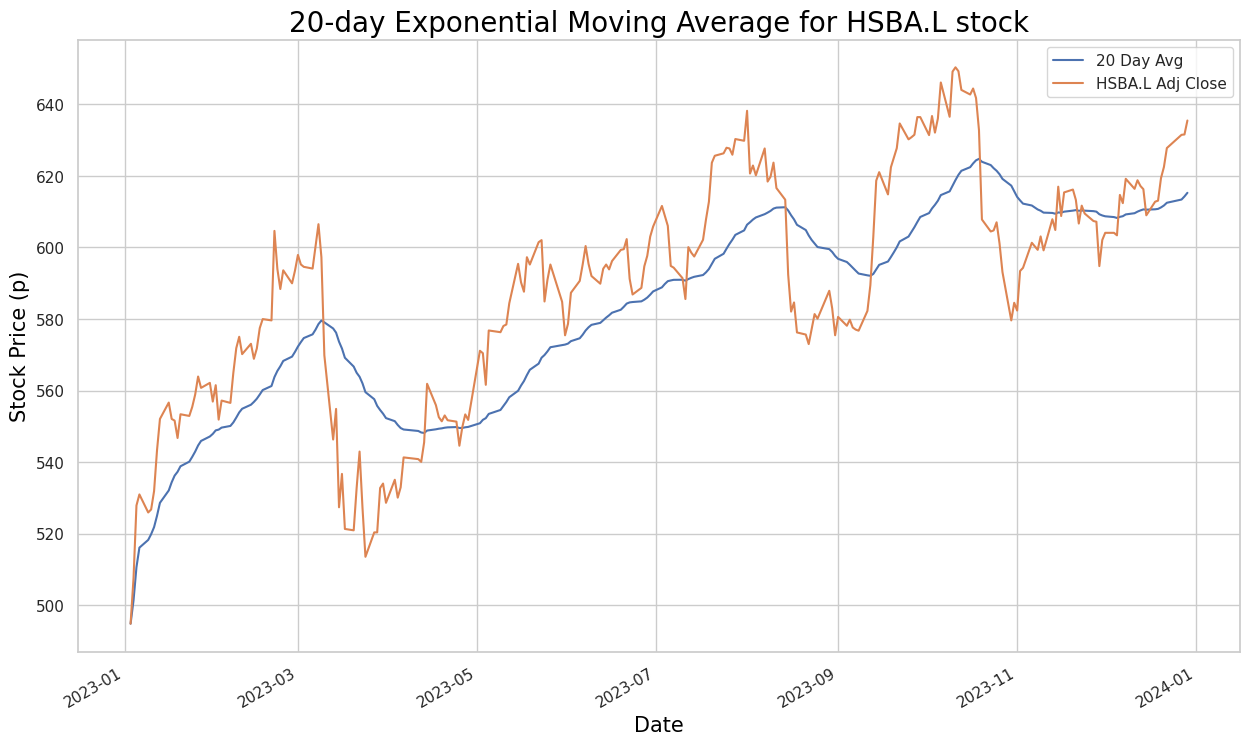

In [42]:
ticker = 'HSBA.L'
title_txt = "20-day Exponential Moving Average for HSBA.L stock"
label_txt = "HSBA.L Adj Close"

ewma()

In [43]:
# 20-, 50- and 200-day EMA for Adjusted Close price for 2016-2019

def ewma2():
  plt.figure(figsize=(15,9))
  ftse100_stocks[ticker]['Adj Close'].loc['2019-01-01':'2023-12-31'].ewm(20).mean().plot(label='20 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2019-01-01':'2023-12-31'].ewm(50).mean().plot(label='50 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2019-01-01':'2023-12-31'].ewm(200).mean().plot(label='200 Day Avg')
  ftse100_stocks[ticker]['Adj Close'].loc['2019-01-01':'2023-12-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

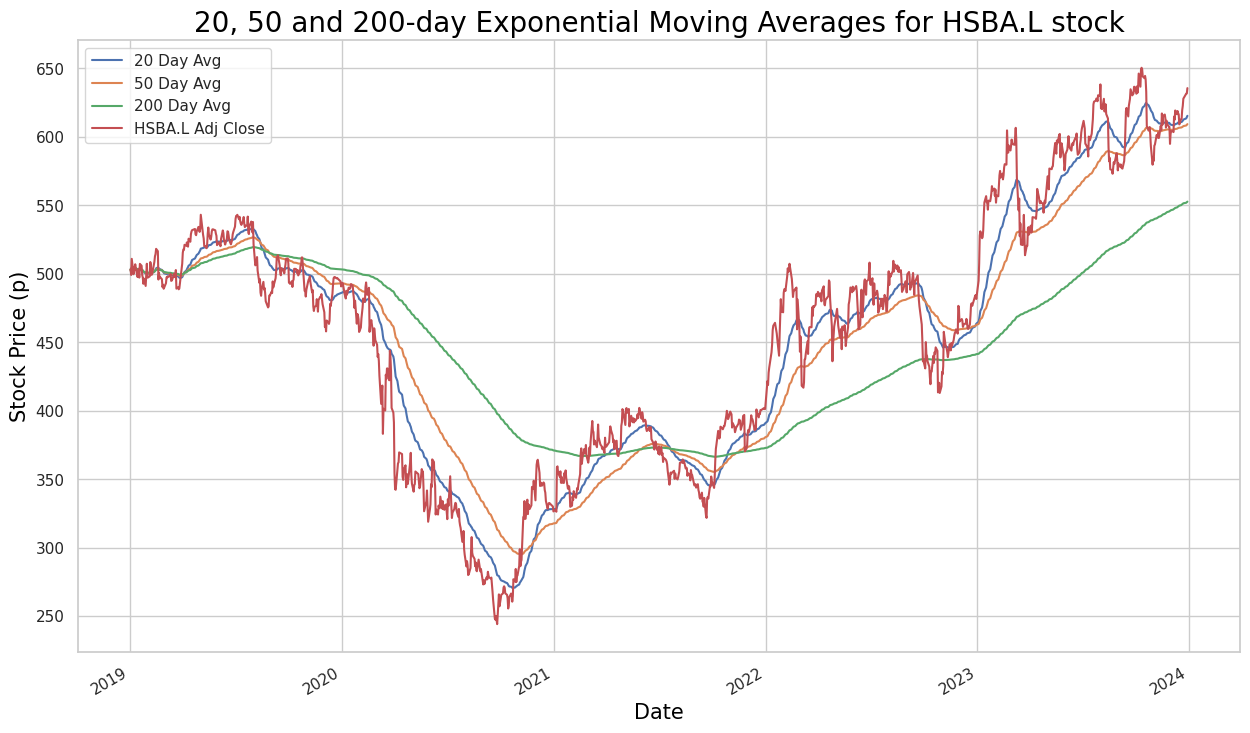

In [44]:
ticker = 'HSBA.L'
title_txt = "20, 50 and 200-day Exponential Moving Averages for HSBA.L stock"
label_txt = "HSBA.L Adj Close"

ewma2()

In [45]:
# Triple Moving Average Crossover Strategy
# This strategy uses three moving moving averages - short/fast, middle/medium and long/slow - and has two buy and sell signals.

# The first is to buy when the middle/medium moving average crosses above the long/slow moving average and the short/fast moving average crosses above the middle/medium 
# moving average. If we use this buy signal the strategy is to sell if the short/fast moving average crosses below the middle/medium moving average.

# The second is to buy when the middle/medium moving average crosses below the long/slow moving average and the short/fast moving average crosses below 
# the middle/medium moving average. If we use this buy signal the strategy is to sell if the short/fast moving average crosses above the middle/medium moving average.

In [46]:
hsba[['Adj Close']]['2023-05-01':'2023-10-31']

Price        Adj Close
Date                  
2023-05-02  571.127380
2023-05-03  570.454163
2023-05-04  561.606934
2023-05-05  576.801025
2023-05-09  576.320190
...                ...
2023-10-25  607.044922
2023-10-26  601.123535
2023-10-27  593.129578
2023-10-30  579.609009
2023-10-31  584.543518

[128 rows x 1 columns]

In [47]:
def adj_6mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  ftse100_stocks[ticker]['Adj Close'].loc['2023-05-01':'2023-10-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

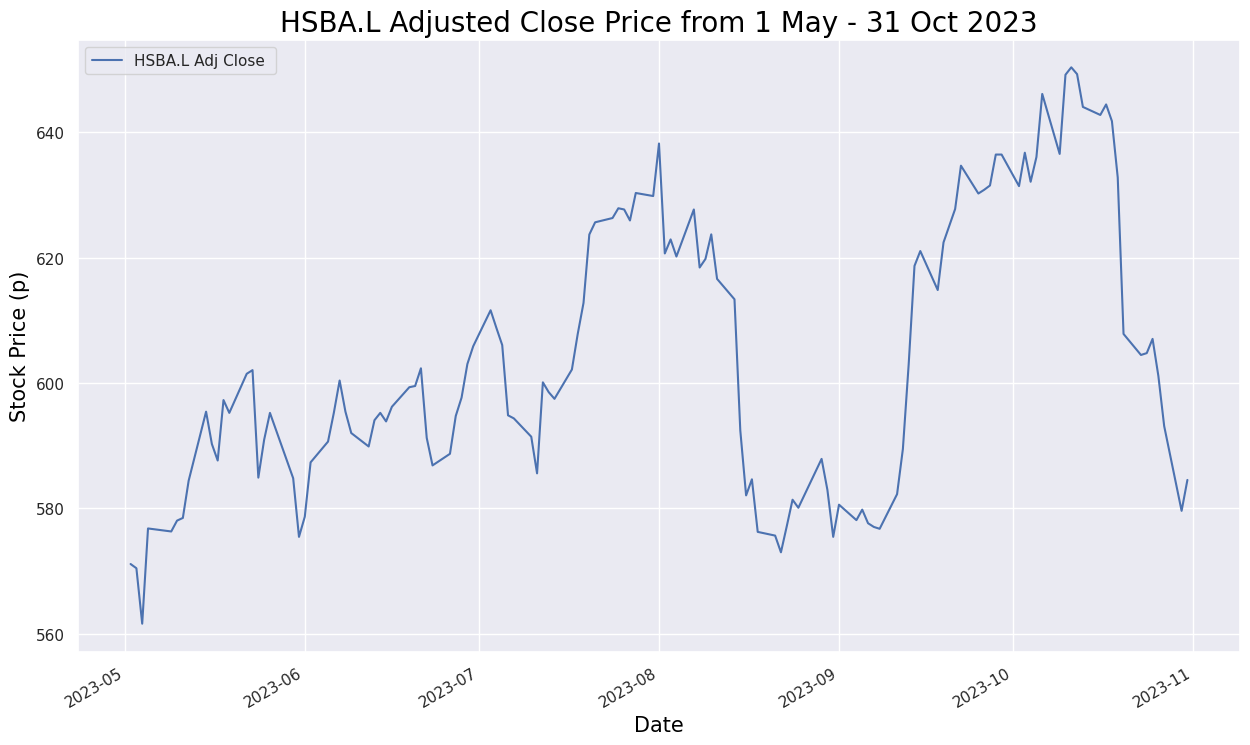

In [48]:
ticker = 'HSBA.L'
title_txt = "HSBA.L Adjusted Close Price from 1 May - 31 Oct 2023"
label_txt = "HSBA.L Adj Close "

adj_6mo()

In [49]:
hsba_adj_6mo = hsba[['Adj Close']]['2023-05-01':'2023-10-31']

In [50]:
ShortEMA = hsba_adj_6mo['Adj Close'].ewm(span=5, adjust=False).mean()
MiddleEMA = hsba_adj_6mo['Adj Close'].ewm(span=21, adjust=False).mean()
LongEMA = hsba_adj_6mo['Adj Close'].ewm(span=63, adjust=False).mean()

In [51]:
def ewma3():
  sns.set(rc={'figure.figsize':(15, 9)})
  plt.plot(ftse100_stocks[ticker]['Adj Close'].loc['2023-05-01':'2023-10-31'], label=f"{label_txt}", color = 'blue')
  plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red')
  plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange')
  plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green')
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

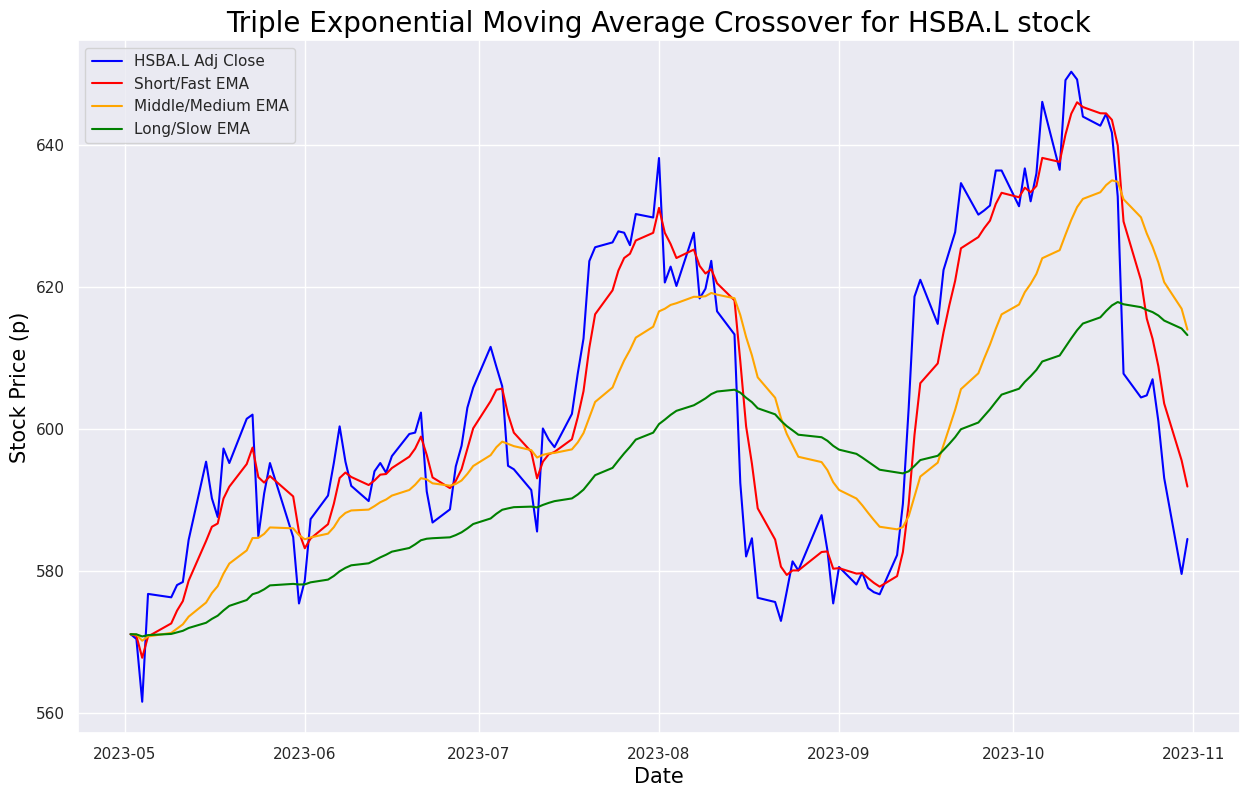

In [52]:
ticker = 'HSBA.L'
title_txt = "Triple Exponential Moving Average Crossover for HSBA.L stock"
label_txt = "HSBA.L Adj Close"

ewma3()

In [53]:
hsba_adj_6mo['Short'] = ShortEMA
hsba_adj_6mo['Middle'] = MiddleEMA
hsba_adj_6mo['Long'] = LongEMA

In [54]:
hsba_adj_6mo

Price        Adj Close       Short      Middle        Long
Date                                                      
2023-05-02  571.127380  571.127380  571.127380  571.127380
2023-05-03  570.454163  570.902974  571.066179  571.106342
2023-05-04  561.606934  567.804294  570.206247  570.809486
2023-05-05  576.801025  570.803205  570.805773  570.996721
2023-05-09  576.320190  572.642200  571.307083  571.163080
...                ...         ...         ...         ...
2023-10-25  607.044922  612.747329  625.718548  616.507446
2023-10-26  601.123535  608.872731  623.482638  616.026699
2023-10-27  593.129578  603.625013  620.723269  615.311164
2023-10-30  579.609009  595.619678  616.985609  614.195472
2023-10-31  584.543518  591.927625  614.036328  613.268848

[128 rows x 4 columns]

In [55]:
def buy_sell_ewma3(data):
  
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  
  return (buy_list, sell_list)

In [56]:
hsba_adj_6mo['Buy'] = buy_sell_ewma3(hsba_adj_6mo)[0]
hsba_adj_6mo['Sell'] = buy_sell_ewma3(hsba_adj_6mo)[1]

In [57]:
def buy_sell_ewma3_plot():
  sns.set(rc={'figure.figsize':(18, 10)})
  plt.plot(ftse100_stocks[ticker]['Adj Close'].loc['2023-05-01':'2023-10-31'], label=f"{label_txt}", color = 'blue', alpha = 0.35)
  plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red', alpha = 0.35)
  plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange', alpha = 0.35)
  plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green', alpha = 0.35)
  plt.scatter(hsba_adj_6mo.index, hsba_adj_6mo['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
  plt.scatter(hsba_adj_6mo.index, hsba_adj_6mo['Sell'], color = 'red', label = 'Buy Signal', marker='v', alpha = 1)
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

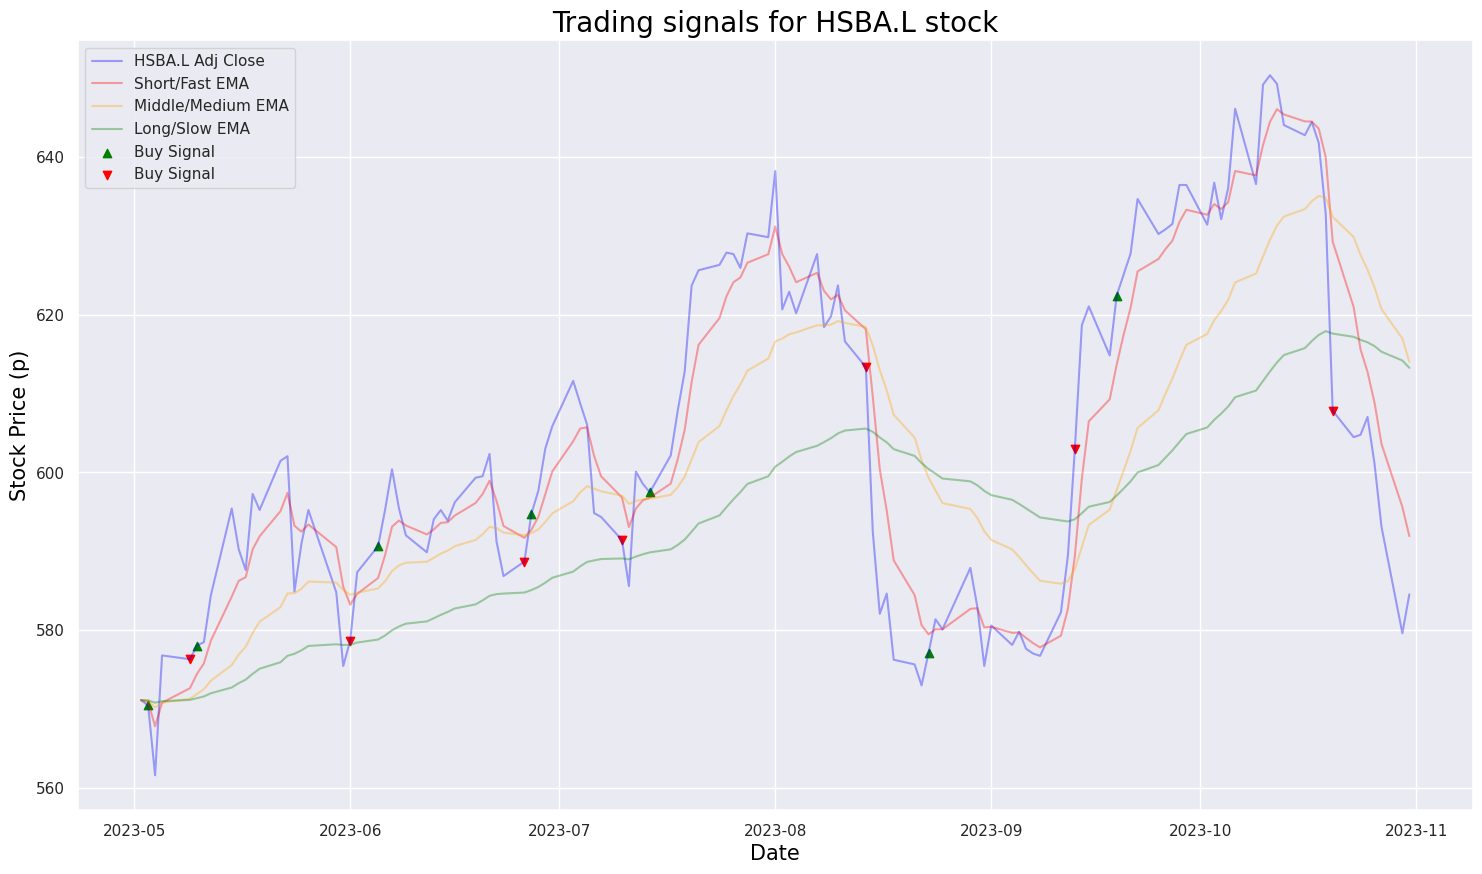

In [58]:
ticker = 'HSBA.L'
title_txt = "Trading signals for HSBA.L stock"
label_txt = "HSBA.L Adj Close"

buy_sell_ewma3_plot()

In [59]:
# Exponential Smoothing
# Single Exponential Smoothing, also known as Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality. 
# It requires an alpha parameter, also called the smoothing factor or smoothing coefficient, to control the rate at which the influence of the observations 
# at prior time steps decay exponentially.

In [60]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label=f"Alpha {alpha}")
    plt.plot(series.values, "c", label = f"{label_txt}")
    plt.xlabel('Days', color = 'black', fontsize = 15)
    plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title(f"{title_txt}", color = 'black', fontsize = 20)
    plt.grid(True);

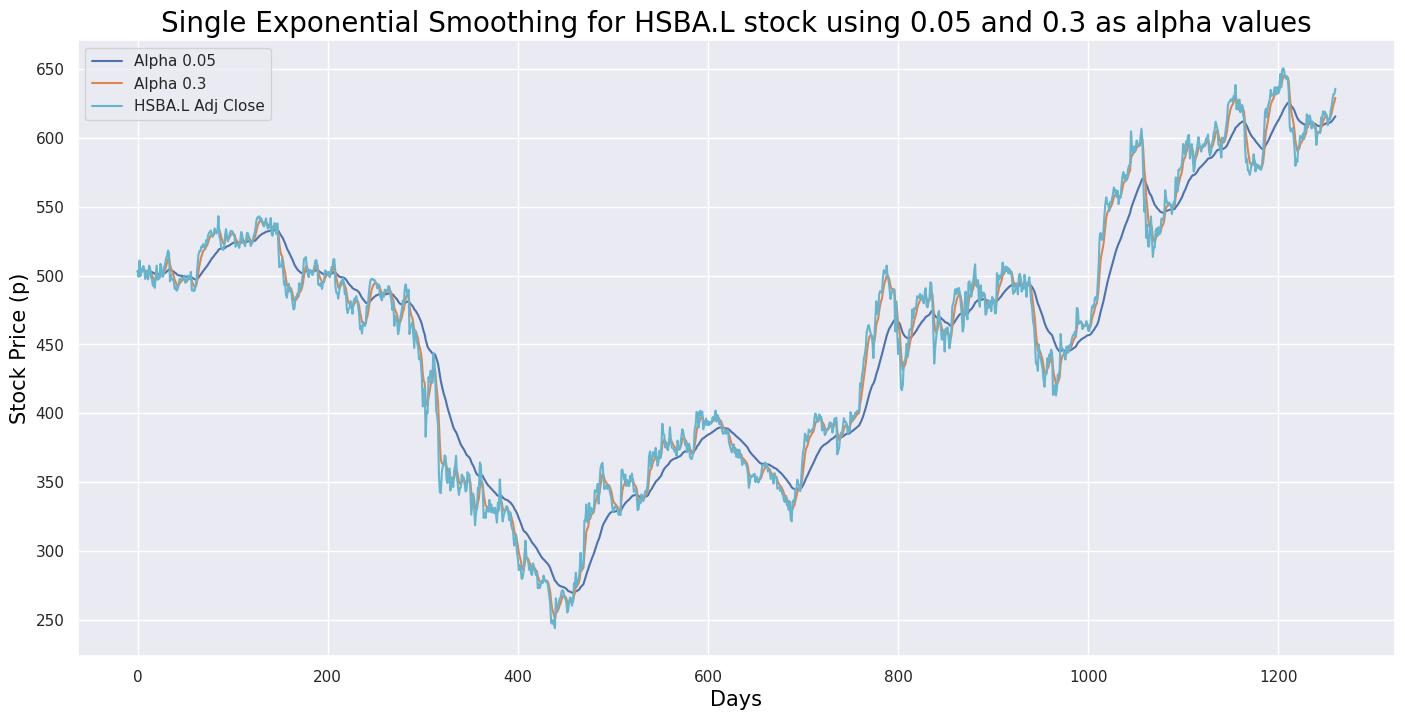

In [61]:
ticker = 'HSBA.L'
title_txt = "Single Exponential Smoothing for HSBA.L stock using 0.05 and 0.3 as alpha values"
label_txt = "HSBA.L Adj Close"

plot_exponential_smoothing(ftse100_stocks[ticker]['Adj Close'].loc['2019-01-01':'2023-12-31'], [0.05, 0.3])

In [62]:
# The smaller the smoothing factor (coefficient), the smoother the time series will be. As the smoothing factor approaches 0, we approach the moving average model
# so the smoothing factor of 0.05 produces a smoother time series than 0.3. This indicates slow learning (past observations have a large influence on forecasts). 
# A value close to 1 indicates fast learning (that is, only the most recent values influence the forecasts).

In [63]:
# Double Exponential Smoothing (Holt’s Linear Trend Model) is an extension being a recursive use of Exponential Smoothing twice where beta is the trend smoothing
# factor, and takes values between 0 and 1. It explicitly adds support for trends.

In [64]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label=f"Alpha {alpha}, beta {beta}")
    plt.plot(series.values, label = f"{label_txt}")
    plt.xlabel('Days', color = 'black', fontsize = 15)
    plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title(f"{title_txt}", color = 'black', fontsize = 20)
    plt.grid(True)

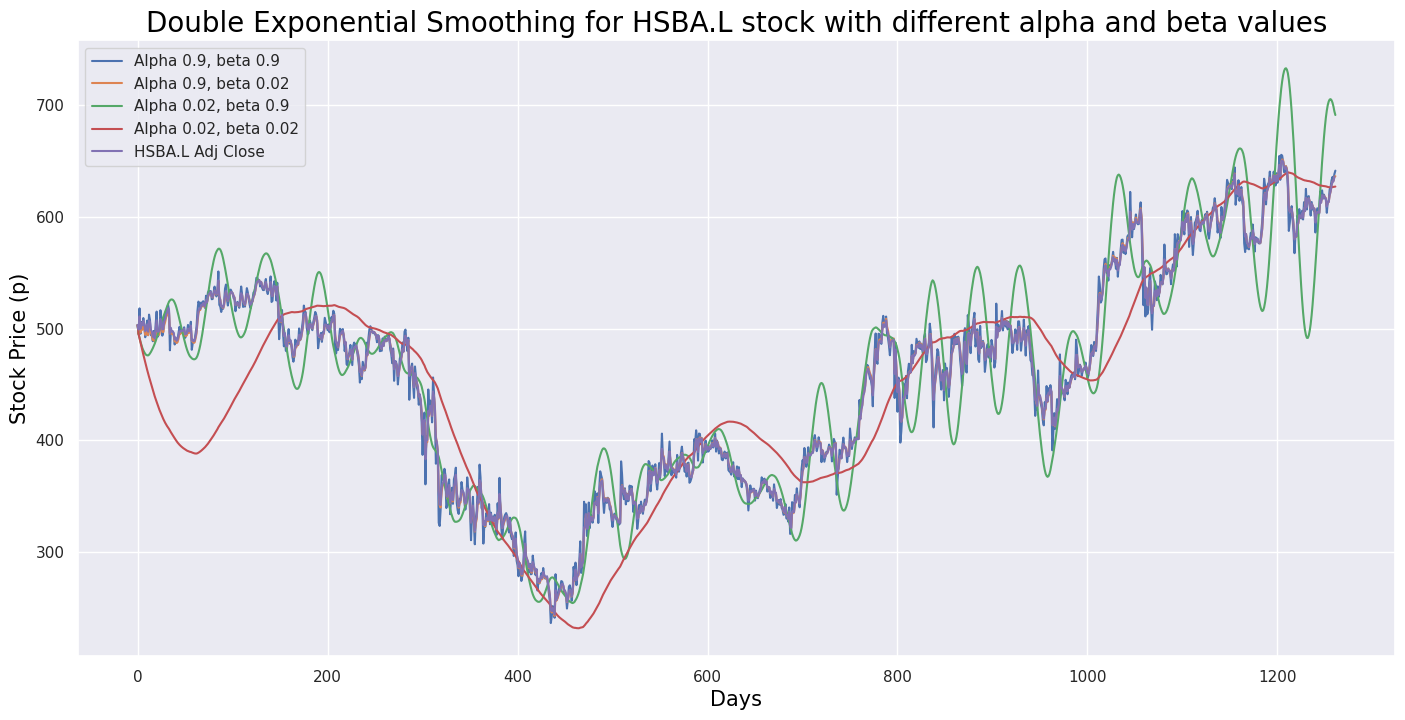

In [65]:
ticker = 'HSBA.L'
title_txt = "Double Exponential Smoothing for HSBA.L stock with different alpha and beta values"
label_txt = "HSBA.L Adj Close"

plot_double_exponential_smoothing(ftse100_stocks[ticker]['Adj Close'].loc['2019-01-01':'2023-12-31'], alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [66]:
# The third main type is Triple Exponential Smoothing (Holt Winters Method) which is an extension of Exponential Smoothing that explicitly adds support
# for seasonality, or periodic fluctuations.

In [67]:
# Moving average convergence divergence (MACD)
# The MACD is a trend-following momentum indicator turning two trend-following indicators, moving averages, into a momentum oscillator by subtracting
# the longer moving average from the shorter one.

# It is useful although lacking one prediction element - because it is unbounded it is not particularly useful for identifying overbought and oversold levels. 
# Traders can look for signal line crossovers, neutral/centreline crossovers (otherwise known as the 50 level) and divergences from the price action to generate 
# signals.

# The default parameters are 26 EMA of prices, 12 EMA of prices and a 9-moving average of the difference between the first two.

In [68]:
def adj_3mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  ftse100_stocks[ticker]['Adj Close'].loc['2023-08-01':'2023-10-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()


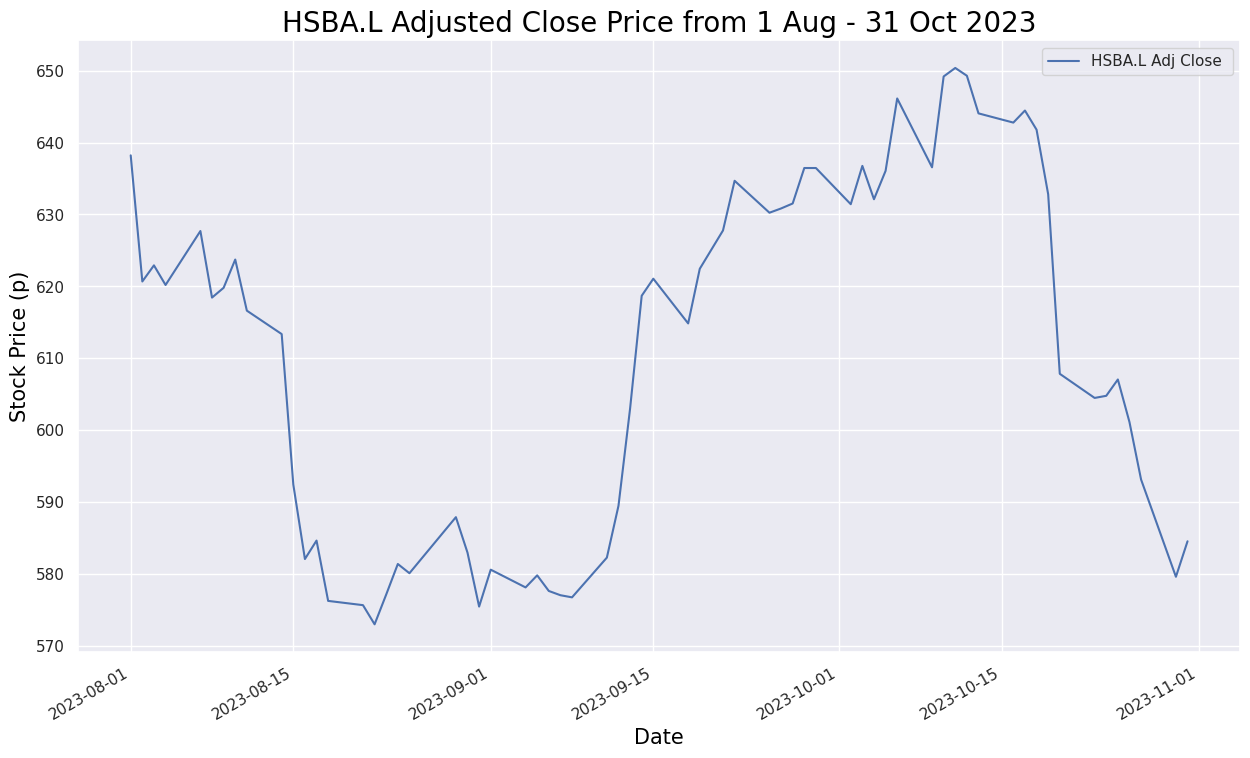

In [69]:
ticker = 'HSBA.L'
title_txt = "HSBA.L Adjusted Close Price from 1 Aug - 31 Oct 2023"
label_txt = "HSBA.L Adj Close "

adj_3mo()

In [70]:
hsba_adj_3mo = hsba[['Adj Close']]['2023-08-01':'2023-10-31']

In [71]:
ShortEMA = hsba_adj_3mo['Adj Close'].ewm(span=12, adjust=False).mean()
LongEMA = hsba_adj_3mo['Adj Close'].ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

In [72]:
def macd():
  plt.figure(figsize=(15, 9))
  plt.plot(hsba_adj_3mo.index, MACD, label = f"{macd_label_txt}", color= 'red')
  plt.plot(hsba_adj_3mo.index, signal, label = f"{sig_label_txt}", color= 'blue')
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xticks (rotation = 45)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.legend(loc='upper left')
  plt.show()

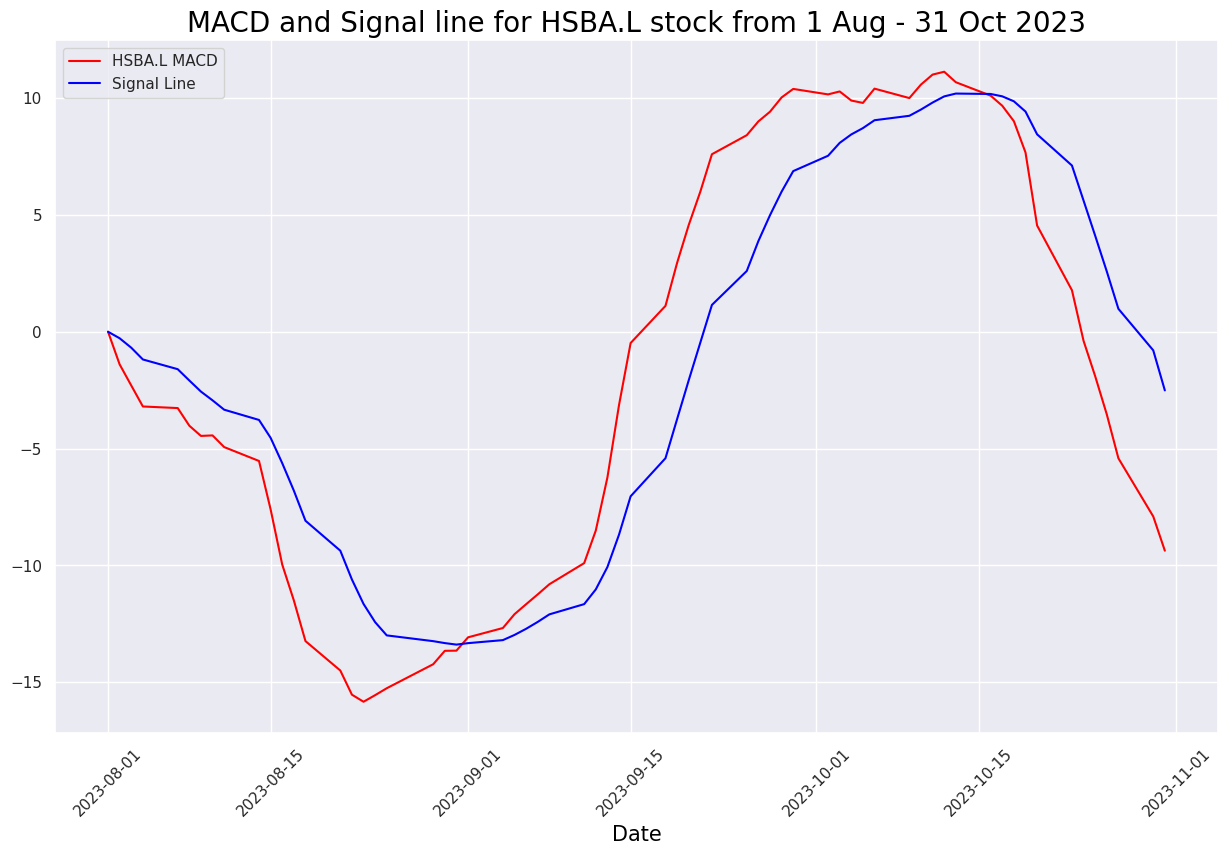

In [73]:
ticker = 'HSBA.L'
title_txt = 'MACD and Signal line for HSBA.L stock from 1 Aug - 31 Oct 2023'
macd_label_txt ="HSBA.L MACD"
sig_label_txt = "Signal Line"

macd()

In [74]:
# When the MACD line crosses above the signal line this indicates a good time to buy.

In [75]:
# Create new columns for the MACD and Signal Line data

hsba_adj_3mo['MACD'] = MACD
hsba_adj_3mo['Signal Line'] = signal
hsba_adj_3mo

Price        Adj Close      MACD  Signal Line
Date                                         
2023-08-01  638.216248  0.000000     0.000000
2023-08-02  620.674805 -1.399317    -0.279863
2023-08-03  622.916260 -2.300896    -0.684070
2023-08-04  620.187561 -3.198715    -1.186999
2023-08-07  627.691406 -3.267084    -1.603016
...                ...       ...          ...
2023-10-25  607.044922 -1.901927     4.109628
2023-10-26  601.123535 -3.537008     2.580301
2023-10-27  593.129578 -5.415441     0.981152
2023-10-30  579.609009 -7.903998    -0.795878
2023-10-31  584.543518 -9.370011    -2.510704

[65 rows x 3 columns]

In [76]:
# Function to signal when to buy and sell

def buy_sell_macd(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Adj Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Adj Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [77]:
# Create buy and sell columns

a = buy_sell_macd(hsba_adj_3mo)
hsba_adj_3mo['Buy_Signal_Price'] = a[0]
hsba_adj_3mo['Sell_Signal_Price'] = a[1]

In [78]:
# Plot buy and sell signals

def buy_sell_macd_plot():
  plt.figure(figsize=(20, 10))
  plt.scatter(hsba_adj_3mo.index, hsba_adj_3mo['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
  plt.scatter(hsba_adj_3mo.index, hsba_adj_3mo['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
  plt.plot(hsba_adj_3mo['Adj Close'], label='Adj Close Price', alpha = 0.35)
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Adj Close Price')
  plt.legend(loc = 'upper left')
  plt.show()

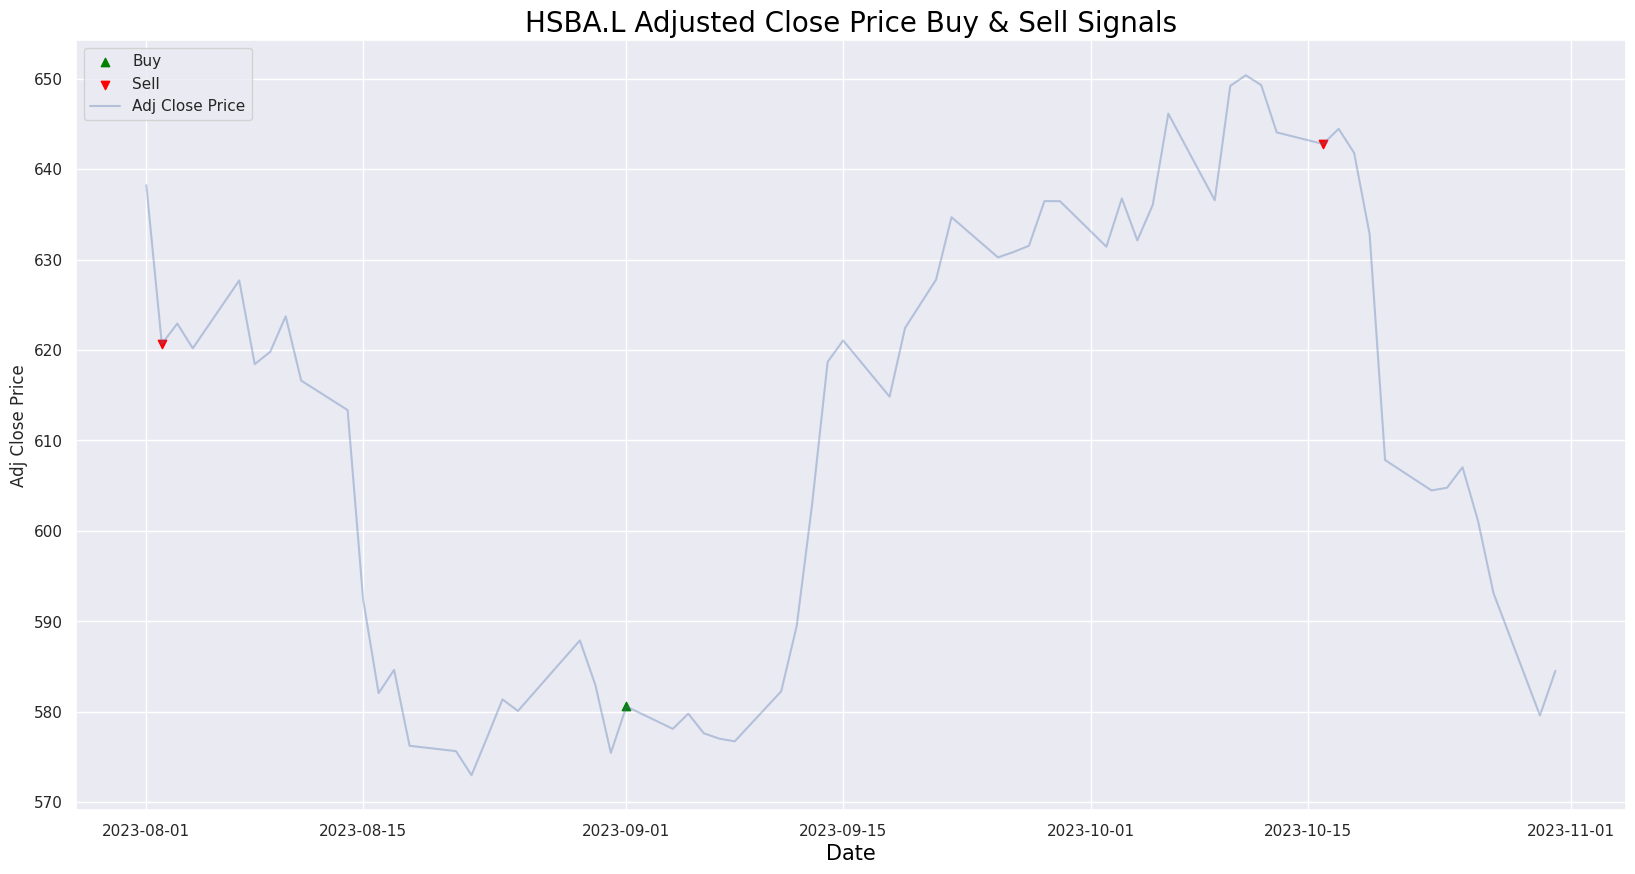

In [79]:
ticker = 'HSBA.L'
title_txt = 'HSBA.L Adjusted Close Price Buy & Sell Signals'

buy_sell_macd_plot()

In [80]:
# Momentum Strategies
# In momentum algorithmic trading strategies stocks have momentum (i.e. upward or downward trends) that we can detect and exploit.

In [81]:
# Relative Strength Index (RSI)
# The RSI is a momentum indicator. A typical momentum strategy will buy stocks that have been showing an upward trend in hopes that the trend will continue, 
# and make predictions based on whether the past recent values were going up or going down.

# The RSI determines the level of overbought (70) and oversold (30) zones using a default lookback period of 14 i.e. it uses the last 14 values
# to calculate its values. The idea is to buy when the RSI touches the 30 barrier and sell when it touches the 70 barrier.

In [82]:
def adj_12mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  ftse100_stocks[ticker]['Adj Close'].loc['2023-01-01':'2023-12-31'].plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

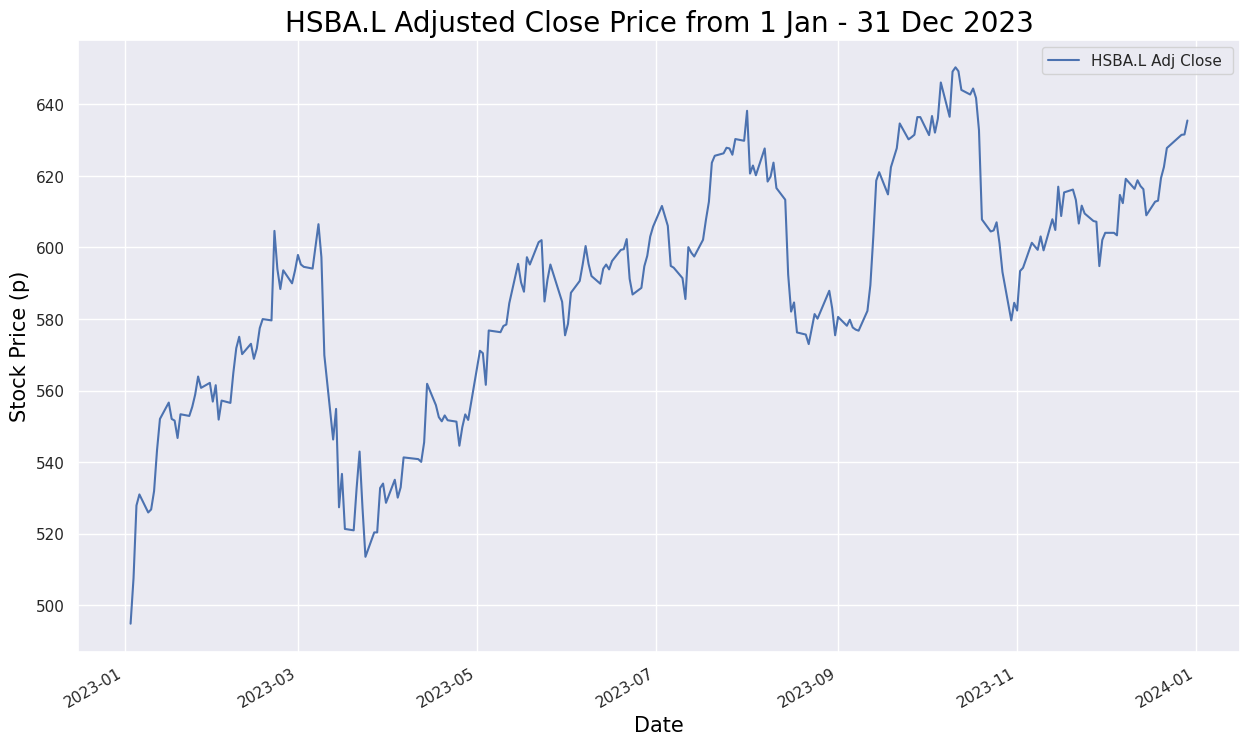

In [83]:
ticker = 'HSBA.L'
title_txt = "HSBA.L Adjusted Close Price from 1 Jan - 31 Dec 2023"
label_txt = "HSBA.L Adj Close "

adj_12mo()

In [84]:
hsba_adj_12mo = hsba[['Adj Close']]['2023-01-01':'2023-12-31']

In [85]:
# Prepare the data to calculate the RSI

# Get difference in price for previous day
delta = hsba_adj_12mo['Adj Close'].diff(1)
delta

Date
2023-01-03          NaN
2023-01-04    12.699829
2023-01-05    20.357056
2023-01-06     3.081604
2023-01-09    -5.042603
                ...    
2023-12-21     3.099976
2023-12-22     5.299988
2023-12-27     3.700012
2023-12-28     0.099976
2023-12-29     3.900024
Name: Adj Close, Length: 251, dtype: float64

In [86]:
# Remove NaNs

delta = delta.dropna()
delta

Date
2023-01-04    12.699829
2023-01-05    20.357056
2023-01-06     3.081604
2023-01-09    -5.042603
2023-01-10     0.840454
                ...    
2023-12-21     3.099976
2023-12-22     5.299988
2023-12-27     3.700012
2023-12-28     0.099976
2023-12-29     3.900024
Name: Adj Close, Length: 250, dtype: float64

In [87]:
# Get positive gains (up) and negative gains (down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

In [88]:
# Get time period

period = 14

# Calculate average gain and average loss
AVG_Gain = up.rolling(window=period).mean()
#AVG_Loss = abs(down.rolling(window=period).mean())
AVG_Loss = down.abs().rolling(window=period).mean()

In [89]:
# Calculate RSI based on SMA

# Calculate Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
# Calculate RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

In [90]:
def rsi():
  sns.set(rc={'figure.figsize':(20, 10)})
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('RSI', color = 'black', fontsize = 15);
  RSI.plot()


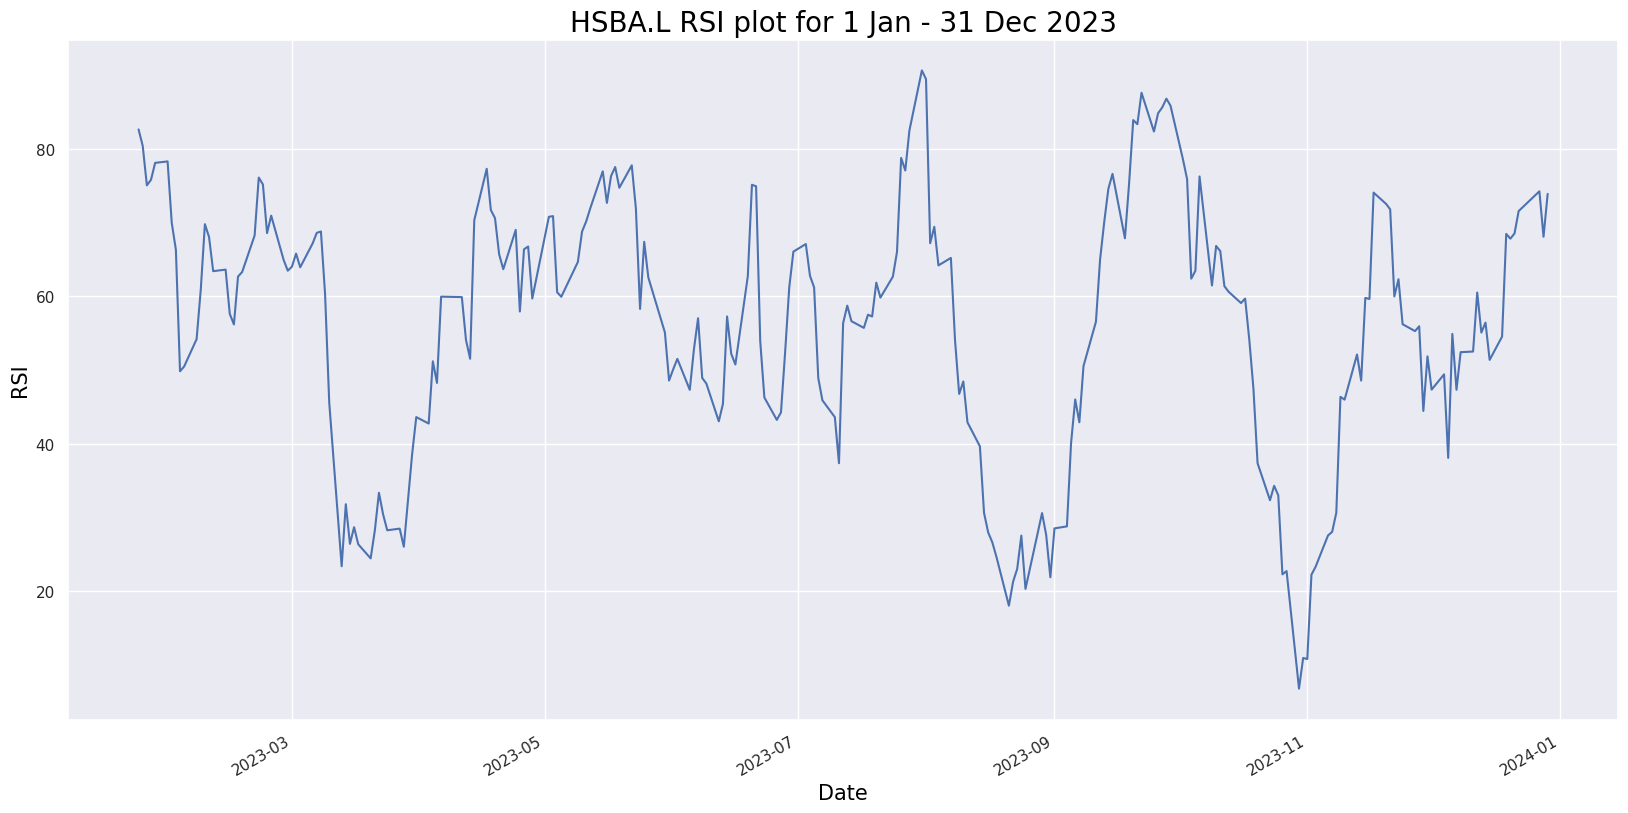

In [91]:
ticker = 'HSBA.L'
title_txt = "HSBA.L RSI plot for 1 Jan - 31 Dec 2023"
label_txt = "HSBA.L RSI level"

rsi()

In [92]:
# Create dataframe with Adjusted Close and RSI

new_df = pd.DataFrame()
new_df['Adj Close'] = hsba_adj_12mo['Adj Close']
new_df['RSI'] = RSI
new_df

Adj Close        RSI
Date                             
2023-01-03  494.827026        NaN
2023-01-04  507.526855        NaN
2023-01-05  527.883911        NaN
2023-01-06  530.965515        NaN
2023-01-09  525.922913        NaN
...                ...        ...
2023-12-21  622.500000  68.548466
2023-12-22  627.799988  71.584773
2023-12-27  631.500000  74.265996
2023-12-28  631.599976  68.094222
2023-12-29  635.500000  73.913054

[251 rows x 2 columns]

In [93]:
def adj_close_12mo():
  sns.set(rc={'figure.figsize':(20, 10)})
  plt.plot(new_df.index, new_df['Adj Close'])
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend(new_df.columns.values, loc = 'upper left')
  plt.show()

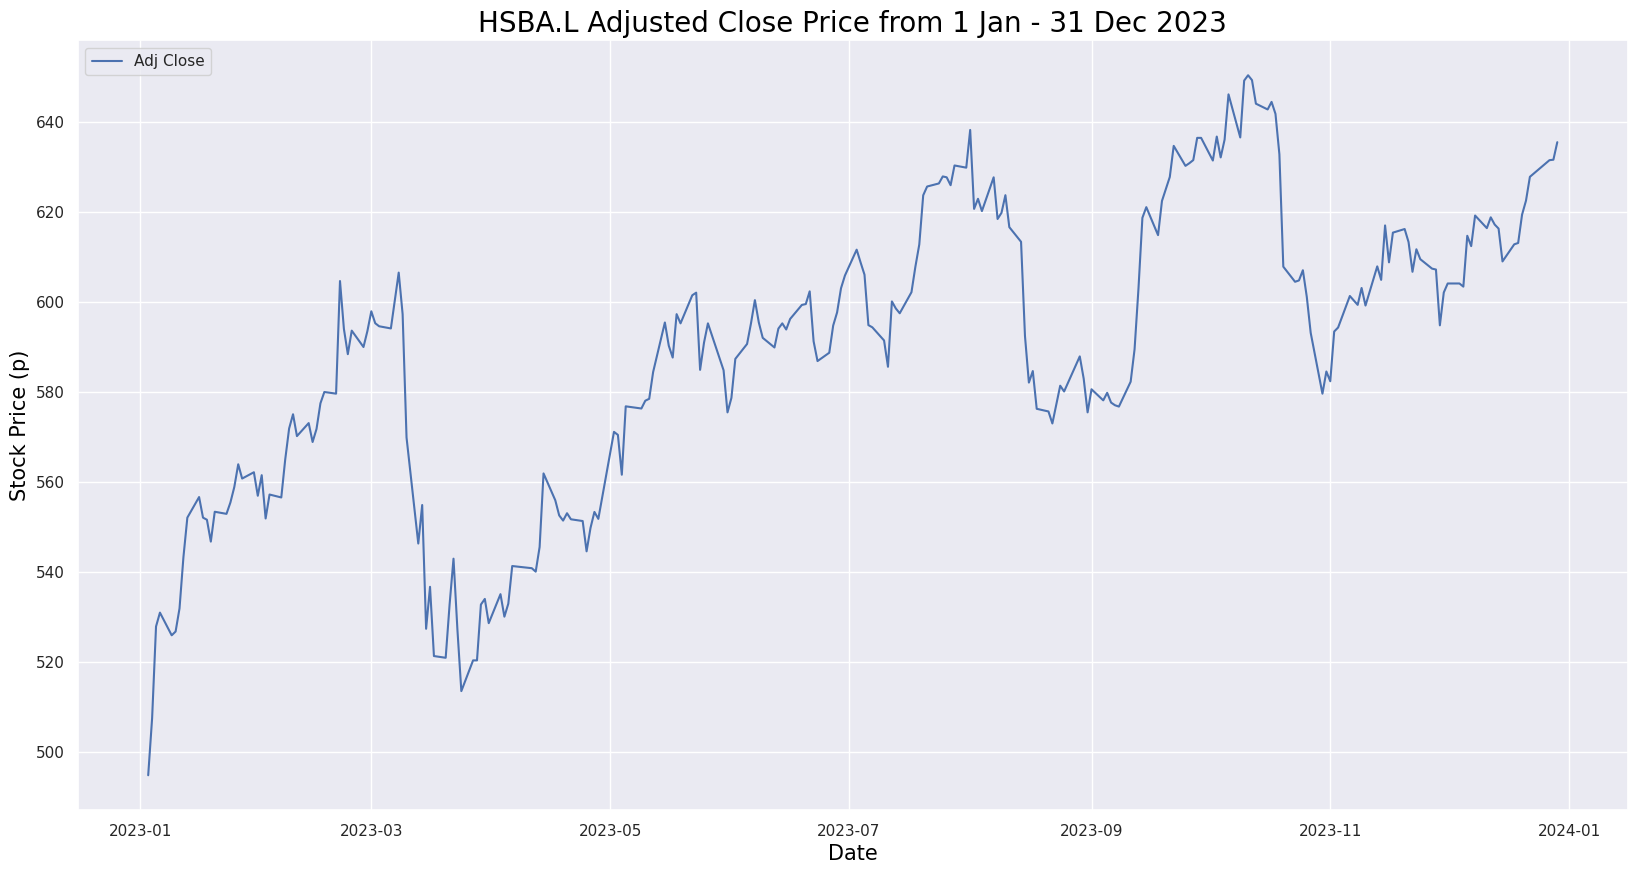

In [94]:
title_txt = "HSBA.L Adjusted Close Price from 1 Jan - 31 Dec 2023"

adj_close_12mo()

In [95]:
# Plot corresponding RSI values and the significant levels

def rsi_sma():
  plt.figure(figsize=(20, 10))
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.plot(new_df.index, new_df['RSI'])
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
  plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')
  plt.show()

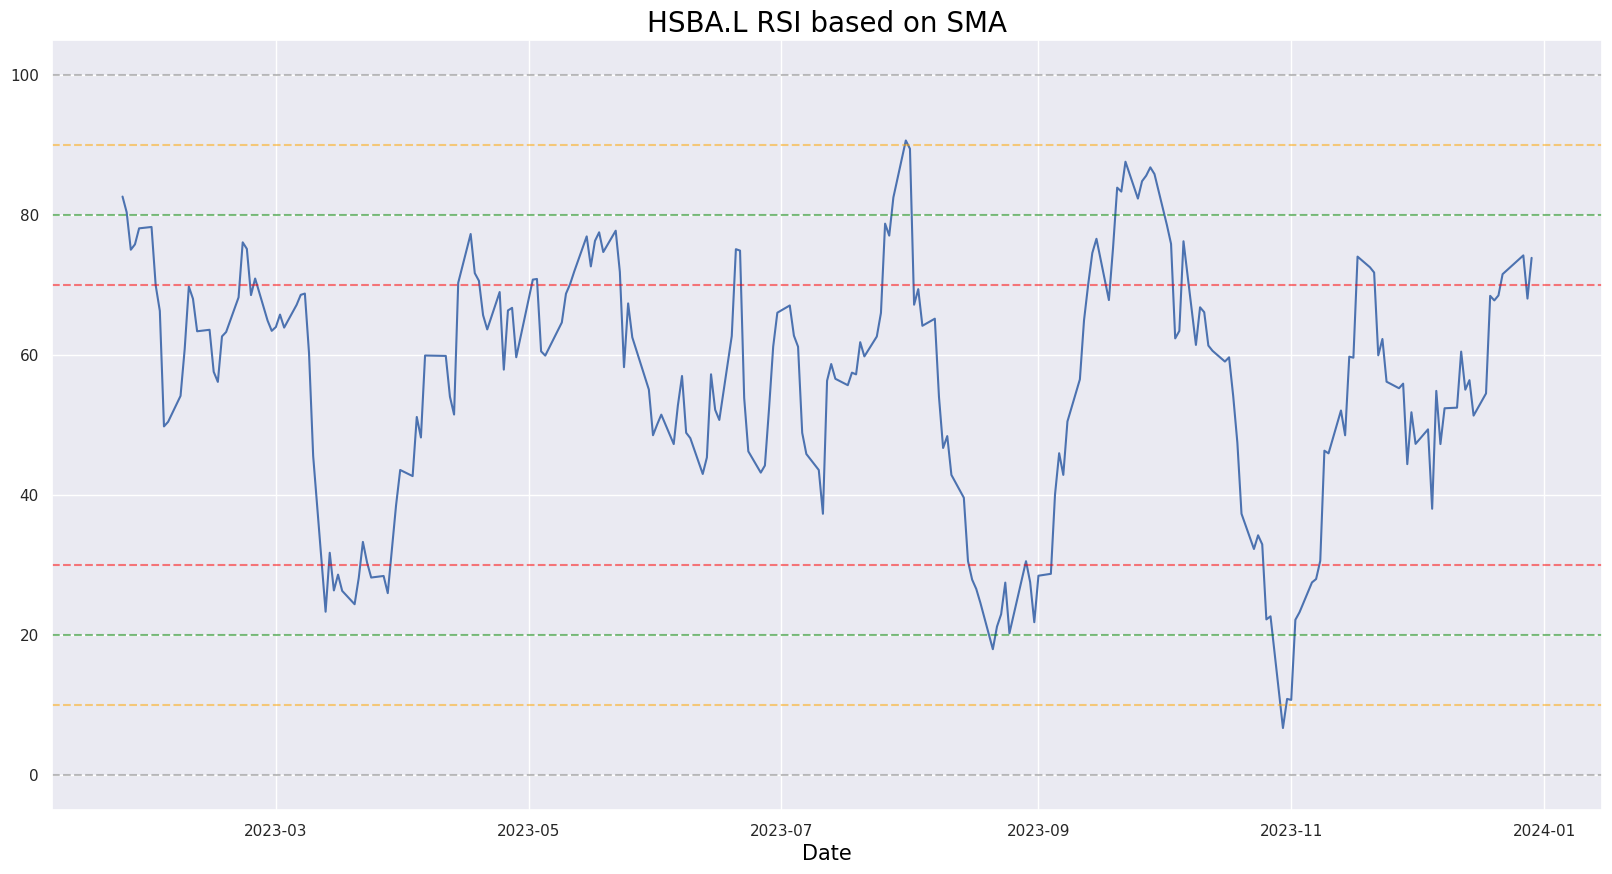

In [96]:
title_txt = 'HSBA.L RSI based on SMA'

rsi_sma()

In [97]:
period = 14

# Calculate the EWMA average gain and average loss
AVG_Gain2 = up.ewm(span=period).mean()
AVG_Loss2 = down.abs().ewm(span=period).mean()

# Calculate the RSI based on EWMA
RS2 = AVG_Gain2 / AVG_Loss2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

In [98]:
new_df2 = pd.DataFrame()
new_df2['Adj Close'] = hsba_adj_12mo['Adj Close']
new_df2['RSI2'] = RSI2
new_df2

Adj Close        RSI2
Date                              
2023-01-03  494.827026         NaN
2023-01-04  507.526855  100.000000
2023-01-05  527.883911  100.000000
2023-01-06  530.965515  100.000000
2023-01-09  525.922913   83.874433
...                ...         ...
2023-12-21  622.500000   66.519408
2023-12-22  627.799988   72.499019
2023-12-27  631.500000   75.957850
2023-12-28  631.599976   76.051756
2023-12-29  635.500000   79.632542

[251 rows x 2 columns]

In [99]:
# Plot corresponding RSI values and the significant levels

def rsi_ewma():
  plt.figure(figsize=(20, 10))
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.plot(new_df2.index, new_df2['RSI2'])
  plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
  plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')
  plt.show()

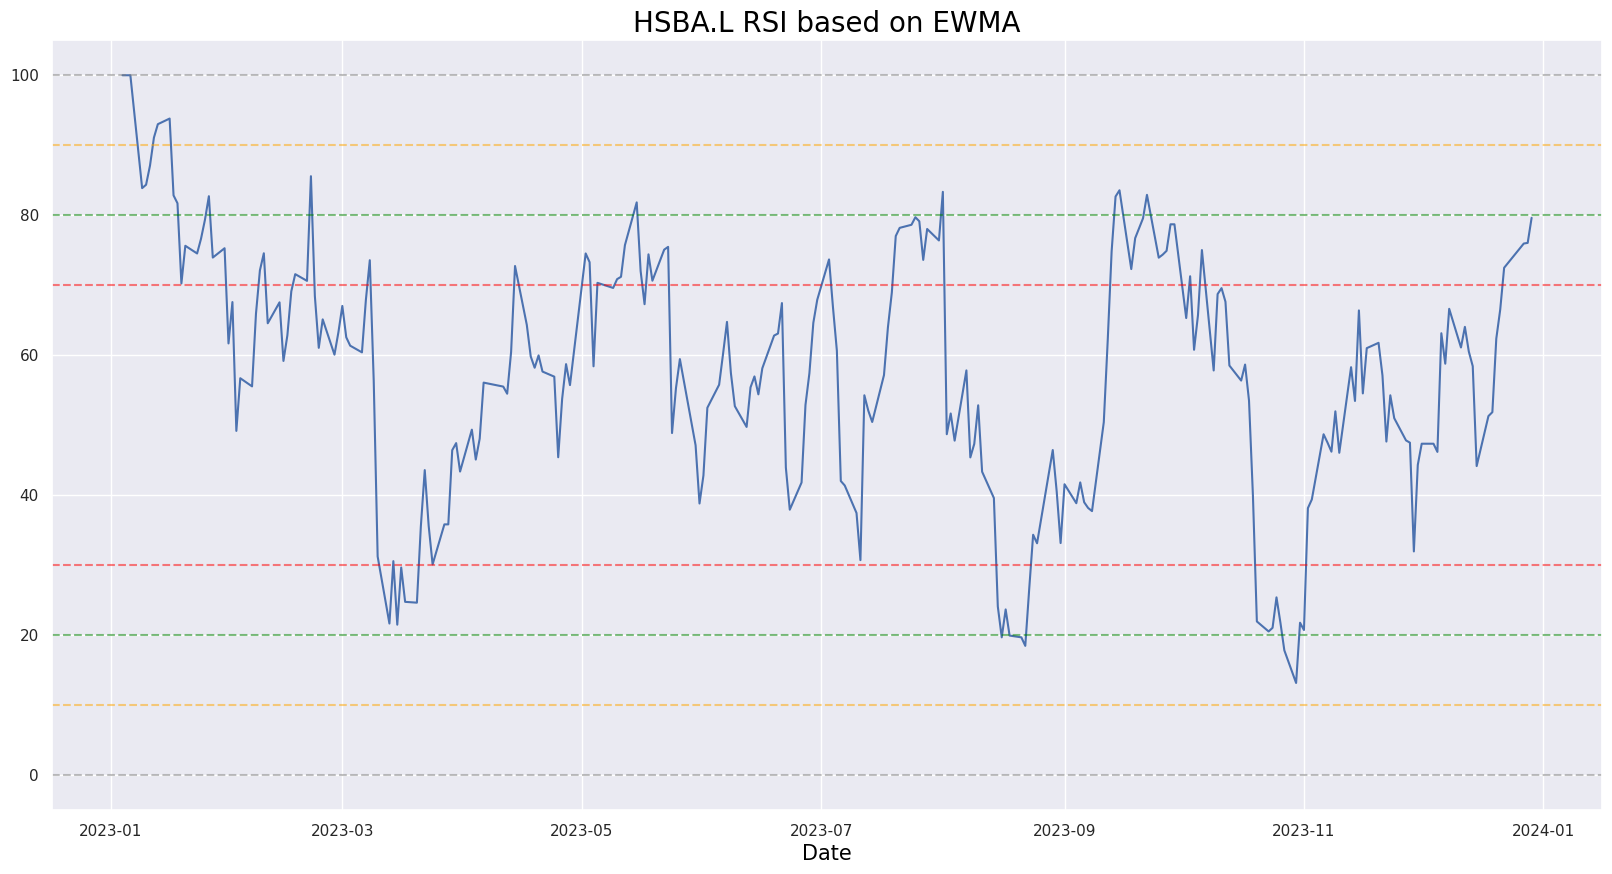

In [100]:
title_txt = 'HSBA.L RSI based on EWMA'

rsi_ewma()

In [101]:
# It appears that RSI value dips below the 20 significant level in November 2023 indicating that the stock was oversold and presented a buying opportunity
# for an investor before a price rise

In [102]:
# Money Flow Index (MFI)
# Money Flow Index (MFI) is a technical oscillator, and momentum indicator, that uses price and volume data for identifying overbought or oversold signals
# in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100
# and a reading of above 80 implies overbought conditions, and below 20 implies oversold conditions.

# It is related to the Relative Strength Index (RSI) but incorporates volume, whereas the RSI only considers price.

In [103]:
hsba_12mo = hsba.copy()  

In [104]:
hsba_12mo = hsba_12mo['2023-01-01':'2023-12-31']
hsba_12mo

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  518.099976  531.700012  515.700012  529.900024  494.827026   
2023-01-04  535.099976  544.799988  532.500000  543.500000  507.526855   
2023-01-05  548.000000  568.400024  545.398987  565.299988  527.883911   
2023-01-06  566.000000  569.849976  559.599976  568.599976  530.965515   
2023-01-09  564.500000  566.799988  561.599976  563.200012  525.922913   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2023-01-03  33285725  
2023-01-04  21604090  
2023-01-05  36654670  
2023-01-06  31225164  
2023-01-09  23530081  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[251 rows x 6 columns]

In [105]:
def hsba_12mo_close():
  plt.figure(figsize=(20, 10))
  plt.plot(hsba_12mo['Close'])
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Close Price', color = 'black', fontsize = 15)
  plt.legend(hsba_12mo.columns.values, loc='upper left')
  plt.show()

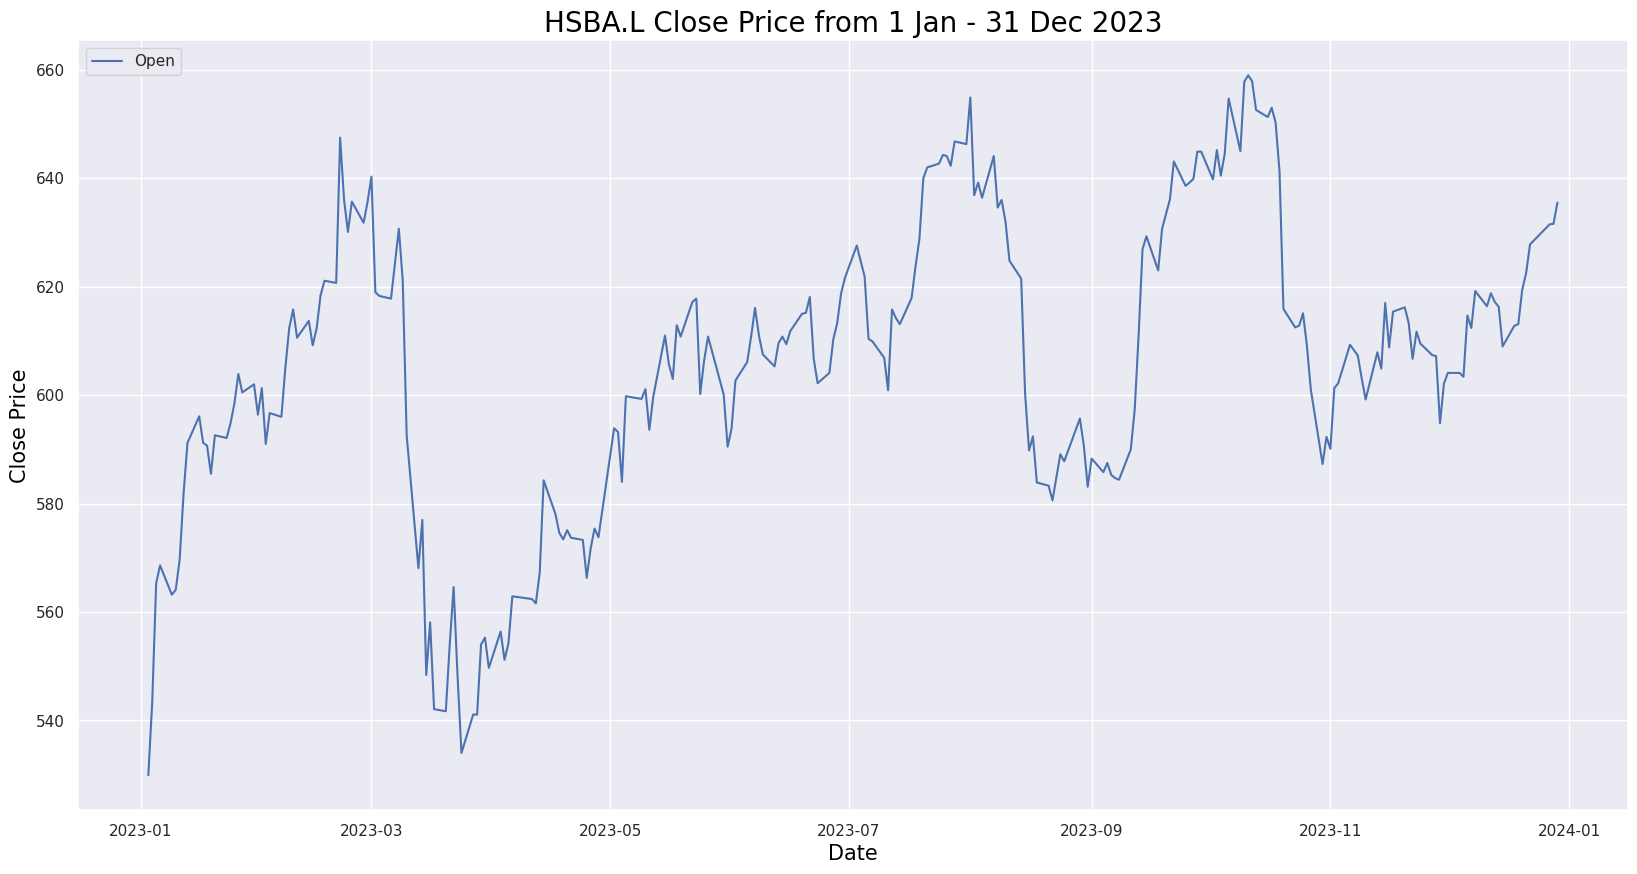

In [106]:
title_txt = "HSBA.L Close Price from 1 Jan - 31 Dec 2023"
label_txt = "HSBA.L Close price "

hsba_12mo_close()

In [107]:
# Calculate typical price

typical_price = (hsba_12mo['Close'] + hsba_12mo['High'] + hsba_12mo['Low']) / 3
typical_price

Date
2023-01-03    525.766683
2023-01-04    540.266663
2023-01-05    559.699666
2023-01-06    566.016642
2023-01-09    563.866659
                 ...    
2023-12-21    620.892334
2023-12-22    626.300008
2023-12-27    630.732992
2023-12-28    631.533325
2023-12-29    634.366659
Length: 251, dtype: float64

In [108]:
period = 14

In [109]:
# Calculate the money flow
money_flow = typical_price * hsba_12mo['Volume']
money_flow

Date
2023-01-03    1.750053e+10
2023-01-04    1.167197e+10
2023-01-05    2.051561e+10
2023-01-06    1.767396e+10
2023-01-09    1.326783e+10
                  ...     
2023-12-21    1.305997e+10
2023-12-22    6.785015e+09
2023-12-27    1.018755e+10
2023-12-28    6.285087e+09
2023-12-29    3.707302e+09
Length: 251, dtype: float64

In [110]:
# Get all positive and negative money flows
positive_flow = []
negative_flow = []

# Loop through typical price
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)

In [111]:
# Get all positive and negative money flows within same time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i + 1 - period : i+1]))
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i + 1 - period : i+1]))

In [112]:
# Calculate money flow index

mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))
mfi

array([65.3496203 , 64.13033258, 63.68369276, 63.1916945 , 60.97672106,
       60.61221812, 52.6820193 , 50.82300212, 45.00806587, 39.92514065,
       45.88273061, 53.03965818, 61.37978704, 62.47583264, 53.04131539,
       56.21581221, 52.71915687, 52.25499503, 60.67487754, 66.08521866,
       78.12392345, 78.07357153, 86.3855682 , 75.2076806 , 74.77006493,
       70.27789009, 72.24360399, 72.17179906, 68.31004937, 63.48995055,
       63.27099648, 63.85500296, 66.18529209, 57.73990755, 51.14795222,
       45.3409165 , 33.6087129 , 34.96163626, 36.86101628, 36.26889085,
       26.53236182, 28.66151893, 36.24930868, 34.91232637, 30.85321625,
       30.17521874, 24.90314861, 29.98676807, 34.05906224, 36.37381747,
       43.40378875, 44.13108044, 38.19966571, 42.47171691, 51.24637316,
       47.36255422, 44.73969585, 54.5054316 , 80.40487834, 74.37658612,
       68.08464171, 67.73744491, 61.73169663, 60.86369319, 51.63010816,
       59.9251013 , 66.87750572, 68.1768829 , 69.47299252, 48.29

In [113]:
df2 = pd.DataFrame()
df2['MFI'] = mfi

In [114]:
# Create the plot

def mfi_plot():
  plt.figure(figsize=(20, 10))
  plt.plot(df2['MFI'], label = 'MFI')
  plt.axhline(10, linestyle = '--', color = 'orange')
  plt.axhline(20, linestyle = '--', color = 'blue')
  plt.axhline(80, linestyle = '--', color = 'blue')
  plt.axhline(90, linestyle = '--', color = 'orange')
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Time periods', color = 'black', fontsize = 15)
  plt.ylabel('MFI Values', color = 'black', fontsize = 15)
  plt.show()

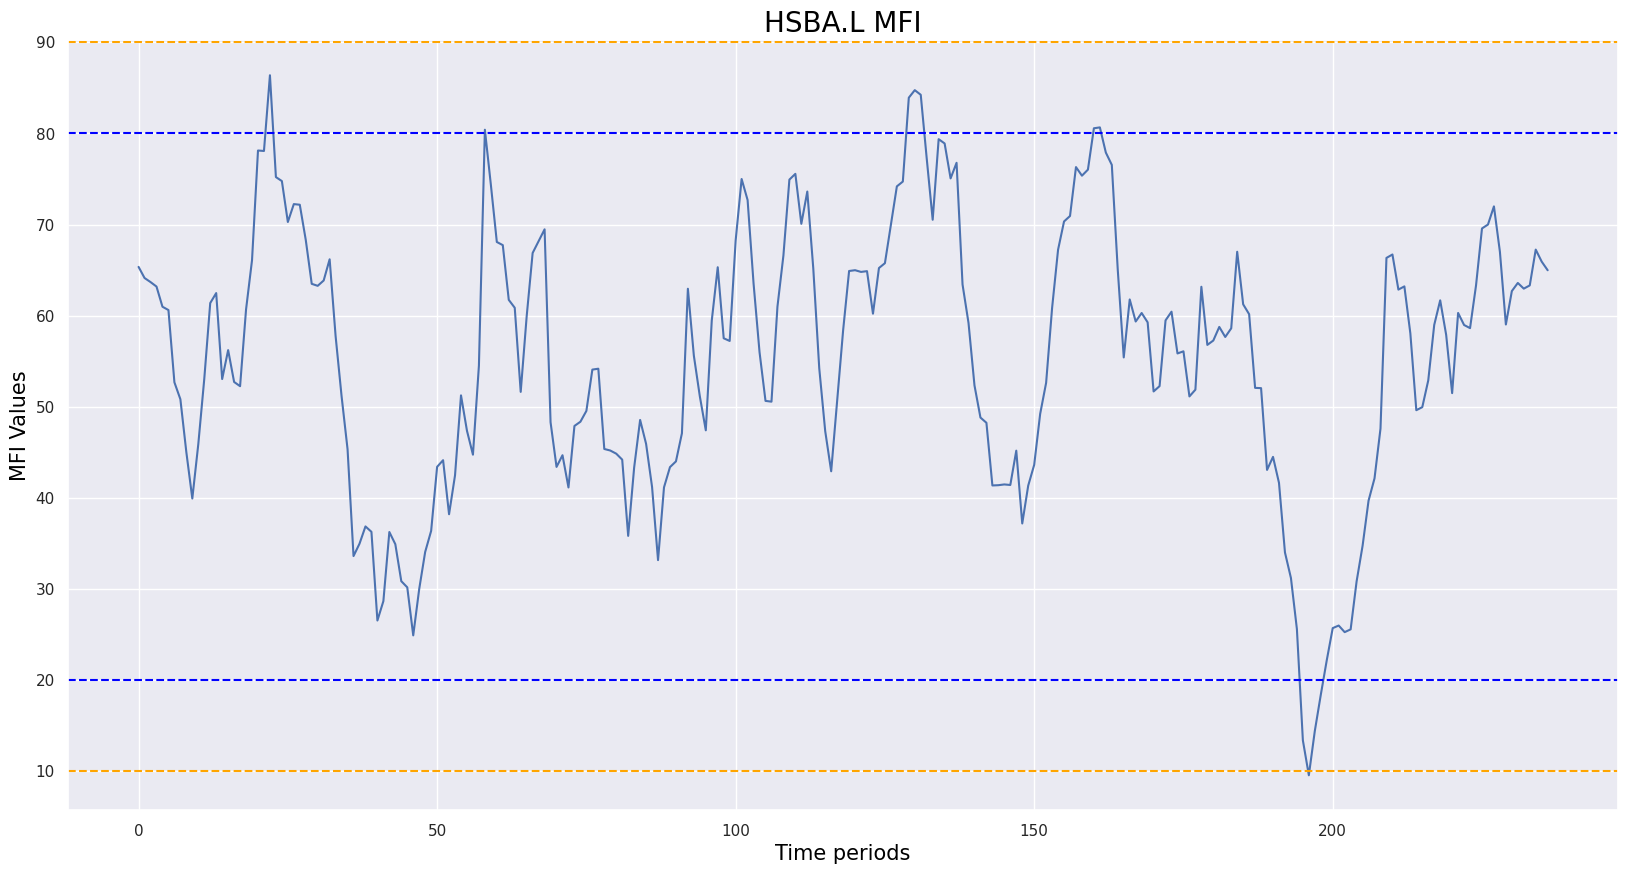

In [115]:
title_txt = "HSBA.L MFI"

mfi_plot()

In [116]:
new_mfi_df = pd.DataFrame()
new_mfi_df = hsba_12mo[period:]
new_mfi_df['MFI'] = mfi

In [117]:
new_mfi_df

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-23  593.000000  595.500000  592.099976  592.099976  552.910034   
2023-01-24  594.200012  597.500000  589.364990  594.799988  555.431335   
2023-01-25  596.299988  599.500000  594.200012  598.500000  558.886414   
2023-01-26  598.099976  603.900024  596.500000  603.900024  563.929077   
2023-01-27  601.000000  603.599976  596.500000  600.500000  560.754089   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume        MFI  
Date                             
2023-01-23  13977254  65.349620  
2023-01-24  14234046  64.130333  
2023-01-25  28558123  63.683693  
2023-01-26  44789252  63.191695  
2023-01-27  24753721  60.976721  
...              ...        ...  
2023-12-21  21034187  62.963095  
2023-12-22  10833490  63.317150  
2023-12-27  16151929  67.247887  
2023-12-28   9952106  65.927828  
2023-12-29   5844099  64.981059  

[237 rows x 7 columns]

In [118]:
# Create function to get buy and sell signals

def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  return (buy_signal, sell_signal)


In [119]:
# Add new columns (Buy & Sell)

new_mfi_df['Buy'] = get_signal(new_mfi_df, 80, 20)[0]
new_mfi_df['Sell'] = get_signal(new_mfi_df, 80, 20)[1]

new_mfi_df

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-23  593.000000  595.500000  592.099976  592.099976  552.910034   
2023-01-24  594.200012  597.500000  589.364990  594.799988  555.431335   
2023-01-25  596.299988  599.500000  594.200012  598.500000  558.886414   
2023-01-26  598.099976  603.900024  596.500000  603.900024  563.929077   
2023-01-27  601.000000  603.599976  596.500000  600.500000  560.754089   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume        MFI  Buy  Sell  
Date                                        
2023-01-23  13977254  65.349620  NaN   NaN  
2023-01-24  14234046  64.130333  NaN   NaN  
2023-01-25  28558123  63.683693  NaN   NaN  
2023-01-26  44789252  63.191695  NaN   NaN  
2023-01-27  24753721  60.976721  NaN   NaN  
...              ...        ...  ...   ...  
2023-12-21  21034187  62.963095  NaN   NaN  
2023-12-22  10833490  63.317150  NaN   NaN  
2023-12-27  16151929  67.247887  NaN   NaN  
2023-12-28   9952106  65.927828  NaN   NaN  
2023-12-29   5844099  64.981059  NaN   NaN  

[237 rows x 9 columns]

In [120]:
def mfi_buy_sell_plot():
  plt.figure(figsize=(20, 10))
  plt.plot(new_mfi_df['Close'], label = 'Close Price', alpha = 0.5)
  plt.scatter(new_mfi_df.index, new_mfi_df['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
  plt.scatter(new_mfi_df.index, new_mfi_df['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Close Price', color = 'black', fontsize = 15)
  plt.legend(loc='upper left')
  plt.show()

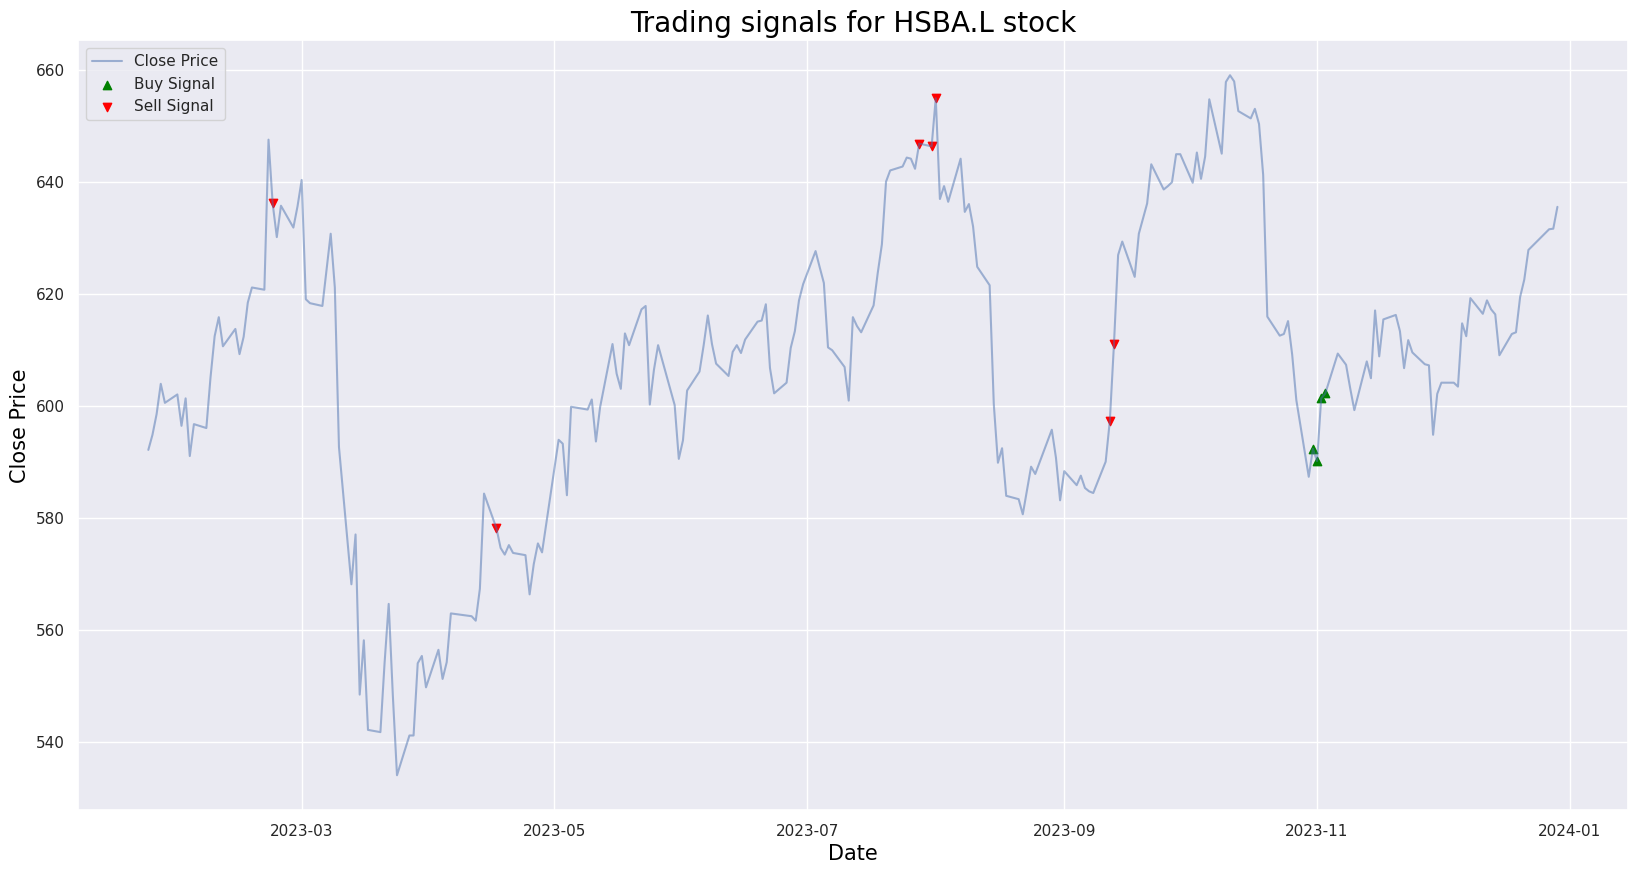

In [121]:
title_txt = "Trading signals for HSBA.L stock"
mfi_buy_sell_plot()

In [122]:
# Stochastic Oscillator
# The stochastic oscillator is a momentum indicator comparing the closing price of a security to the range of its prices over a certain period of time 
# and is one of the best-known momentum indicators along with RSI and MACD.
# The intuition is that in a market trending upward, prices will close near the high, and in a market trending downward, prices close near the low.
# The stochastic oscillator is plotted within a range of zero and 100. The default parameters are an overbought zone of 80, an oversold zone of 20 
# and well-used lookbacks period of 14 and 5 which can be used simultaneously. The oscillator has two lines, the %K and %D, where the former measures momentum 
# and the latter measures the moving average of the former. The %D line is more important of the two indicators and tends to produce better trading signals
# which are created when the %K crosses through the %D.

In [123]:
hsba_so = hsba.copy()
hsba_so

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  658.400024  661.200012  654.599976  659.700012  383.506287   
2014-01-03  653.000000  659.388000  649.796997  656.400024  381.587799   
2014-01-06  658.099976  664.299988  656.388000  660.000000  383.680542   
2014-01-07  659.799988  678.400024  659.599976  675.799988  392.865692   
2014-01-08  673.099976  677.940979  671.911011  674.500000  392.110046   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2014-01-02  15181957  
2014-01-03  15846261  
2014-01-06  26415293  
2014-01-07  31453649  
2014-01-08  24154793  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[2525 rows x 6 columns]

In [124]:
# The stochastic oscillator is calculated using the following formula:

# %K = 100(C – L14)/(H14 – L14)

# Where:

# C = the most recent closing price

# L14 = the low of the 14 previous trading sessions

# H14 = the highest price traded during the same 14-day period

# %K= the current market rate for the currency pair

# %D = 3-period moving average of %K

In [125]:
# In this implementation there are 3 possible states – long, short, flat (i.e. no position).

#Create the "L14" column in the DataFrame
hsba_so['L14'] = hsba_so['Low'].rolling(window=14).min()

#Create the "H14" column in the DataFrame
hsba_so['H14'] = hsba_so['High'].rolling(window=14).max()

#Create the "%K" column in the DataFrame
hsba_so['%K'] = 100*((hsba_so['Close'] - hsba_so['L14']) / (hsba_so['H14'] - hsba_so['L14']) )

#Create the "%D" column in the DataFrame
hsba_so['%D'] = hsba_so['%K'].rolling(window=3).mean()

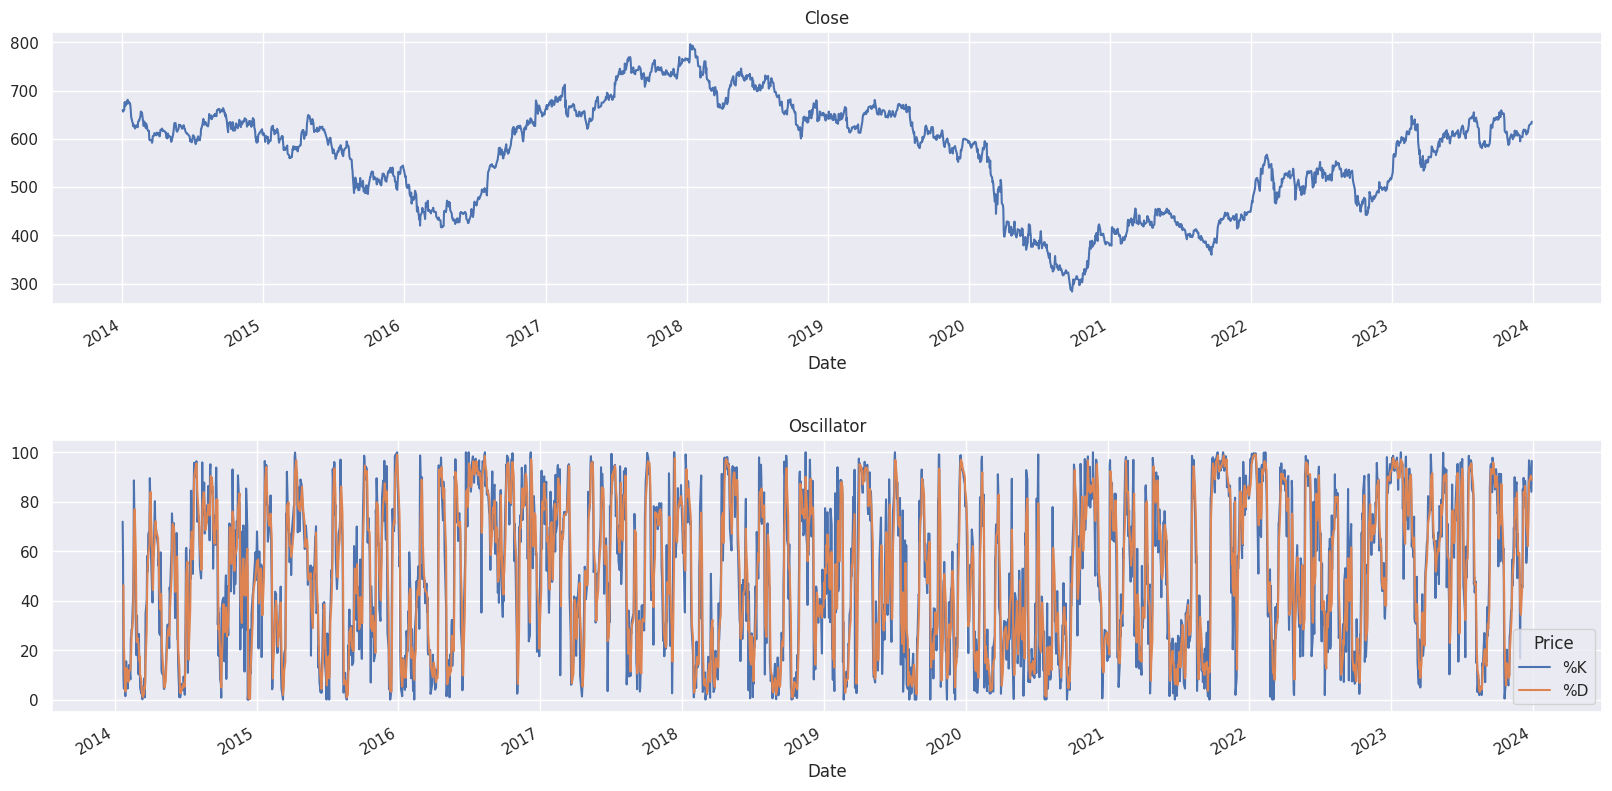

In [126]:
#create a plot (with 2 subplots) showing the HSBA.L price over time, along with a visual representation of the Stochastic Oscillator.

fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

hsba_so['Close'].plot(ax=axes[0]); axes[0].set_title('Close')
hsba_so[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator');

In [127]:
#Create a column in the DataFrame showing "TRUE" if sell entry signal is given and "FALSE" otherwise. 
#A sell is initiated when the %K line crosses down through the %D line and the value of the oscillator is above 80 
hsba_so['Sell Entry'] = ((hsba_so['%K'] < hsba_so['%D']) & (hsba_so['%K'].shift(1) > hsba_so['%D'].shift(1))) & (hsba_so['%D'] > 80) 

#Create a column in the DataFrame showing "TRUE" if sell exit signal is given and "FALSE" otherwise. 
#A sell exit signal is given when the %K line crosses back up through the %D line 
hsba_so['Sell Exit'] = ((hsba_so['%K'] > hsba_so['%D']) & (hsba_so['%K'].shift(1) < hsba_so['%D'].shift(1))) 

#create a placeholder column to populate with short positions (-1 for short and 0 for flat) using boolean values created above 
hsba_so['Short'] = np.nan 
hsba_so.loc[hsba_so['Sell Entry'],'Short'] = -1 
hsba_so.loc[hsba_so['Sell Exit'],'Short'] = 0 

#Set initial position on day 1 to flat 
hsba_so['Short'][0] = 0 

#Forward fill the position column to represent the holding of positions through time 
hsba_so['Short'] = hsba_so['Short'].fillna(method='pad') 

#Create a column in the DataFrame showing "TRUE" if buy entry signal is given and "FALSE" otherwise. 
#A buy is initiated when the %K line crosses up through the %D line and the value of the oscillator is below 20 
hsba_so['Buy Entry'] = ((hsba_so['%K'] > hsba_so['%D']) & (hsba_so['%K'].shift(1) < hsba_so['%D'].shift(1))) & (hsba_so['%D'] < 20) 

#Create a column in the DataFrame showing "TRUE" if buy exit signal is given and "FALSE" otherwise. 
#A buy exit signal is given when the %K line crosses back down through the %D line 
hsba_so['Buy Exit'] = ((hsba_so['%K'] < hsba_so['%D']) & (hsba_so['%K'].shift(1) > hsba_so['%D'].shift(1))) 

#create a placeholder column to populate with long positions (1 for long and 0 for flat) using boolean values created above 
hsba_so['Long'] = np.nan  
hsba_so.loc[hsba_so['Buy Entry'],'Long'] = 1  
hsba_so.loc[hsba_so['Buy Exit'],'Long'] = 0  

#Set initial position on day 1 to flat 
hsba_so['Long'][0] = 0  

#Forward fill the position column to represent the holding of positions through time 
hsba_so['Long'] = hsba_so['Long'].fillna(method='pad') 

#Add Long and Short positions together to get final strategy position (1 for long, -1 for short and 0 for flat) 
hsba_so['Position'] = hsba_so['Long'] + hsba_so['Short']

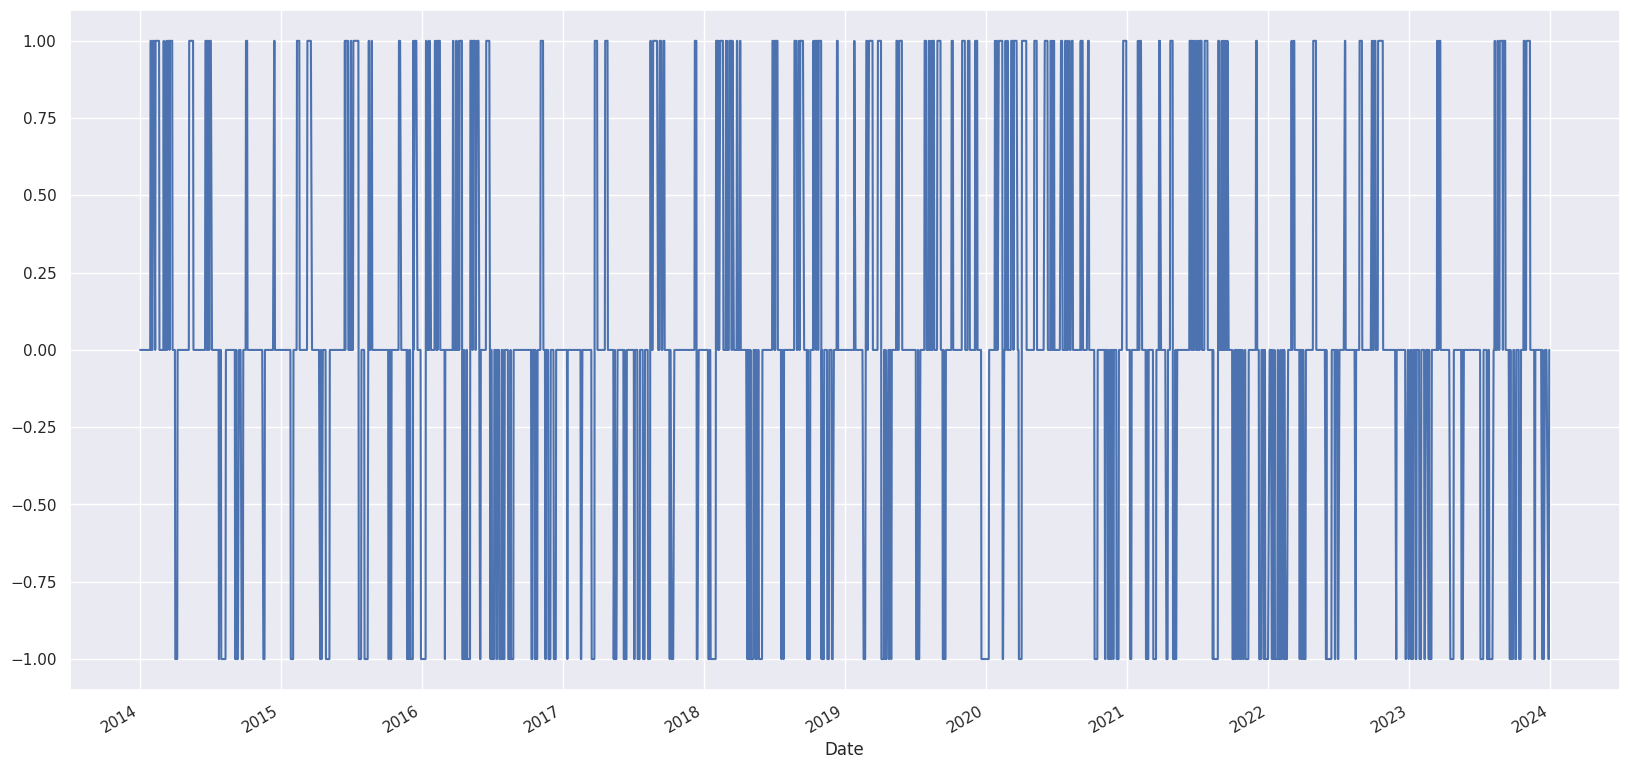

In [128]:
# plot the position through time to get an idea of when we are long and when we are short
hsba_so['Position'].plot(figsize=(20,10));

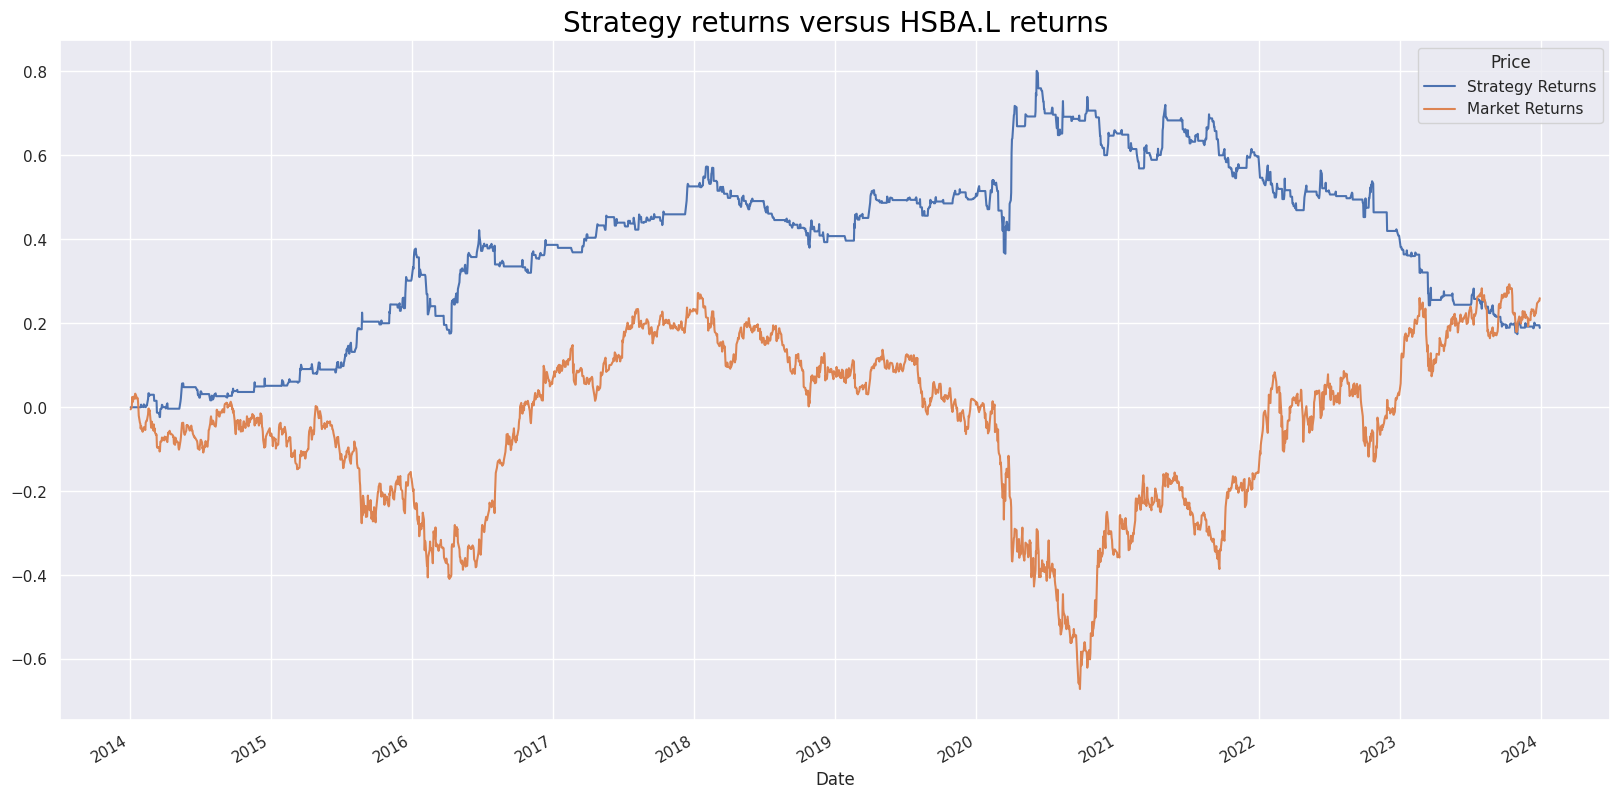

In [129]:
#Set up a column holding the daily HSBA.L returns
hsba_so['Market Returns'] = hsba_so['Close'].pct_change()

#Create column for Strategy Returns by multiplying the daily HSAB.L returns by the position that was held at close
#of business the previous day
hsba_so['Strategy Returns'] = hsba_so['Market Returns'] * hsba_so['Position'].shift(1)

#Finally plot the strategy returns versus HSBA.L returns
hsba_so[['Strategy Returns','Market Returns']].cumsum().plot(figsize=(20,10));

plt.title('Strategy returns versus HSBA.L returns', color = 'black', fontsize = 20);

In [130]:
# So here we can see that the returns were somewhat positive but by aminuscule rate. The stock graph exhibits some violent volatility so retrospectively
# the strategy of buying and holding wouldn't have hade any significant returns, however short term specualtive approach might have resulted in significant
# gains (or losses).

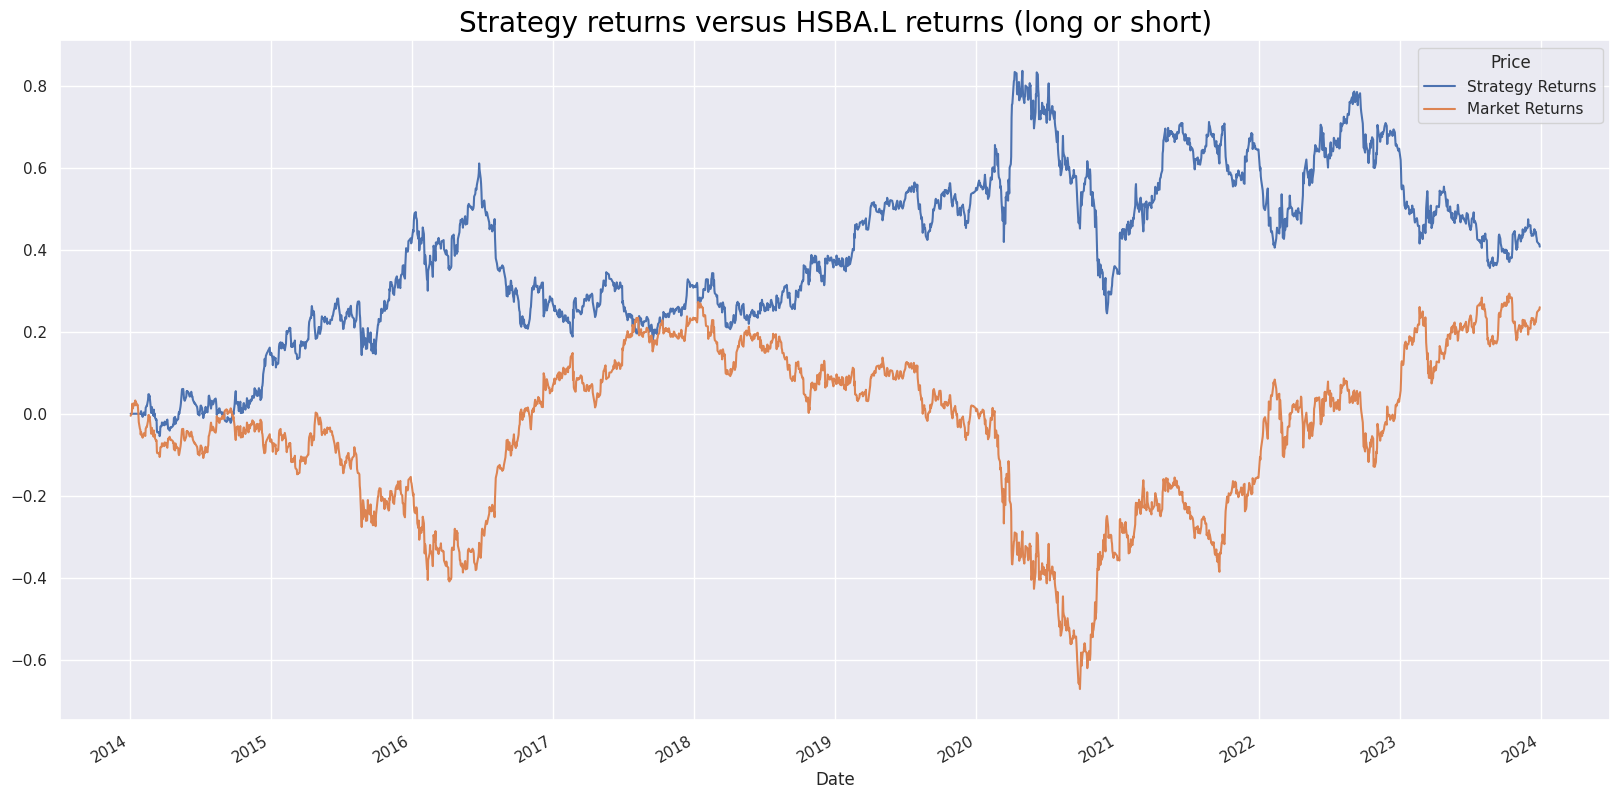

In [131]:
# second implementation of the strategy – the one where we are either long or short

hsba_so['L14'] = hsba_so['Low'].rolling(window=14).min()
hsba_so['H14'] = hsba_so['High'].rolling(window=14).max()

hsba_so['%K'] = 100*((hsba_so['Close'] - hsba_so['L14']) / (hsba_so['H14'] - hsba_so['L14']) )
hsba_so['%D'] = hsba_so['%K'].rolling(window=3).mean()

hsba_so['Sell Entry'] = ((hsba_so['%K'] < hsba_so['%D']) & (hsba_so['%K'].shift(1) > hsba_so['%D'].shift(1))) & (hsba_so['%D'] > 80)
hsba_so['Buy Entry'] = ((hsba_so['%K'] > hsba_so['%D']) & (hsba_so['%K'].shift(1) < hsba_so['%D'].shift(1))) & (hsba_so['%D'] < 20)

#Create empty "Position" column
hsba_so['Position'] = np.nan 

#Set position to -1 for sell signals
hsba_so.loc[hsba_so['Sell Entry'],'Position'] = -1 

#Set position to -1 for buy signals
hsba_so.loc[hsba_so['Buy Entry'],'Position'] = 1 

#Set starting position to flat (i.e. 0)
hsba_so['Position'].iloc[0] = 0 

#Forward fill the position column to show holding of positions through time
hsba_so['Position'] = hsba_so['Position'].fillna(method='ffill')

#Set up a column holding the daily HSBA.L returns
hsba_so['Market Returns'] = hsba_so['Close'].pct_change()

#Create column for Strategy Returns by multiplying the daily HSBA.L returns by the position that was held at close
#of business the previous day
hsba_so['Strategy Returns'] = hsba_so['Market Returns'] * hsba_so['Position'].shift(1)

#Finally plot the strategy returns versus HSBA.L returns
hsba_so[['Strategy Returns','Market Returns']].cumsum().plot(figsize=(20,10));

plt.title('Strategy returns versus HSBA.L returns (long or short)', color = 'black', fontsize = 20);

In [132]:
# This implementations demonstrates better outcomes. 

In [133]:
# Rate of Change (ROC)
# The ROC indicator is a pure momentum oscillator. The ROC calculation compares the current price with the price "n" periods ago e.g. when we compute the ROC
# of the daily price with a 9-day lag, we are simply looking at how much, in percentage, the price has gone up (or down) compared to 9 days ago. 
# Like other momentum indicators, ROC has overbought and oversold zones that may be adjusted according to market conditions.

In [134]:
hsba_roc = hsba.copy()
hsba_roc

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  658.400024  661.200012  654.599976  659.700012  383.506287   
2014-01-03  653.000000  659.388000  649.796997  656.400024  381.587799   
2014-01-06  658.099976  664.299988  656.388000  660.000000  383.680542   
2014-01-07  659.799988  678.400024  659.599976  675.799988  392.865692   
2014-01-08  673.099976  677.940979  671.911011  674.500000  392.110046   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2014-01-02  15181957  
2014-01-03  15846261  
2014-01-06  26415293  
2014-01-07  31453649  
2014-01-08  24154793  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[2525 rows x 6 columns]

In [135]:
hsba_roc_12mo = hsba_roc['2023-01-01':'2023-12-31']
hsba_roc_12mo 

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  518.099976  531.700012  515.700012  529.900024  494.827026   
2023-01-04  535.099976  544.799988  532.500000  543.500000  507.526855   
2023-01-05  548.000000  568.400024  545.398987  565.299988  527.883911   
2023-01-06  566.000000  569.849976  559.599976  568.599976  530.965515   
2023-01-09  564.500000  566.799988  561.599976  563.200012  525.922913   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2023-01-03  33285725  
2023-01-04  21604090  
2023-01-05  36654670  
2023-01-06  31225164  
2023-01-09  23530081  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[251 rows x 6 columns]

In [136]:
hsba_roc_12mo['ROC'] = ( hsba_roc_12mo['Adj Close'] / hsba_roc_12mo['Adj Close'].shift(9) -1 ) * 100
hsba_roc_12mo[['Adj Close', 'ROC']]

Price        Adj Close       ROC
Date                            
2023-01-03  494.827026       NaN
2023-01-04  507.526855       NaN
2023-01-05  527.883911       NaN
2023-01-06  530.965515       NaN
2023-01-09  525.922913       NaN
...                ...       ...
2023-12-21  622.500000  0.532944
2023-12-22  627.799988  1.849442
2023-12-27  631.500000  2.052361
2023-12-28  631.599976  2.333111
2023-12-29  635.500000  3.115368

[251 rows x 2 columns]

In [137]:
# selection of data - last 100 days

hsba_roc_100d = hsba_roc_12mo[-100:]
dates = hsba_roc_100d.index
price = hsba_roc_100d['Adj Close']
roc = hsba_roc_100d['ROC']

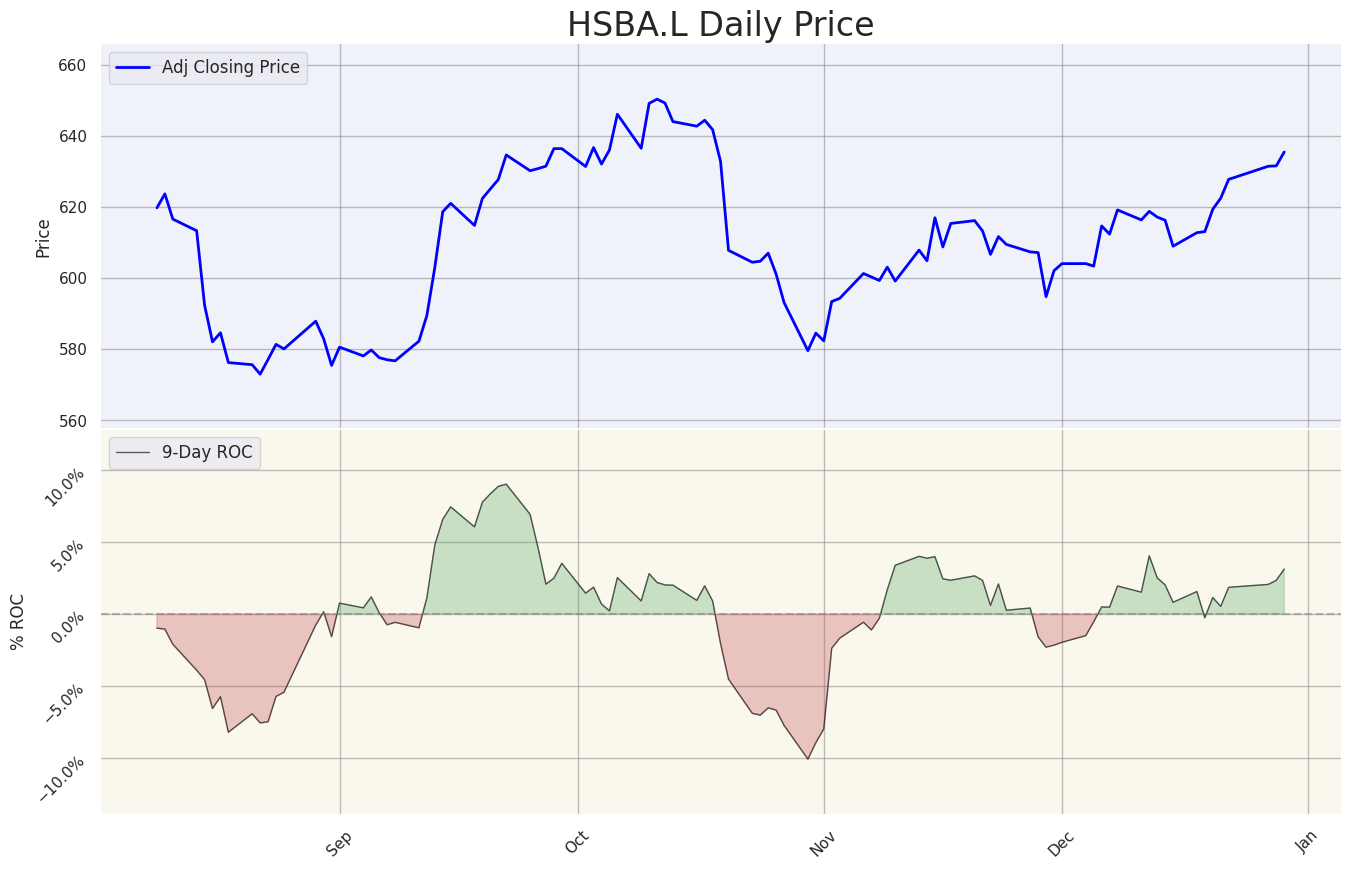

In [138]:
# Plot HSBA.L Adj Close Price and 9-day ROC for last 100 days of 2023

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0)

plt.rcParams.update({'font.size': 14})

# Price subplot
price_ax = plt.subplot(2, 1, 1)
price_ax.plot(dates, price, color='blue', linewidth=2, label="Adj Closing Price")
price_ax.legend(loc="upper left", fontsize=12)
price_ax.set_ylabel("Price")
price_ax.set_title("HSBA.L Daily Price", fontsize=24)

# ROC subplot
roc_ax = plt.subplot(2, 1, 2, sharex = price_ax)
roc_ax.plot(roc, color='k', linewidth = 1, alpha=0.7, label="9-Day ROC")
roc_ax.legend(loc="upper left", fontsize=12)
roc_ax.set_ylabel("% ROC")

# Adding a horizontal line at the zero level in the ROC subplot:
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)

# Filling the areas between the indicator and the level 0 line:
roc_ax.fill_between(dates, 0, roc, where = (roc >= 0), color='g', alpha=0.3, interpolate=True)
roc_ax.fill_between(dates, 0, roc, where = (roc  < 0), color='r', alpha=0.3, interpolate=True)

# Formatting the date labels
roc_ax.xaxis.set_major_formatter(DateFormatter('%b'))

# Formatting the labels on the y axis for ROC:
roc_ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

# Adding a grid to both subplots:
price_ax.grid(color='grey', linestyle='-', alpha=0.5)
roc_ax.grid(color='grey', linestyle='-', alpha=0.5)

# Setting a background color for the both subplots:
price_ax.set_facecolor((.94,.95,.98))
roc_ax.set_facecolor((.98,.97,.93))

# Adding margins around the plots:
price_ax.margins(0.05, 0.2)
roc_ax.margins(0.05, 0.2)

# Hiding the tick marks from the horizontal and vertical axis:
price_ax.tick_params(left=False, bottom=False)
roc_ax.tick_params(left=False, bottom=False, labelrotation=45)

# Hiding all the spines for the price subplot:
for s in price_ax.spines.values():
    s.set_visible(False)
# Hiding all the spines for the ROC subplot:
for s in roc_ax.spines.values():
    s.set_visible(False)

# To better separate the two subplots, we reinstate a spine in between them
roc_ax.spines['top'].set_visible(True)
roc_ax.spines['top'].set_linewidth(1.5)

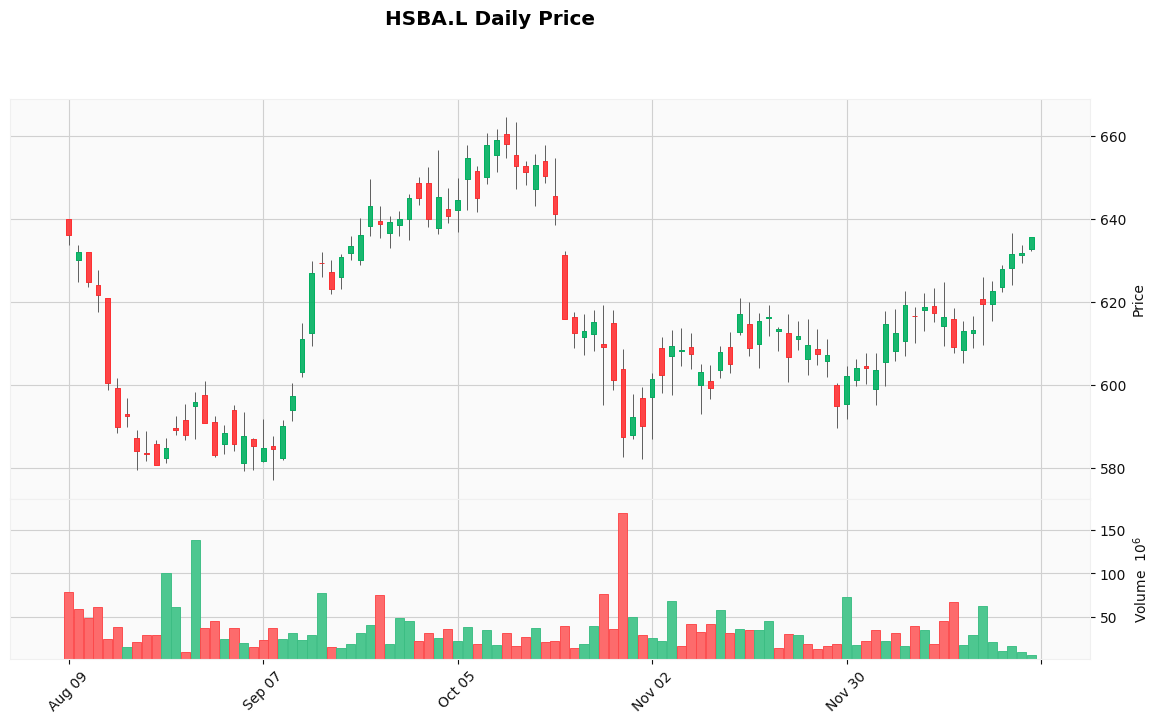

In [139]:
# Candlestick and volume plot for same time frame

mpf.plot(hsba_roc_100d, type='candle',  style='yahoo', figsize=(15,8),  title="HSBA.L Daily Price", volume=True)

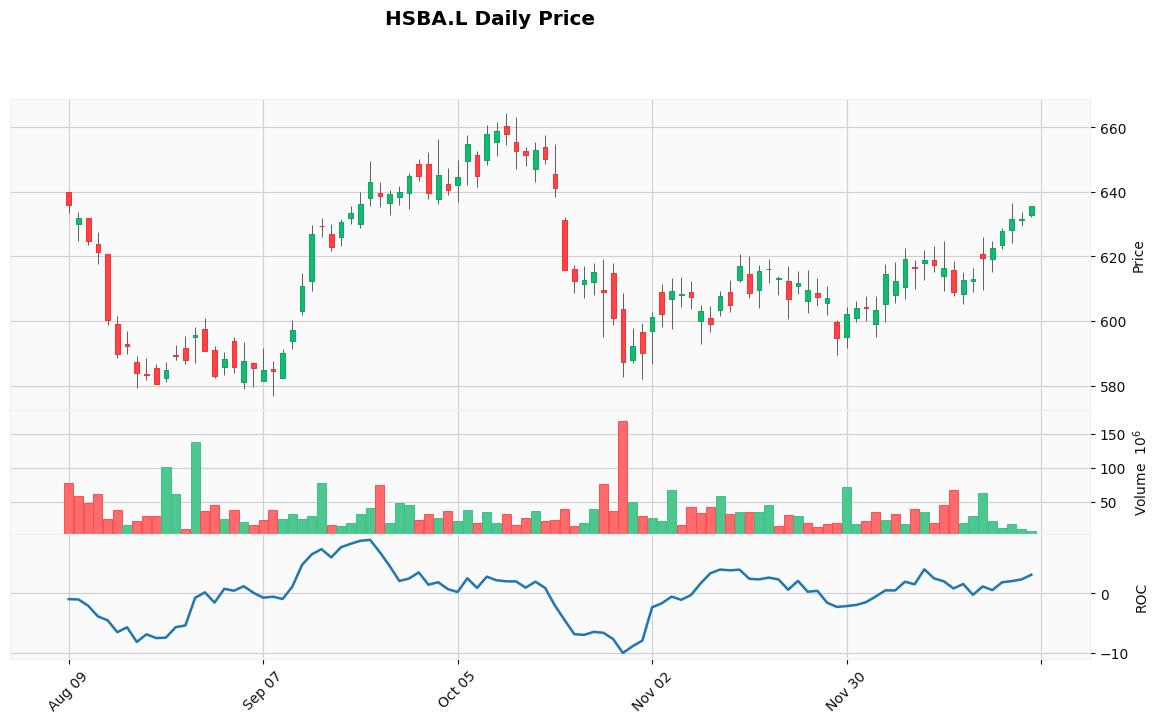

In [140]:
# Combined Candlestick, ROC and Volume plot

# We create an additional plot planing it on the third panel
roc_plot = mpf.make_addplot(roc, panel=2, ylabel='ROC')

#We pass the additional plot using the addplot parameter
mpf.plot(hsba_roc_100d, type='candle',  style='yahoo', figsize=(15,8), addplot=roc_plot, title="HSBA.L Daily Price", volume=True)

In [141]:
# Volatility trading strategies
# Volatility trading involves predicting the stability of an asset’s value. Instead of trading on the price rising or falling, traders take a position
# on whether it will move in any direction.

In [142]:
# Bollinger Bands¶
# A Bollinger Band is a volatility indicator based on based on the correlation between the normal distribution and stock price and can be used to draw 
# support and resistance curves. It is defined by a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA)
# of the security's price, but can be adjusted to user preferences.

# By default it calculates a 20-period SMA (the middle band), an upper band two standard deviations above the the moving average and a lower band two standard
# deviations below it.

# If the price moves above the upper band this could indicate a good time to sell, and if it moves below the lower band it could be a good time to buy.

# Whereas the RSI can only be used as a confirming factor inside a ranging market, not a trending market, by using Bollinger bands we can calculate the widening variable,
# or moving spread between the upper and the lower bands, that tells us if prices are about to trend and whether the RSI signals might not be that reliable.

# Despite 90% of the price action happening between the bands, however, a breakout is not necessarily a trading signal as it provides no clue as to the direction
# and extent of future price movement.

In [143]:
hsba_12mo

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  518.099976  531.700012  515.700012  529.900024  494.827026   
2023-01-04  535.099976  544.799988  532.500000  543.500000  507.526855   
2023-01-05  548.000000  568.400024  545.398987  565.299988  527.883911   
2023-01-06  566.000000  569.849976  559.599976  568.599976  530.965515   
2023-01-09  564.500000  566.799988  561.599976  563.200012  525.922913   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2023-01-03  33285725  
2023-01-04  21604090  
2023-01-05  36654670  
2023-01-06  31225164  
2023-01-09  23530081  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[251 rows x 6 columns]

In [144]:
hsba_12mo_bb = hsba_12mo.copy()

In [145]:
hsba_12mo_bb

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  518.099976  531.700012  515.700012  529.900024  494.827026   
2023-01-04  535.099976  544.799988  532.500000  543.500000  507.526855   
2023-01-05  548.000000  568.400024  545.398987  565.299988  527.883911   
2023-01-06  566.000000  569.849976  559.599976  568.599976  530.965515   
2023-01-09  564.500000  566.799988  561.599976  563.200012  525.922913   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2023-01-03  33285725  
2023-01-04  21604090  
2023-01-05  36654670  
2023-01-06  31225164  
2023-01-09  23530081  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[251 rows x 6 columns]

In [146]:
#Get the time period (20 days)
period = 20
# Calculate the 20 Day Simple Moving Average, Std Deviation, Upper Band and Lower Band
#Calculating the Simple Moving Average
hsba_12mo_bb['SMA'] = hsba_12mo_bb['Close'].rolling(window=period).mean()
# Get the standard deviation
hsba_12mo_bb['STD'] = hsba_12mo_bb['Close'].rolling(window=period).std()
#Calculate the Upper Bollinger Band
hsba_12mo_bb['Upper'] = hsba_12mo_bb['SMA'] + (hsba_12mo_bb['STD'] * 2)
#Calculate the Lower Bollinger Band
hsba_12mo_bb['Lower'] = hsba_12mo_bb['SMA'] - (hsba_12mo_bb['STD'] * 2)
#Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']

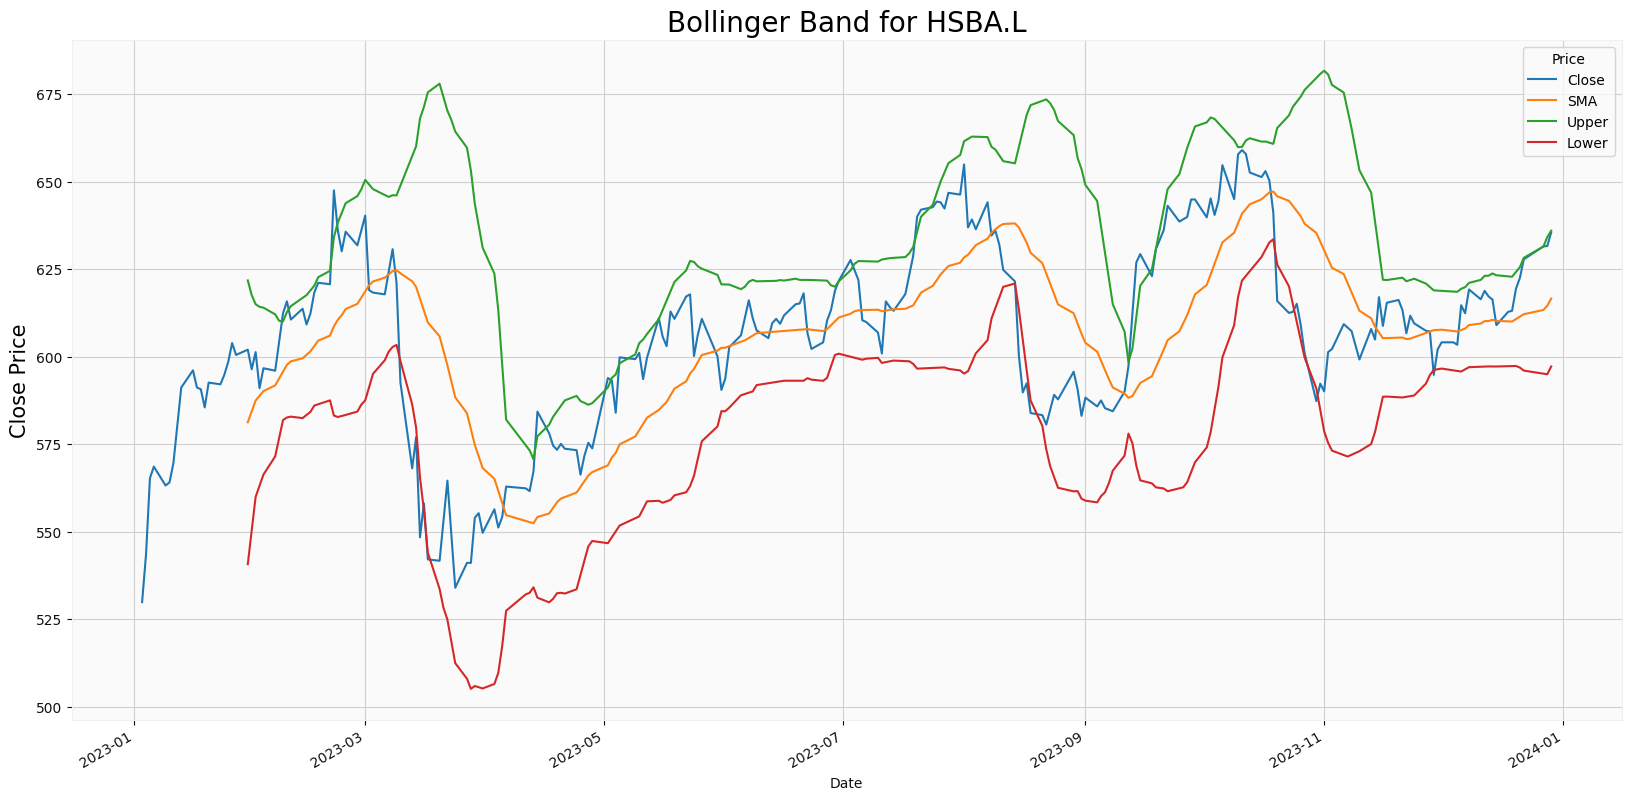

In [147]:
def bb_12mo():
  hsba_12mo_bb[column_list].plot(figsize=(20,10))
  plt.title('Bollinger Band for HSBA.L', color = 'black', fontsize = 20)
  plt.ylabel('Close Price', color = 'black', fontsize = 15)
  plt.show();

bb_12mo()

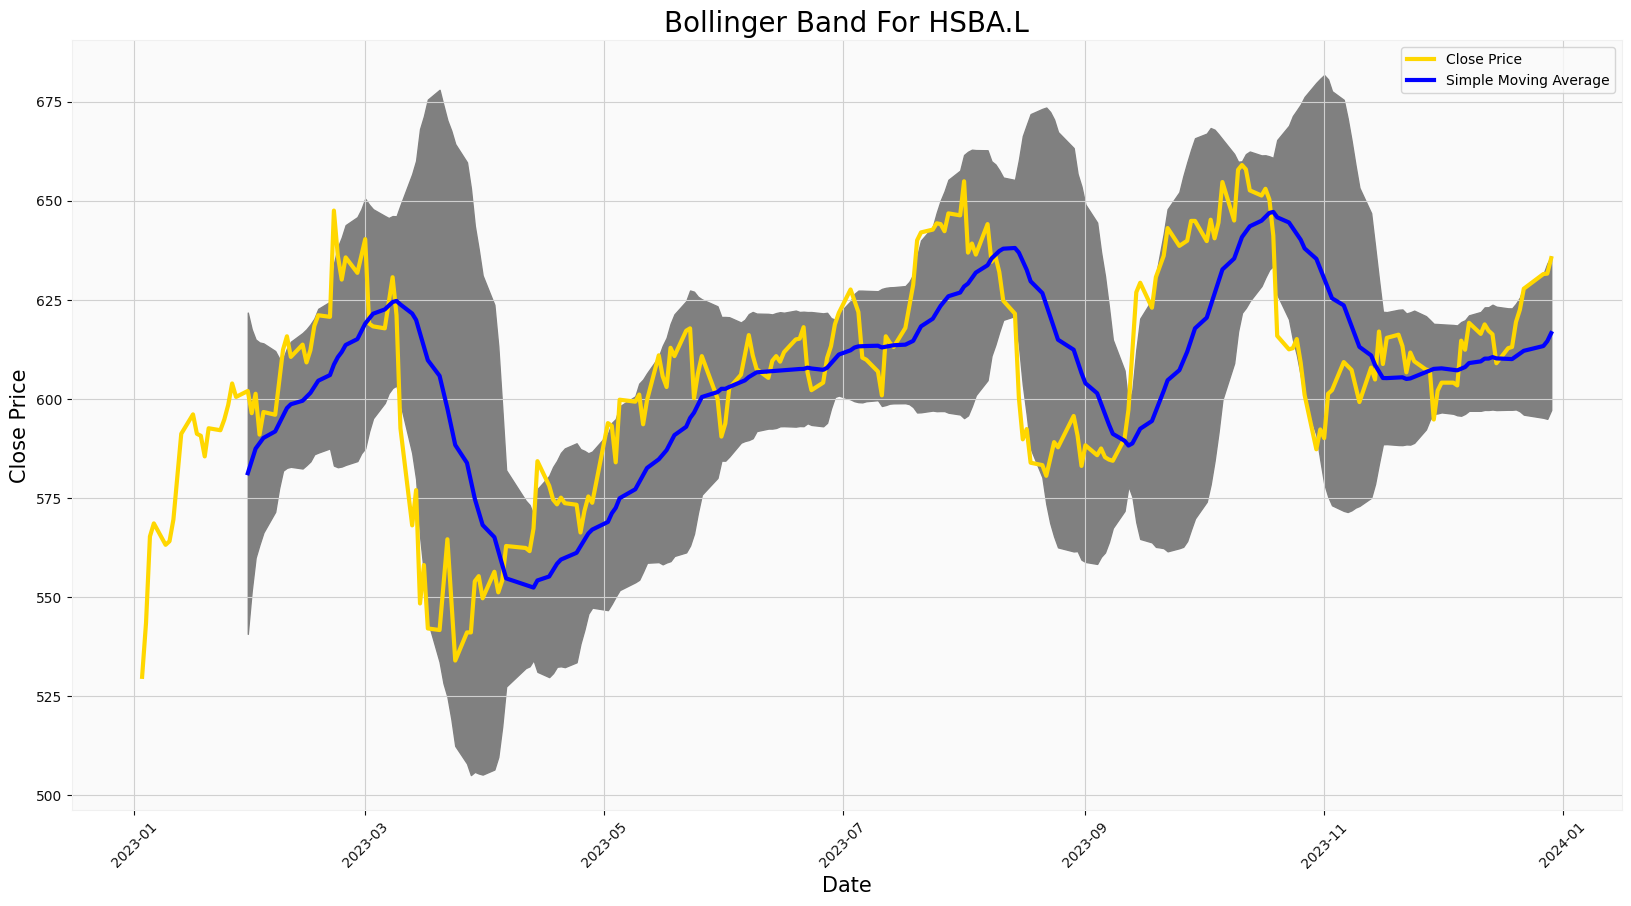

In [148]:
#Plot and shade the area between the two Bollinger bands

def bb_shaded():
  #Get the figure and the figure size
  fig = plt.figure(figsize=(20,10)) 

  #Add the subplot
  ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index

  # Get the index values of the DataFrame
  x_axis = hsba_12mo_bb.index

  # Plot and shade the area between the upper band and the lower band Grey
  ax.fill_between(x_axis, hsba_12mo_bb['Upper'], hsba_12mo_bb['Lower'], color='grey')

  # Plot the Closing Price and Moving Average
  ax.plot(x_axis, hsba_12mo_bb['Close'], color='gold', lw=3, label = 'Close Price') #lw = line width
  ax.plot(x_axis, hsba_12mo_bb['SMA'], color='blue', lw=3, label = 'Simple Moving Average')

  # Set the Title & Show the Image
  ax.set_title('Bollinger Band For HSBA.L', color = 'black', fontsize = 20)
  ax.set_xlabel('Date', color = 'black', fontsize = 15)
  ax.set_ylabel('Close Price', color = 'black', fontsize = 15)
  plt.xticks(rotation = 45)
  ax.legend()
  plt.show();

bb_shaded()

In [149]:
#Create a new data frame
new_hsba_12mo_bb = hsba_12mo_bb[period-1:]
#Show the new data frame
new_hsba_12mo_bb

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-30  597.900024  602.599976  592.099976  602.000000  562.154785   
2023-01-31  598.000000  599.900024  591.799988  596.400024  556.925476   
2023-02-01  592.000000  601.299988  590.700012  601.299988  561.501221   
2023-02-02  594.900024  596.049988  587.799988  591.000000  551.882874   
2023-02-03  584.799988  599.099976  584.200012  596.700012  557.205627   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume         SMA        STD       Upper       Lower  
Date                                                                 
2023-01-30  53950303  581.254996  20.261460  621.777916  540.732075  
2023-01-31  31284255  584.579996  16.497105  617.574206  551.585786  
2023-02-01  27200209  587.469995  13.757075  614.984145  559.955845  
2023-02-02  32064061  588.754996  12.739934  614.234863  563.275128  
2023-02-03  31727455  590.159998  11.923506  614.007011  566.312985  
...              ...         ...        ...         ...         ...  
2023-12-21  21034187  611.220001   7.171558  625.563117  596.876886  
2023-12-22  10833490  612.135001   8.053723  628.242447  596.027555  
2023-12-27  16151929  613.339999   9.049366  631.438731  595.241268  
2023-12-28   9952106  614.559998   9.792287  634.144571  594.975424  
2023-12-29   5844099  616.594998   9.698318  635.991634  597.198363  

[232 rows x 10 columns]

In [150]:
# Create a function to get the buy and sell signals
def get_signal_bb(data):
  buy_signal = [] #buy list
  sell_signal = [] #sell list

  for i in range(len(data['Close'])):
      if data['Close'][i] > data['Upper'][i]: #Then you should sell 
        buy_signal.append(np.nan)
        sell_signal.append(data['Close'][i])
      elif data['Close'][i] < data['Lower'][i]: #Then you should buy
        sell_signal.append(np.nan)
        buy_signal.append(data['Close'][i])
      else:
        buy_signal.append(np.nan)
        sell_signal.append(np.nan)
  return (buy_signal, sell_signal)

In [151]:
#Create new columns for the buy and sell signals
new_hsba_12mo_bb['Buy'] = get_signal_bb(new_hsba_12mo_bb)[0]
new_hsba_12mo_bb['Sell'] = get_signal_bb(new_hsba_12mo_bb)[1]

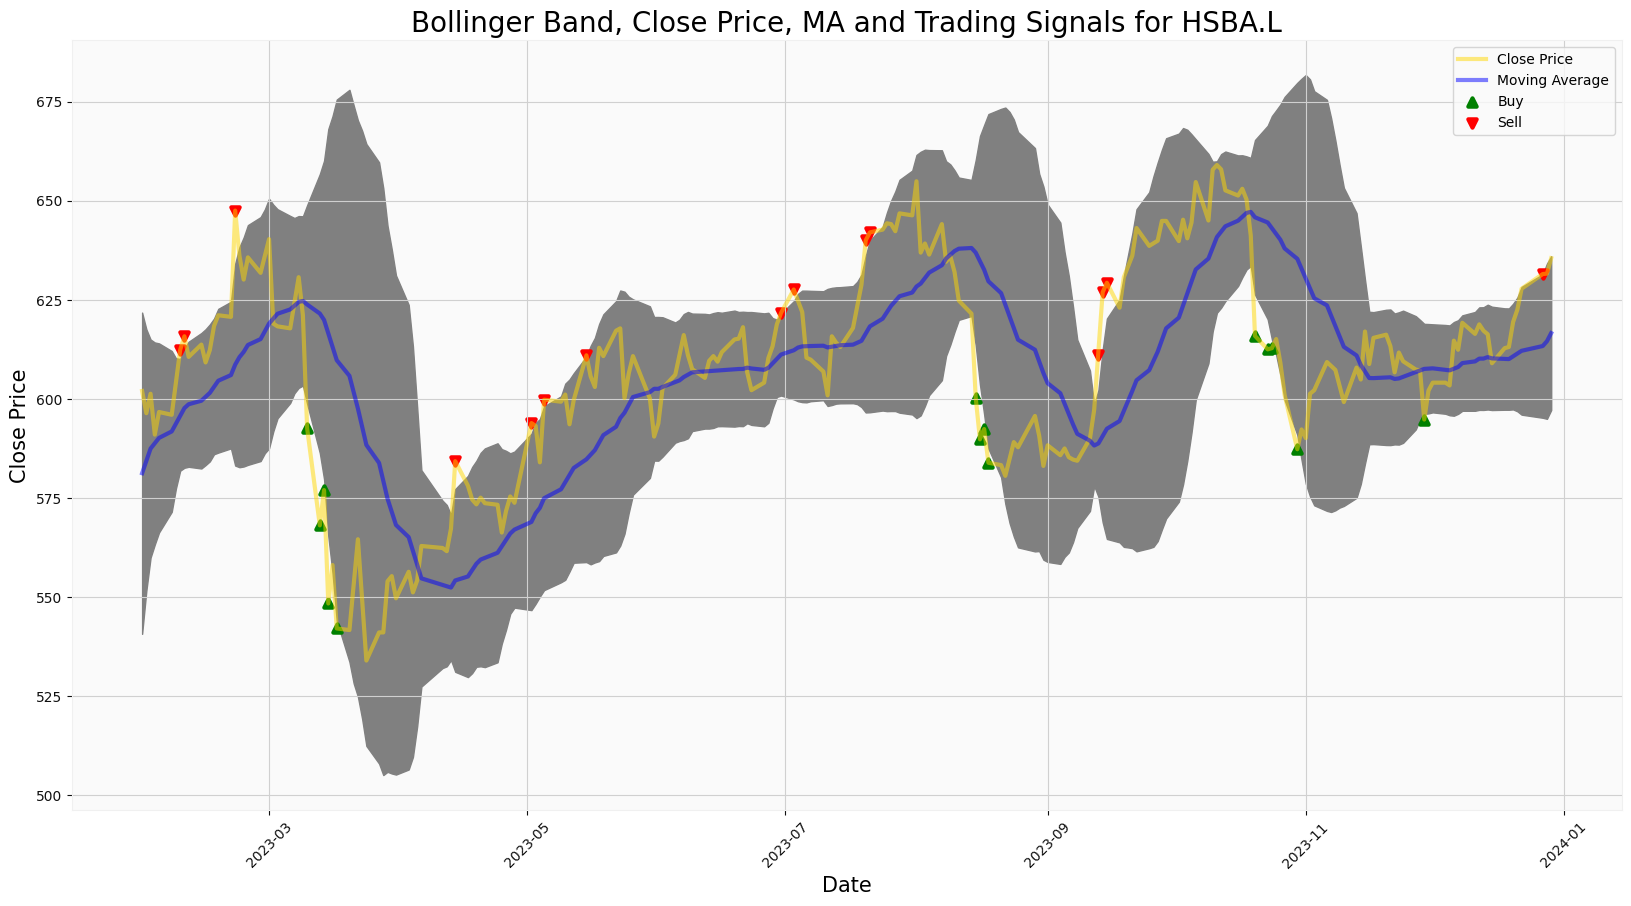

In [152]:
#Plot all of the data

def bb_alldata():
  #Get the figure and the figure size
  fig = plt.figure(figsize=(20,10))

  #Add the subplot
  ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
  # Get the index values of the DataFrame
  x_axis = new_hsba_12mo_bb.index
  # Plot and shade the area between the upper band and the lower band Grey

  ax.fill_between(x_axis, new_hsba_12mo_bb['Upper'], new_hsba_12mo_bb['Lower'], color='grey')
  # Plot the Closing Price and Moving Average
  ax.plot(x_axis, new_hsba_12mo_bb['Close'], color='gold', lw=3, label = 'Close Price',alpha = 0.5)
  ax.plot(x_axis, new_hsba_12mo_bb['SMA'], color='blue', lw=3, label = 'Moving Average',alpha = 0.5)
  ax.scatter(x_axis, new_hsba_12mo_bb['Buy'] , color='green', lw=3, label = 'Buy',marker = '^', alpha = 1)
  ax.scatter(x_axis, new_hsba_12mo_bb['Sell'] , color='red', lw=3, label = 'Sell',marker = 'v', alpha = 1)
  # Set the Title & Show the Image
  ax.set_title('Bollinger Band, Close Price, MA and Trading Signals for HSBA.L', color = 'black', fontsize = 20)
  ax.set_xlabel('Date', color = 'black', fontsize = 15)
  ax.set_ylabel('Close Price', color = 'black', fontsize = 15)
  plt.xticks(rotation = 45)
  ax.legend()
  plt.show();

bb_alldata()

In [153]:
# The Bollinger Bands technical indicator is an example of a mean reversion strategy.

In [154]:
# Mean reversion strategies
# In mean reversion algorithmic trading strategies stocks return to their mean and we can exploit when it deviates from that mean.

# These strategies usually involve selling into up moves and buying into down moves, a contrarian approach which assumes that the market has become oversold/overbought and prices will
# revert to their historical trends. This is almost the opposite of trend following where we enter in the direction of the strength and momentum, and momentum strategies such as buying stocks
# that have been showing an upward trend in hopes that the trend will continue, a continuation approach.


In [155]:
# Pairs Trading
# Pairs Trading is a market neutral trading strategy and a type of statistical arbitrage, which is exploiting statistical properties that we believe can make money if they continue.

# The basic idea is to select two cointegrated stocks which move similarly/are statistically related and deviate from their mean. Then sell the high priced stock and buy the low priced stock
# where there is a price divergence between the pairs. You make money from a pairs trade when your “long” outperforms your “short”: If your “long” rises more than your “short” or if your “long” falls
# less than your “short”.

# Pairs Trading can be called a mean reversion strategy where we bet that the prices will revert to their historical trends.

In [156]:
# create copy of FTSE100 stocks to find two cointegrated stocks for pairs trading

ftse100_stocks_pairs = ftse100_stocks.copy()

In [157]:
ftse100_stocks_pairs = ftse100_stocks_pairs.fillna(ftse100_stocks_pairs.mean()) # A little cheat to get rid of the NaNs in BP column
ftse100_stocks_pairs

Ticker      SHEL.L                                                        \
Price         Open         High     Low   Close    Adj Close      Volume   
Date                                                                       
2014-01-02  2156.0  2164.500000  2141.5  2155.5  1236.284912   3014631.0   
2014-01-03  2155.5  2175.500000  2147.5  2158.5  1238.006104   1808530.0   
2014-01-06  2159.5  2162.500000  2144.0  2147.0  1231.410278   2424268.0   
2014-01-07  2147.5  2166.500000  2137.0  2159.0  1238.292603   1971412.0   
2014-01-08  2163.5  2164.500000  2141.0  2143.5  1229.402832   2202404.0   
...            ...          ...     ...     ...          ...         ...   
2023-12-21  2556.0  2576.000000  2545.0  2557.0  2521.780518  13029100.0   
2023-12-22  2559.5  2577.500000  2555.0  2566.5  2531.149658   3698032.0   
2023-12-27  2567.5  2585.500000  2551.0  2556.0  2520.794189   5772822.0   
2023-12-28  2548.5  2565.554932  2538.0  2549.0  2513.890625   5805909.0   
2023-12-29  2542.0  2571.500000  2521.5  2571.5  2536.080566   3288599.0   

Ticker        AZN.L                                  ...       ULVR.L          \
Price          Open          High      Low    Close  ...          Low   Close   
Date                                                 ...                        
2014-01-02   3566.0   3592.500000   3545.5   3558.0  ...  2432.000000  2436.0   
2014-01-03   3561.5   3604.000000   3554.0   3585.5  ...  2434.824951  2445.0   
2014-01-06   3579.0   3607.850098   3579.0   3598.5  ...  2429.000000  2441.0   
2014-01-07   3584.0   3591.000000   3557.0   3562.5  ...  2438.719971  2443.0   
2014-01-08   3558.0   3571.500000   3539.5   3549.5  ...  2402.000000  2409.0   
...             ...           ...      ...      ...  ...          ...     ...   
2023-12-21  10436.0  10552.000000  10368.0  10480.0  ...  3766.500000  3779.0   
2023-12-22  10350.0  10454.000000  10350.0  10436.0  ...  3769.500000  3787.0   
2023-12-27  10472.0  10622.000000  10428.0  10528.0  ...  3767.000000  3787.5   
2023-12-28  10564.0  10712.000000  10350.0  10574.0  ...  3785.000000  3812.5   
2023-12-29  10526.0  10662.000000  10306.0  10600.0  ...  3780.000000  3800.0   

Ticker                                    BP.L                          \
Price         Adj Close     Volume        Open        High         Low   
Date                                                                     
2014-01-02  1741.064209  1852349.0  490.950012  490.950012  484.649994   
2014-01-03  1747.496704  1398177.0  488.850006  493.399994  486.200012   
2014-01-06  1744.637451  1432621.0  488.350006  491.600006  485.100006   
2014-01-07  1746.067139  1399261.0  488.049988  495.109009  484.100006   
2014-01-08  1721.766479  1863248.0  494.500000  494.721008  491.250000   
...                 ...        ...         ...         ...         ...   
2023-12-21  3779.000000  4689376.0  466.500000  469.850006  460.989014   
2023-12-22  3787.000000   939491.0  467.700012  469.799988  466.250000   
2023-12-27  3787.500000  1517415.0  468.899994  472.100006  464.350006   
2023-12-28  3812.500000  1538803.0  466.149994  468.350006  464.049988   
2023-12-29  3800.000000  1028067.0  464.799988  466.149994  460.149994   

Ticker                                          
Price            Close   Adj Close      Volume  
Date                                            
2014-01-02  488.850006  267.519196  17484921.0  
2014-01-03  487.899994  266.999268  18104875.0  
2014-01-06  488.950012  267.573853  18270944.0  
2014-01-07  494.000000  270.337463  23078624.0  
2014-01-08  492.850006  269.708160  15469583.0  
...                ...         ...         ...  
2023-12-21  466.250000  459.136383  33563181.0  
2023-12-22  467.200012  460.071899  13038240.0  
2023-12-27  467.200012  460.071899  28098605.0  
2023-12-28  465.200012  458.102417  20417183.0  
2023-12-29  466.149994  459.037903   7867412.0  

[2525 rows x 36 columns]

In [158]:
# Concise summary of the dataframe

ftse100_stocks_pairs.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2525 entries, 2014-01-02 to 2023-12-29
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (SHEL.L, Open)       2525 non-null   float64
 1   (SHEL.L, High)       2525 non-null   float64
 2   (SHEL.L, Low)        2525 non-null   float64
 3   (SHEL.L, Close)      2525 non-null   float64
 4   (SHEL.L, Adj Close)  2525 non-null   float64
 5   (SHEL.L, Volume)     2525 non-null   float64
 6   (AZN.L, Open)        2525 non-null   float64
 7   (AZN.L, High)        2525 non-null   float64
 8   (AZN.L, Low)         2525 non-null   float64
 9   (AZN.L, Close)       2525 non-null   float64
 10  (AZN.L, Adj Close)   2525 non-null   float64
 11  (AZN.L, Volume)      2525 non-null   int64  
 12  (HSBA.L, Open)       2525 non-null   float64
 13  (HSBA.L, High)       2525 non-null   float64
 14  (HSBA.L, Low)        2525 non-null   float64
 15  (HSBA.L, Close)     

In [159]:
# Descriptive statistics for FTSE 100 stocks

ftse100_stocks_pairs.describe()

Ticker       SHEL.L                                                      \
Price          Open         High          Low        Close    Adj Close   
count   2525.000000  2525.000000  2525.000000  2525.000000  2525.000000   
mean    2049.435481  2071.160043  2025.362580  2048.895621  1602.007193   
std      414.788486   413.849738   421.749954   415.333058   430.450604   
min      901.400024   902.500000     3.045000   900.000000   782.336365   
25%     1739.199951  1762.500000  1714.000000  1740.000000  1253.952759   
50%     2153.000000  2176.500000  2132.500000  2153.500000  1504.182129   
75%     2365.500000  2385.500000  2345.500000  2366.500000  1928.937134   
max     2784.500000  2801.000000  2757.500000  2772.500000  2707.015625   

Ticker                      AZN.L                                            \
Price         Volume         Open          High           Low         Close   
count   2.525000e+03   2525.00000   2525.000000   2525.000000   2525.000000   
mean    1.079409e+07   6719.89217   6798.408205   6649.829768   6721.224443   
std     1.021688e+07   2416.18695   2438.010166   2391.720797   2417.431889   
min     0.000000e+00   3558.00000   3571.500000   3367.070068   3549.500000   
25%     4.993389e+06   4568.00000   4625.000000   4521.000000   4572.500000   
50%     7.256067e+06   5912.00000   5961.000000   5866.000000   5930.000000   
75%     1.257918e+07   8514.00000   8614.000000   8430.000000   8509.000000   
max     1.381874e+08  12164.00000  12828.452148  12122.066406  12294.000000   

Ticker  ...       ULVR.L                                                 BP.L  \
Price   ...          Low        Close    Adj Close        Volume         Open   
count   ...  2525.000000  2525.000000  2525.000000  2.525000e+03  2525.000000   
mean    ...  3756.149303  3787.792687  3240.322973  3.337314e+06   436.204366   
std     ...   679.753152   684.658533   771.963569  3.236679e+06    86.216869   
min     ...  2291.649902  2306.000000  1663.874390  0.000000e+00   191.559998   
25%     ...  3156.500000  3189.000000  2491.993408  2.103560e+06   367.750000   
50%     ...  3961.000000  3995.500000  3494.290039  2.785545e+06   457.750000   
75%     ...  4232.000000  4264.500000  3859.565186  3.793093e+06   496.899994   
max     ...  5264.000000  5324.000000  4579.083008  1.300942e+08   602.000000   

Ticker                                                                    
Price          High          Low        Close    Adj Close        Volume  
count   2525.000000  2525.000000  2525.000000  2525.000000  2.525000e+03  
mean     441.172593   430.957263   436.011649   327.965144  4.213920e+07  
std       85.739849    86.897778    86.099500    83.364245  2.311970e+07  
min      194.699997     4.686000   193.440002   162.816010  0.000000e+00  
25%      376.049988   362.347992   368.399994   260.983154  2.784455e+07  
50%      462.600006   452.899994   456.799988   312.422241  3.618304e+07  
75%      501.700012   492.049988   496.850006   397.621765  4.978647e+07  
max      603.200012   595.400024   598.299988   542.880188  2.574570e+08  

[8 rows x 36 columns]

In [160]:
ulvr_historical =  ftse100_stocks_pairs['ULVR.L']
shel_historical =  ftse100_stocks_pairs['SHEL.L']
bp_historical =  ftse100_stocks_pairs['BP.L']
azn_historical =  ftse100_stocks_pairs['AZN.L']
gsk_historical =  ftse100_stocks_pairs['GSK.L']
hsba_historical =  ftse100_stocks_pairs['HSBA.L']

In [161]:
# DataFrame of the closing price of selected stocks

ftse100_stocks_close = pd.DataFrame({"ULVR.L": ulvr_historical.Close,
                                "SHEL.L": shel_historical.Close,
                                "BP.L": bp_historical.Close,
                                "AZN.L": azn_historical.Close,
                                "GSK.L": gsk_historical.Close,
                                "HSBA.L": hsba_historical.Close
                                })
ftse100_stocks_close.head()

ULVR.L  SHEL.L        BP.L   AZN.L        GSK.L      HSBA.L
Date                                                                   
2014-01-02  2436.0  2155.5  488.850006  3558.0  1611.268677  659.700012
2014-01-03  2445.0  2158.5  487.899994  3585.5  1616.305420  656.400024
2014-01-06  2441.0  2147.0  488.950012  3598.5  1628.897461  660.000000
2014-01-07  2443.0  2159.0  494.000000  3562.5  1628.393677  675.799988
2014-01-08  2409.0  2143.5  492.850006  3549.5  1610.765015  674.500000

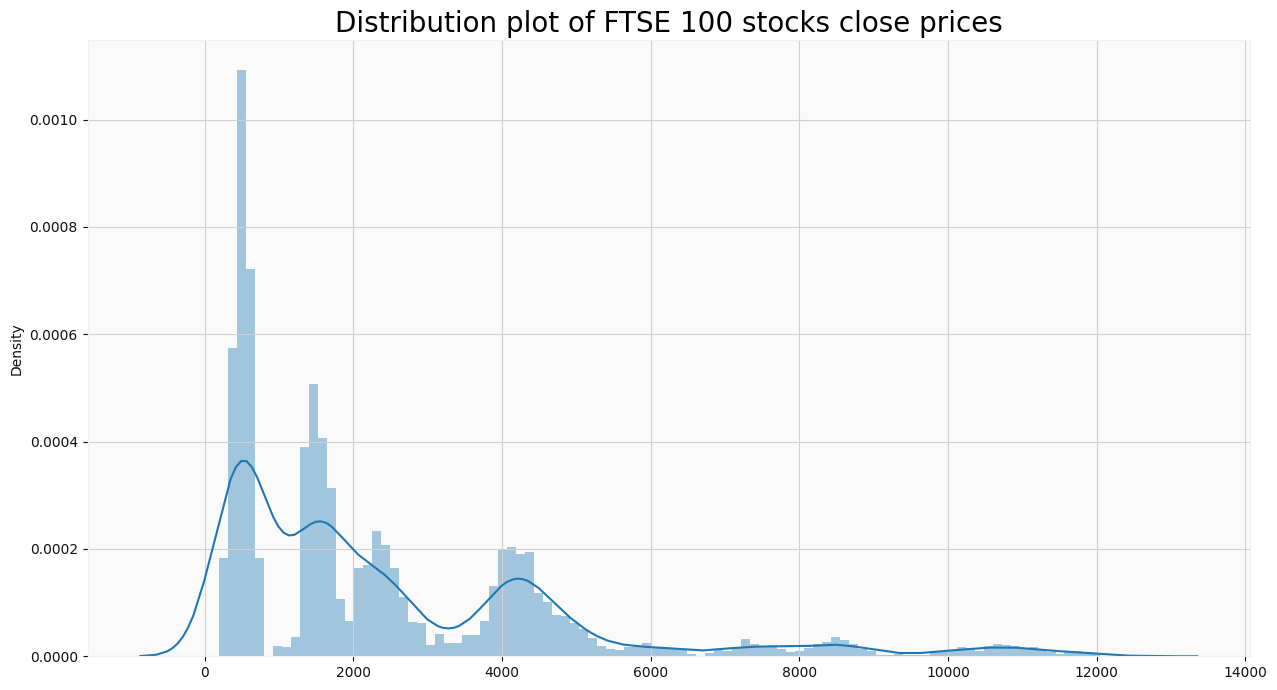

In [162]:
# Distribution plot of close prices

def dist_plt():
  #plt.style.use('seaborn')
  plt.figure(figsize=(15, 8))
  plt.title("Distribution plot of FTSE 100 stocks close prices", color = 'black', fontsize = 20)
  sns.distplot(ftse100_stocks_close, bins=100, kde=True);

dist_plt()

In [163]:
# The distribution of prices is always positive. It has a very long tail and a high peak near zero. This is because we are looking at prices from different stocks with diverse closing prices over 10 years.

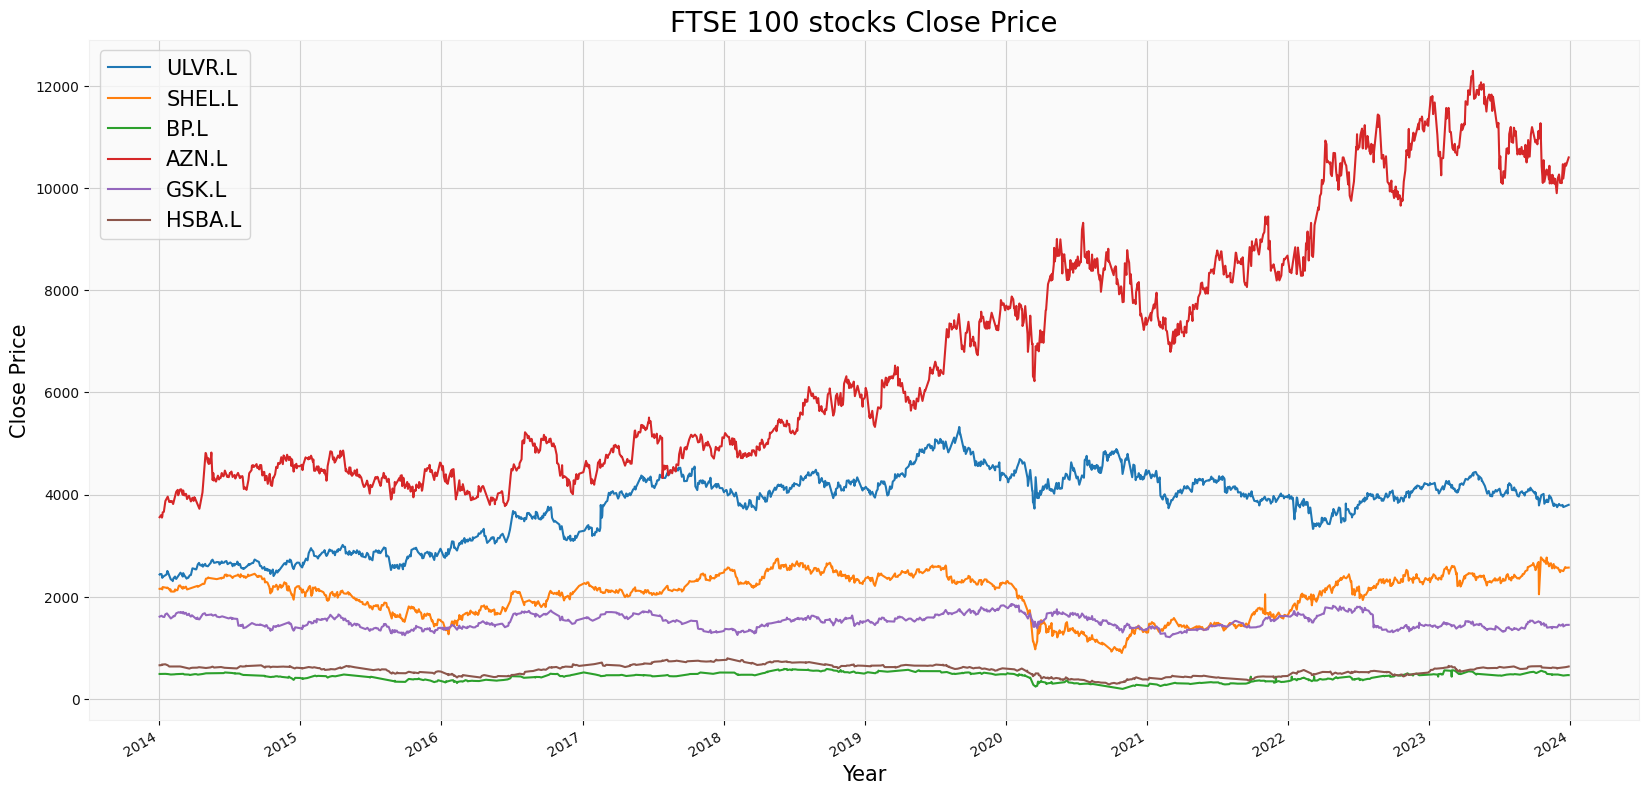

In [164]:
# Plot close prices of selected stocks

def ftse_close():
  ftse100_stocks_close.plot(figsize=(20,10))
  plt.title('FTSE 100 stocks Close Price', color = 'black', fontsize = 20)
  plt.legend(fontsize=15)
  plt.xlabel('Year', color = 'black', fontsize = 15)
  plt.ylabel('Close Price', color = 'black', fontsize = 15);

ftse_close()

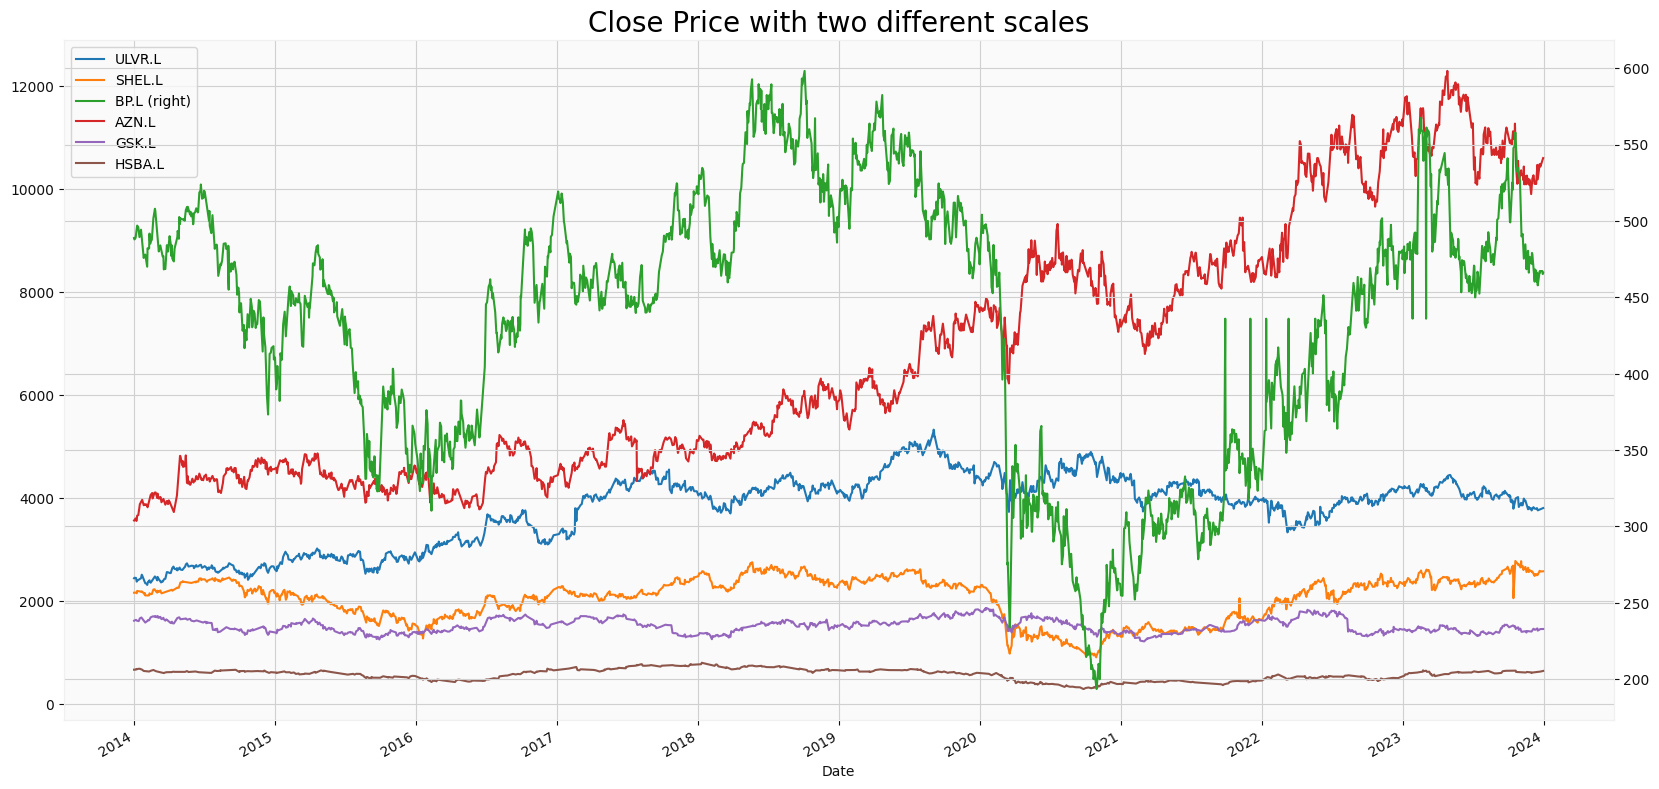

In [165]:
def two_scales():
  ax = ftse100_stocks_close.plot(secondary_y = ["BP.L"], grid = True, legend = True, figsize=(20,10))
  plt.title('Close Price with two different scales', color = 'black', fontsize = 20);

two_scales()

In [166]:
# Correlation
# We will compute the correlation, or strength and direction of the linear relationship between pairs of stocks.

np.corrcoef(hsba_historical['Close'], bp_historical['Close'])

array([[1.        , 0.84814659],
       [0.84814659, 1.        ]])

In [167]:
# compute the correlations between every pair of stocks
correlation_matrix = ftse100_stocks_close.corr() 
correlation_matrix

ULVR.L    SHEL.L      BP.L     AZN.L     GSK.L    HSBA.L
ULVR.L  1.000000  0.019164  0.043973  0.512128  0.170079 -0.061536
SHEL.L  0.019164  1.000000  0.945802  0.016546  0.175341  0.814808
BP.L    0.043973  0.945802  1.000000 -0.128279  0.242322  0.848147
AZN.L   0.512128  0.016546 -0.128279  1.000000  0.006840 -0.357010
GSK.L   0.170079  0.175341  0.242322  0.006840  1.000000  0.123814
HSBA.L -0.061536  0.814808  0.848147 -0.357010  0.123814  1.000000

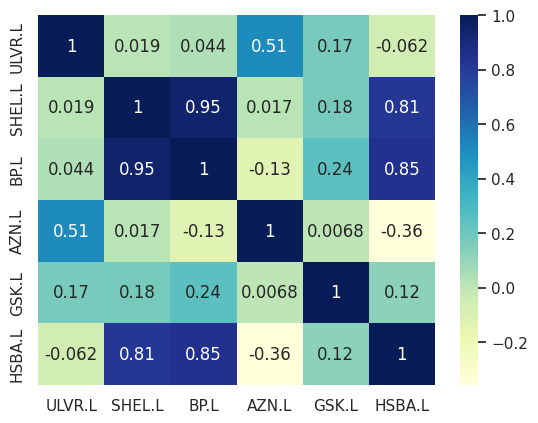

In [168]:
# Plot correlation heatmap
sns.set_theme()
sns.heatmap(ftse100_stocks_close.corr(), annot=True, cmap="YlGnBu");

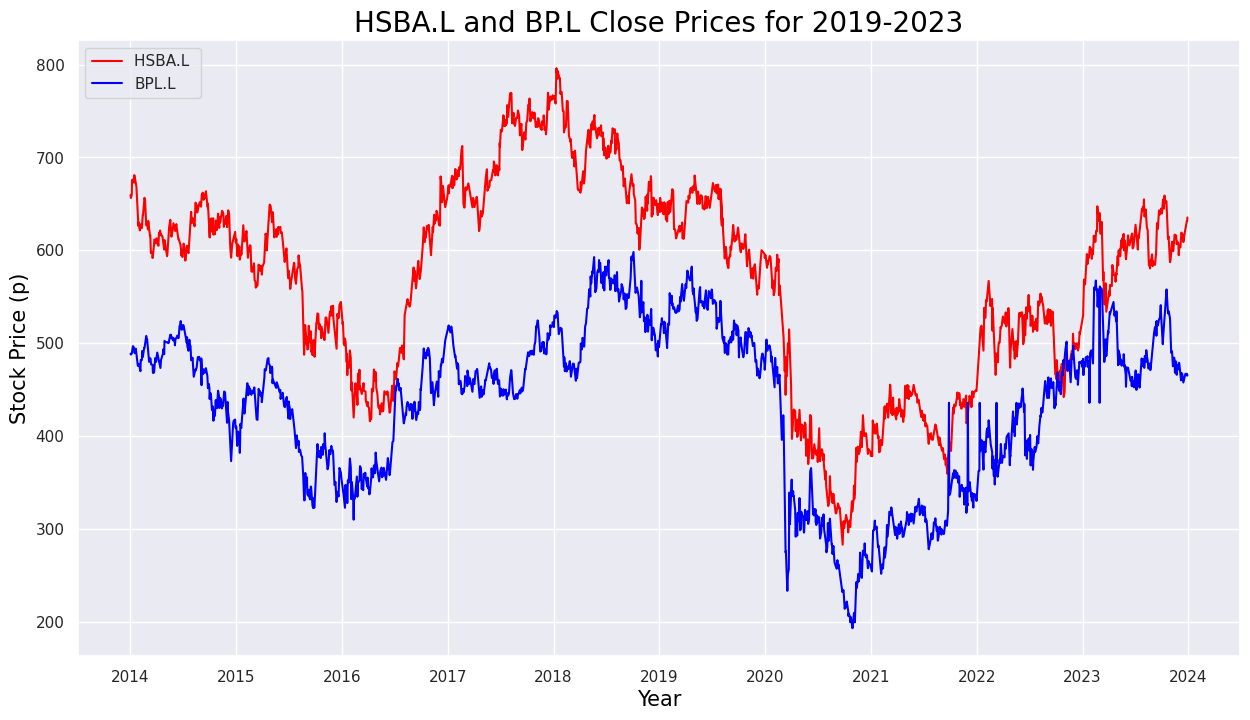

In [169]:
# Plot HSBA.L and BP.L stocks

def stocks_hsba_bp():
  plt.figure(figsize=(15, 8))
  plt.plot(ftse100_stocks_close.index, hsba_historical['Close'], label = 'HSBA.L ', color= 'red')
  plt.plot(ftse100_stocks_close.index, bp_historical['Close'], label = 'BPL.L', color= 'blue')
  plt.title("HSBA.L and BP.L Close Prices for 2019-2023", color = 'black', fontsize = 20)
  plt.xlabel('Year', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend(loc='upper left')
  plt.show()

stocks_hsba_bp()

In [170]:
# Feature extraction - Price ratio
# We need to calculate a ratio of one stock's price to another, so that we can know how much of each to buy and sell.

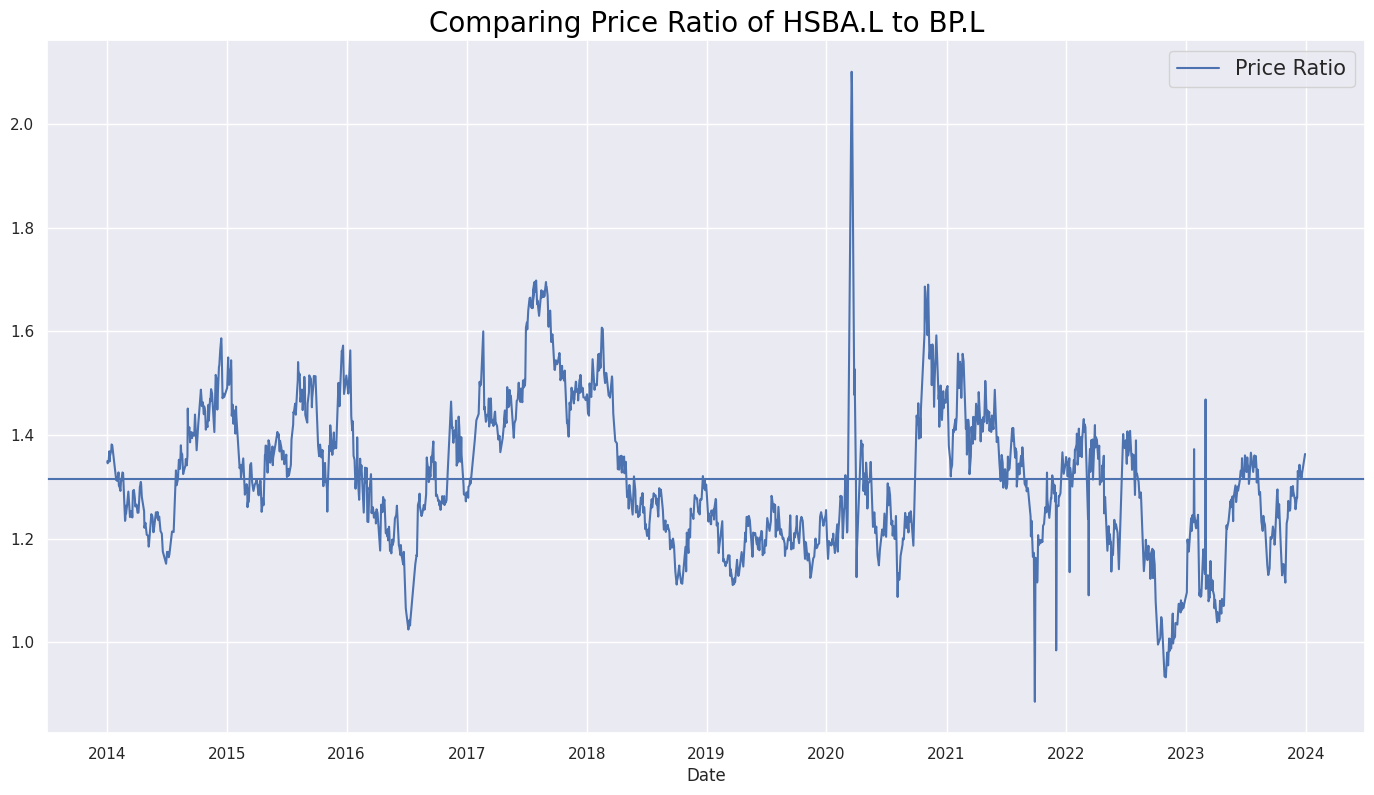

In [171]:
# Plot comparison of price ratio for HSBA.L and BP.L 

stock1 = ftse100_stocks_close['HSBA.L'] # get the first price series
stock2 = ftse100_stocks_close['BP.L'] # get the second price series
ratios = stock1 / stock2 # calculate the ratio of prices
plt.figure(figsize=(17,9))
sns.lineplot(data=ratios) # Plot the price ratio
plt.axhline(ratios.mean()) # Draw the average value
plt.legend(['Price Ratio'], loc='upper right', fontsize = 15)
plt.title('Comparing Price Ratio of HSBA.L to BP.L', color = 'black', fontsize = 20);

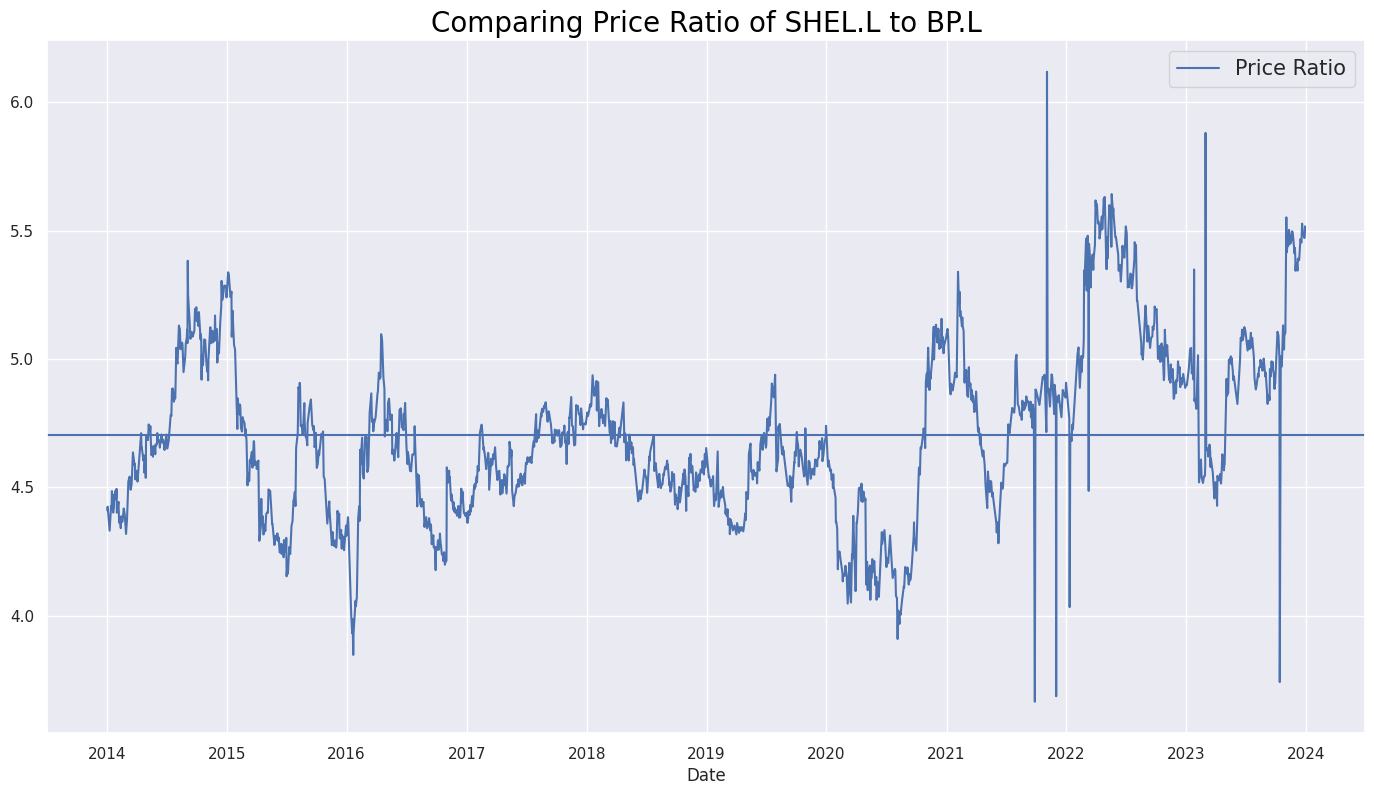

In [172]:
# Plot comparison of price ratio for oil stocks RSDB.L and BP.L 

stock3 = ftse100_stocks_close['SHEL.L'] # get the first price series
stock4 = ftse100_stocks_close['BP.L'] # get the second price series
ratios2 = stock3 / stock4 # calculate the ratio of prices
plt.figure(figsize=(17,9))
sns.lineplot(data=ratios2) # Plot the price ratio
plt.axhline(ratios2.mean()) # Draw the average value
#plt.style.use('seaborn')
plt.legend(['Price Ratio'], loc='upper right', fontsize = 15) 
plt.title('Comparing Price Ratio of SHEL.L to BP.L', color = 'black', fontsize = 20);

In [173]:
# Our pair of stocks do seem to float around some ratio and return to it and appear to be mean reverting. At a point where the ratio is far away from its mean, we will buy some of one stock and 
# sell/short some of the other so that we are net neutral in our exposure to the stocks.


In [174]:
# Feature scaling - Z-scores
# The z-score tells you how many standard deviations you are away from the mean. It is the ratio value minus its mean divided by the standard deviation of the ratio.
# As a measure of an observation's variability it can be used by traders to help determine market volatility.

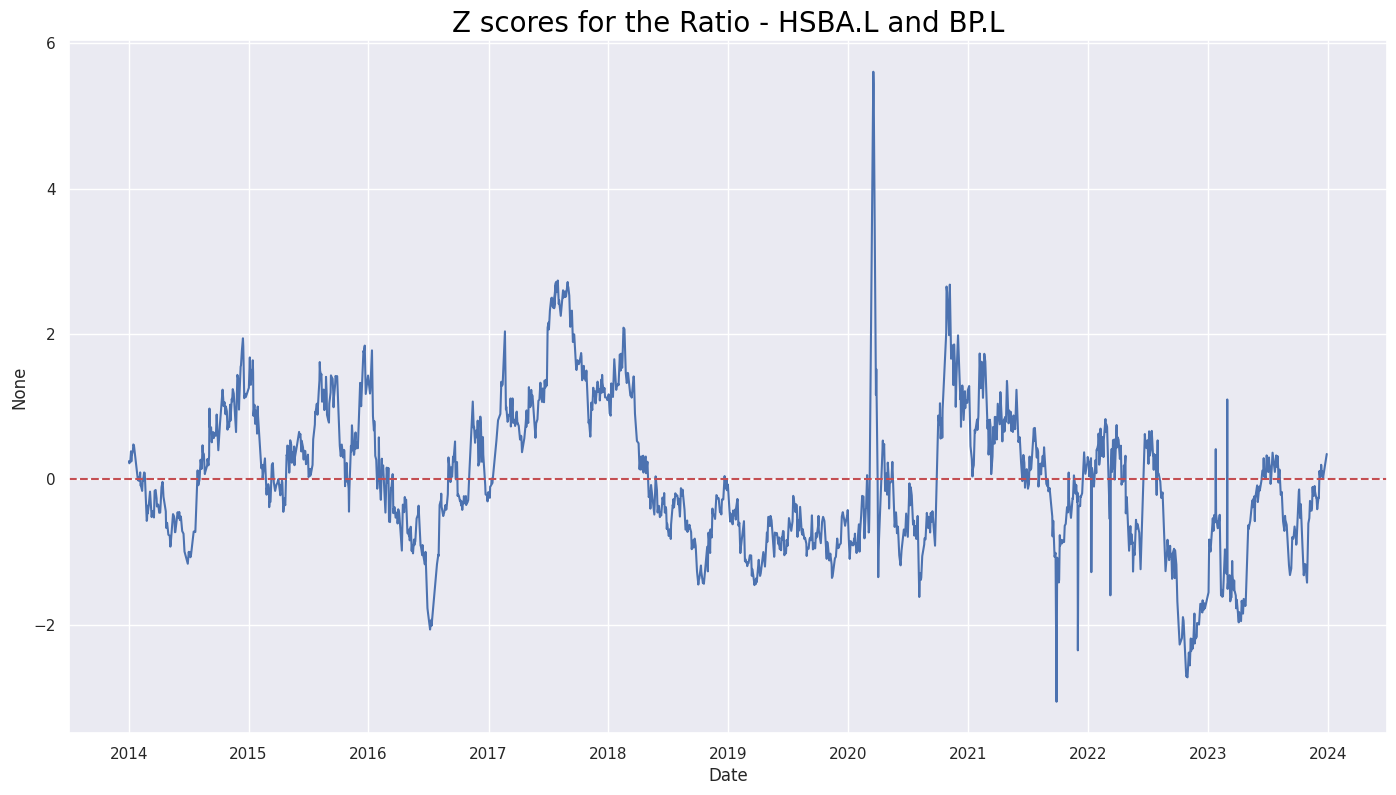

In [175]:
# Plot Z-scores for HSBA.L and BP.L 

plt.figure(figsize=(17, 9))
zscores = zscore(ratios)  # Calculate Z-scores of the ratios
sns.lineplot(x=ratios.index, y=zscores)  # Plot the Z-scores
plt.axhline(y=zscores.mean(), color='r', linestyle='--')  # Plot the mean line of Z-scores
plt.title('Z scores for the Ratio - HSBA.L and BP.L', color='black', fontsize=20)
plt.show()

In [176]:
# The problem with correlation is that it is not often used in real pairs trading. Just because two price series are correlated, we do not know that they will be profitable. We would like to know that if there is a price difference between two stocks that grows, that it will shrink in the future. Two stocks can be correlated if there is a price ratio that keeps on growing without a return towards a fixed value.

# We will try another pair before looking at another statistical property called cointegration.

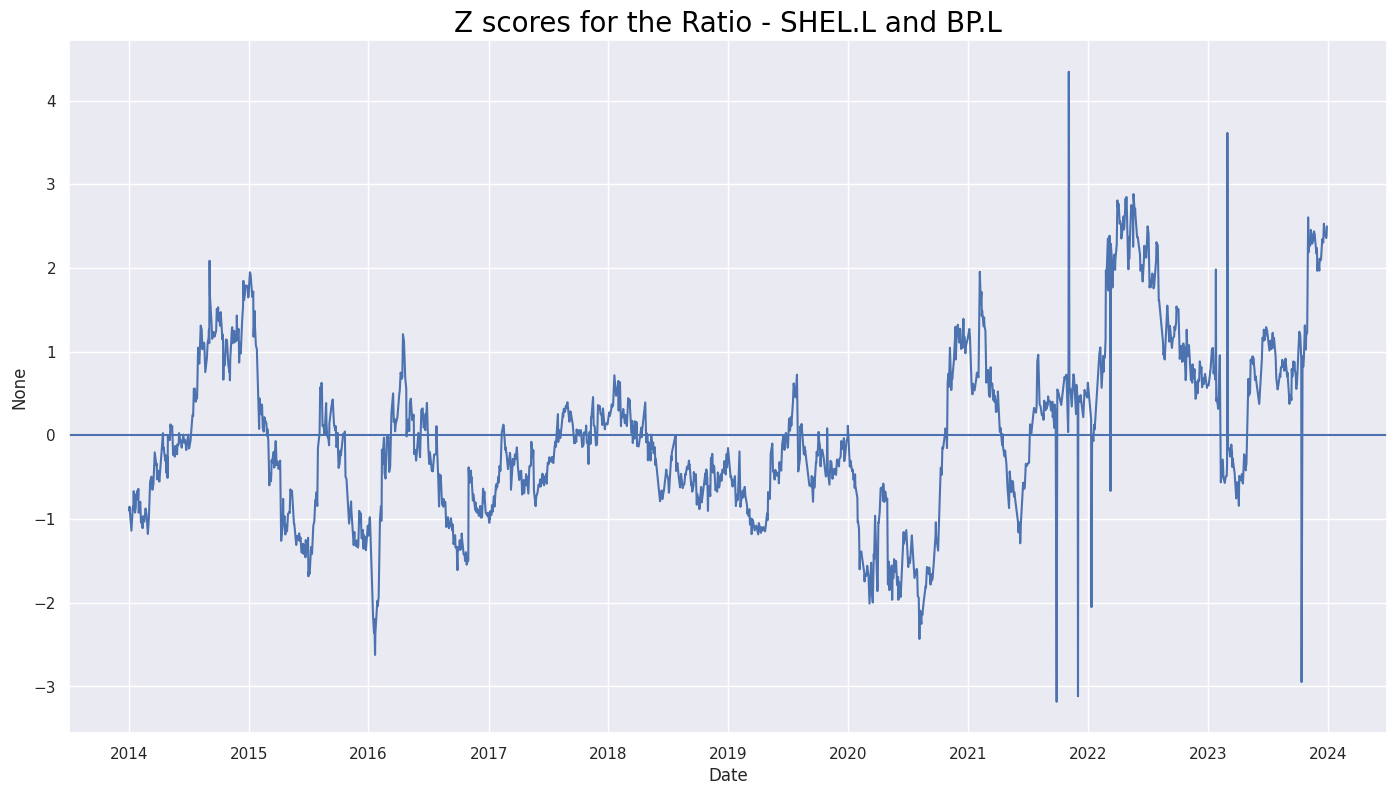

In [177]:
# Plot Z-scores for SHEL.L and BP.L 

plt.figure(figsize=(17, 9))
zscores2 = zscore(ratios2) # Let's transform to a series of Z-scores
sns.lineplot(x=ratios2.index, y=zscores2) # Make another line plot
plt.axhline(zscores2.mean()) 
plt.title('Z scores for the Ratio - SHEL.L and BP.L', color = 'black', fontsize = 20);

In [179]:
# Cointegration
# The most common test for Pairs Trading is the cointegration test. Cointegration is a statistical property of two or more time-series variables which indicates if a linear combination of the
# variables is stationary.

# It means that the ratio we computed will revert back to some mean value as opposed to drifting higher or lower over time. While correlation is the statistical tendency of two variables to move together,
# cointegration is a slightly stricter requirement.

In [180]:
# Augmented Dickey-Fuller test to check stationarity

def stationarity(a, cutoff = 0.05):
    a = np.ravel(a)
    if adfuller(a)[1] < cutoff:
      print('The series is stationary')
      print('p-value = ', adfuller(a)[1])
    else:
      print('The series is NOT stationary')
      print('p-value = ', adfuller(a)[1])

In [194]:
# Let us find a couple of stocks that cointegrate. Let's assume that such stocks would have been from the same inudstry, so let's try pharmaceuticals AZN.L and GSK.L 

In [196]:
stationarity(azn_historical['Close'])

The series is NOT stationary
p-value =  0.8053715688365938


In [197]:
stationarity(gsk_historical['Close'])

The series is stationary
p-value =  0.0041243288371214555


In [198]:
cointegration(azn_historical['Close'], gsk_historical['Close'])

The series are NOT cointegrated
p-value =  0.9303861263324213


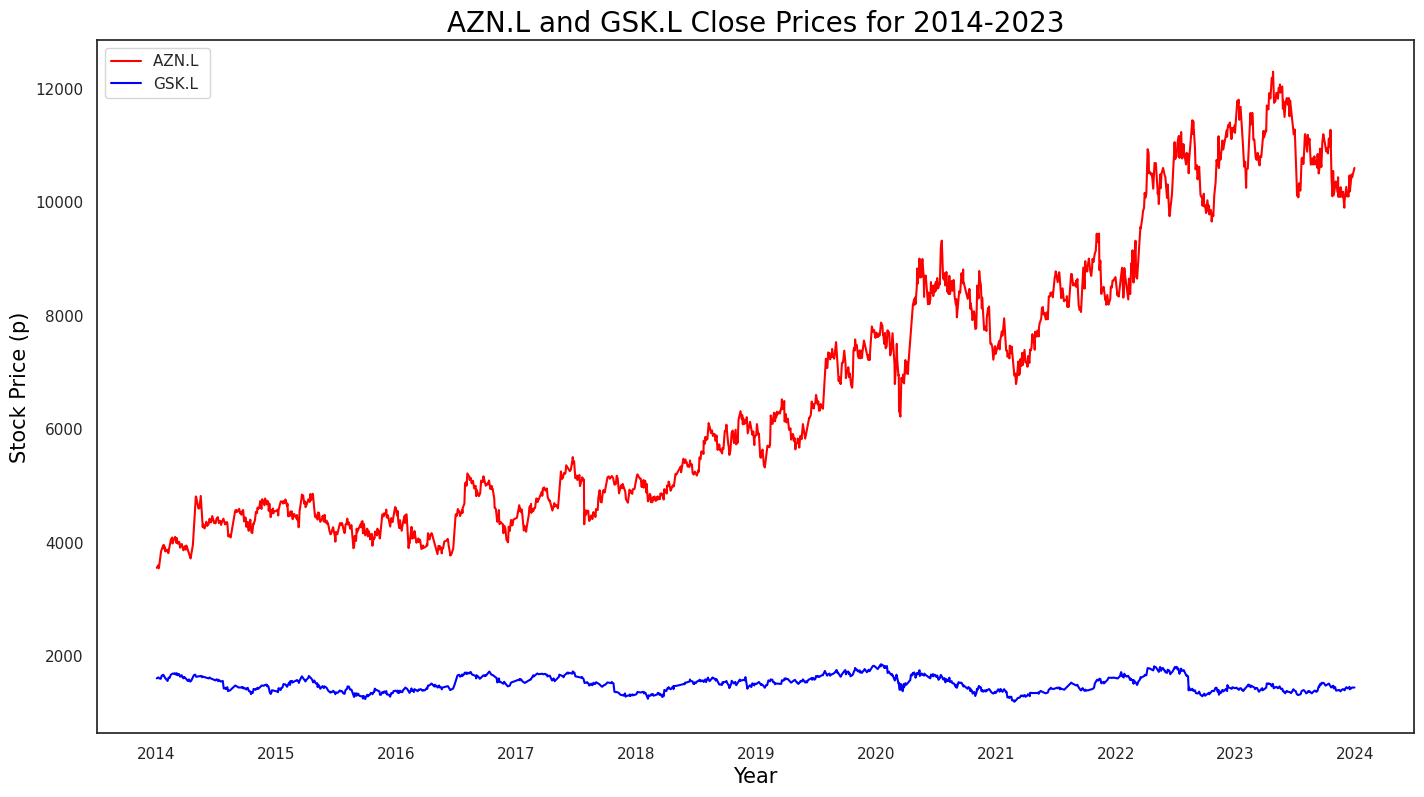

In [200]:
# Plot AZN.L and GSK.L stocks

def stocks_azn_gsk():
  plt.figure(figsize=(17, 9))
  plt.plot(ftse100_stocks_close.index, azn_historical['Close'], label = 'AZN.L ', color= 'red')
  plt.plot(ftse100_stocks_close.index, gsk_historical['Close'], label = 'GSK.L', color= 'blue')
  plt.title("AZN.L and GSK.L Close Prices for 2014-2023", color = 'black', fontsize = 20)
  plt.xlabel('Year', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend(loc='upper left')
  plt.show()

stocks_azn_gsk()

In [201]:
# Although both companies (AstraZeneca and  GlaxoSmithKline) are from the same industry their stock do not exhibit cointegration. Let us experiment with oil and gas industry by takind Shell and BP: 

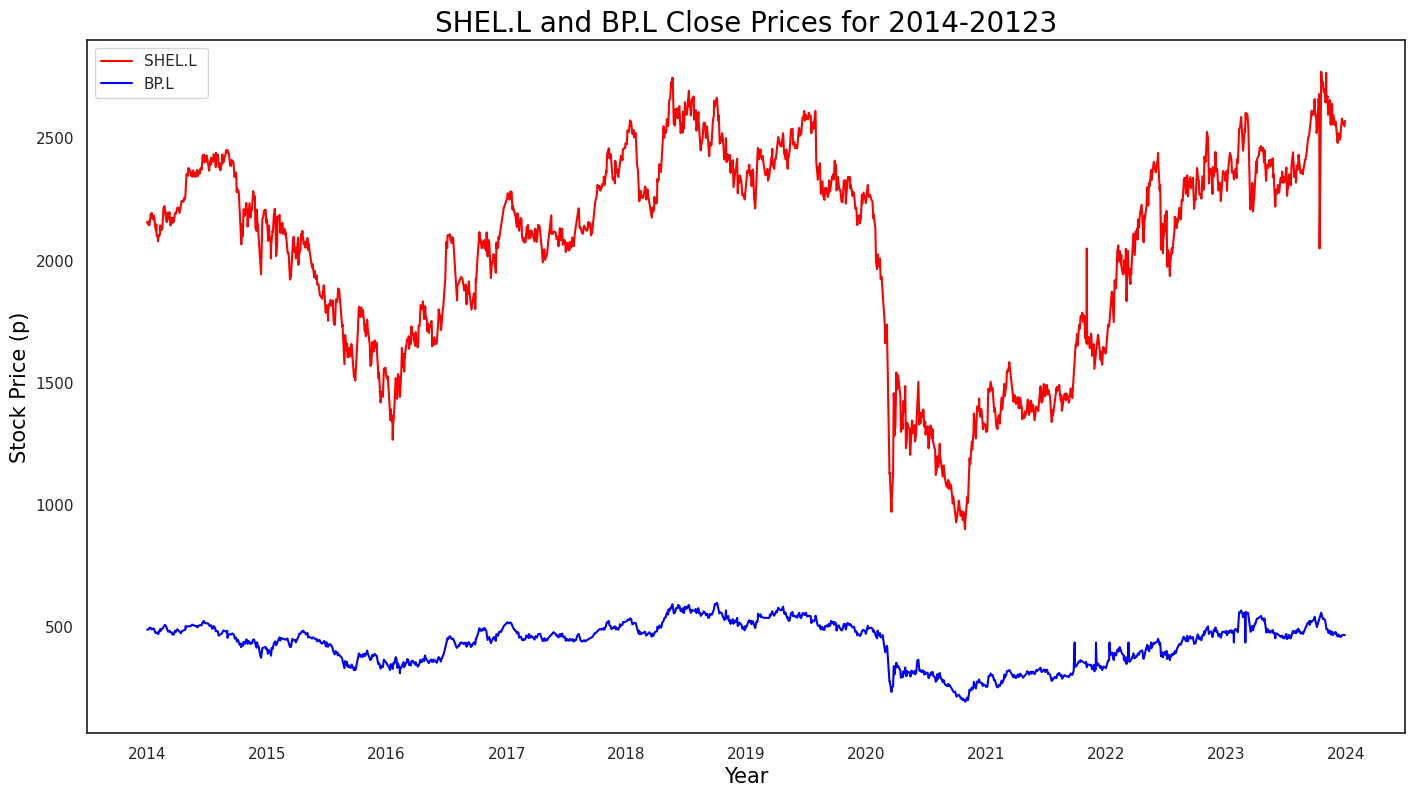

In [211]:
# Plot SHEL.L and BP.L stocks

def stocks_shel_bp():
  plt.figure(figsize=(17, 9))
  plt.plot(ftse100_stocks_close.index, shel_historical['Close'], label = 'SHEL.L ', color= 'red')
  plt.plot(ftse100_stocks_close.index, bp_historical['Close'], label = 'BP.L', color= 'blue')
  plt.title("SHEL.L and BP.L Close Prices for 2014-20123", color = 'black', fontsize = 20)
  plt.xlabel('Year', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend(loc='upper left')
  plt.show()

stocks_rdsb_bp()

In [204]:
stationarity(shel_historical['Close'])

The series is NOT stationary
p-value =  0.38669633815094756


In [205]:
stationarity(bp_historical['Close'])

The series is NOT stationary
p-value =  0.19346039553283373


In [206]:
cointegration(shel_historical['Close'], bp_historical['Close'])

The series are NOT cointegrated
p-value =  0.15209221426201636


In [207]:
# Despite being from the same industry both stocks do not exhibit cointegration either. So let's attempt the same excecise with our honorable Guinea Pogs (HSBA.L and BP.L)

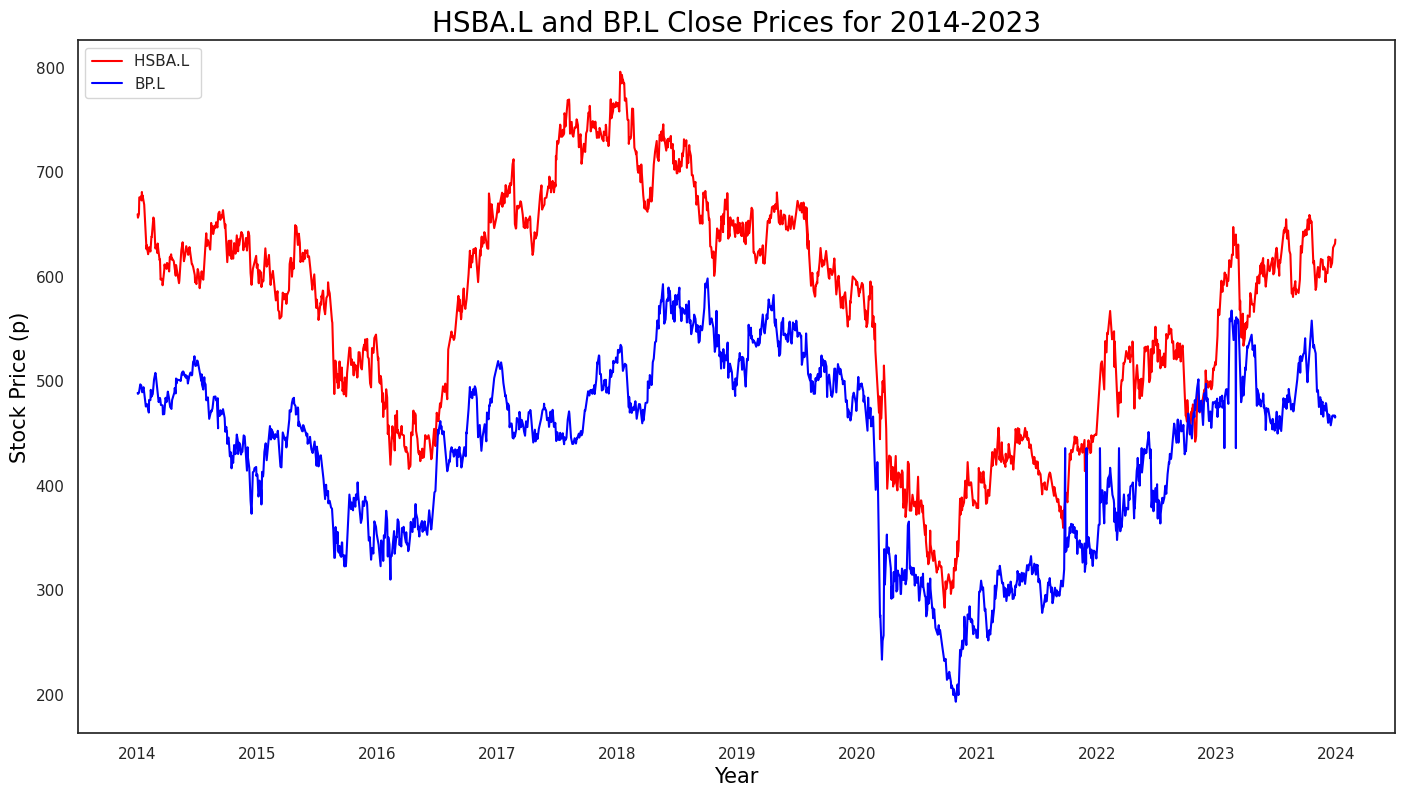

In [212]:
# Plot HSBA.L and BP.L stocks

def stocks_hsba_bp():
  plt.figure(figsize=(17, 9))
  plt.plot(ftse100_stocks_close.index, hsba_historical['Close'], label = 'HSBA.L ', color= 'red')
  plt.plot(ftse100_stocks_close.index, bp_historical['Close'], label = 'BP.L', color= 'blue')
  plt.title("HSBA.L and BP.L Close Prices for 2014-2023", color = 'black', fontsize = 20)
  plt.xlabel('Year', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend(loc='upper left')
  plt.show()

stocks_hsba_bp()

In [181]:
stationarity(hsba_historical['Close'])

The series is NOT stationary
p-value =  0.3833063827506482


In [182]:
stationarity(bp_historical['Close'])

The series is NOT stationary
p-value =  0.19346039553283373


In [183]:
# Neither HSBA.L nor BP.L are stationary. 

In [184]:
# Check cointegration

def cointegration(a, b):
    if coint(a, b)[1] < 0.05:
      print('The series are cointegrated')
      print('p-value = ', coint(a,b)[1])  
    else:
      print('The series are NOT cointegrated')
      print('p-value = ', coint(a,b)[1])  

In [185]:
cointegration(hsba_historical['Close'], bp_historical['Close'])

The series are cointegrated
p-value =  0.013197198264516279


In [208]:
# Although HSBC and BP stocks are from different industries they seem to be well conintegrated. This is uncharacteristic, however not unexpected.
# To understand why stock pairs from the same industry do not exhibit cointegration, when a stock pair from the different industries does severl factors need to be considered: 
# - Different Company Fundamentals: Even within the same industry, companies can have vastly different fundamentals, including growth rates, debt levels, profitability, and management strategies.
#   These differences can lead to diverging stock performances over time, even though they may share some common sector-specific risks and opportunities.

# - Market Sentiment and Investor Perceptions: Stock prices are influenced by investor sentiment, which can vary significantly between companies based on news, earnings reports, 
# and broader economic conditions. For instance, one company may be seen as an innovator or may have a stronger pipeline of products, affecting its stock differently than its peers.

# - External and Internal Shocks: Companies within the same industry can be affected differently by external shocks (such as changes in oil prices for BP.L and SHEL.L or regulatory
#   changes for AZN.L and GSK.L) and internal shocks (such as litigation, scandals, or breakthroughs in research and development). 
#   These events can lead to temporary or permanent divergences in stock price trajectories.

# - Cointegration is a Long-Term Relationship: Cointegration tests for a long-term equilibrium relationship between time series, allowing for short-term deviations. 
#   The fact that two stocks are not cointegrated does not mean they don't move together over certain periods; it simply means their prices do not adhere to a stable, 
#   long-term equilibrium ratio. Markets and economic conditions evolve, which can disrupt previously stable relationships.

#  - Sector and Market Dynamics: Industries evolve over time, with new technologies, competitive dynamics, regulatory changes, and global economic factors influencing companies differently.
#    For example, in the pharmaceutical industry, the success or failure of new drug approvals can significantly impact stock prices and may not affect all companies in the same way.

In [210]:
# Cointegration test 

coint_t, pval, crit_val = coint(stock3, stock4) # It is nearly as easy to use cointegration
print(f'The test statistic is {coint_t}, the p-value is {pval} \n and the critical values to be significant at the 1% / 5% / 10% levels are {crit_val}')

The test statistic is -2.843978048449428, the p-value is 0.15209221426201636 
 and the critical values to be significant at the 1% / 5% / 10% levels are [-3.90078437 -3.33855187 -3.04613078]


In [222]:
# Let's combine data for both stocks for further analysis
guineapig_stocks_df = pd.DataFrame({"HSBA.L": hsba_historical.Close,
                                "BP.L": bp_historical.Close
                                })
guineapig_stocks_df.head()

HSBA.L        BP.L
Date                              
2014-01-02  659.700012  488.850006
2014-01-03  656.400024  487.899994
2014-01-06  660.000000  488.950012
2014-01-07  675.799988  494.000000
2014-01-08  674.500000  492.850006

In [223]:
# check for stationarity is the ratio between the two stocks

guineapig_stocks_df['Ratio'] = hsba_historical['Close'] / bp_historical['Close']

guineapig_ratio = guineapig_stocks_df.iloc[:, 2]

stationarity(guineapig_ratio)

The series is stationary
p-value =  0.0020364152408213474


In [224]:
# Dataframe with Ratio column

guineapig_stocks_df

HSBA.L        BP.L     Ratio
Date                                        
2014-01-02  659.700012  488.850006  1.349494
2014-01-03  656.400024  487.899994  1.345358
2014-01-06  660.000000  488.950012  1.349831
2014-01-07  675.799988  494.000000  1.368016
2014-01-08  674.500000  492.850006  1.368571
...                ...         ...       ...
2023-12-21  622.500000  466.250000  1.335121
2023-12-22  627.799988  467.200012  1.343750
2023-12-27  631.500000  467.200012  1.351669
2023-12-28  631.599976  465.200012  1.357696
2023-12-29  635.500000  466.149994  1.363295

[2525 rows x 3 columns]

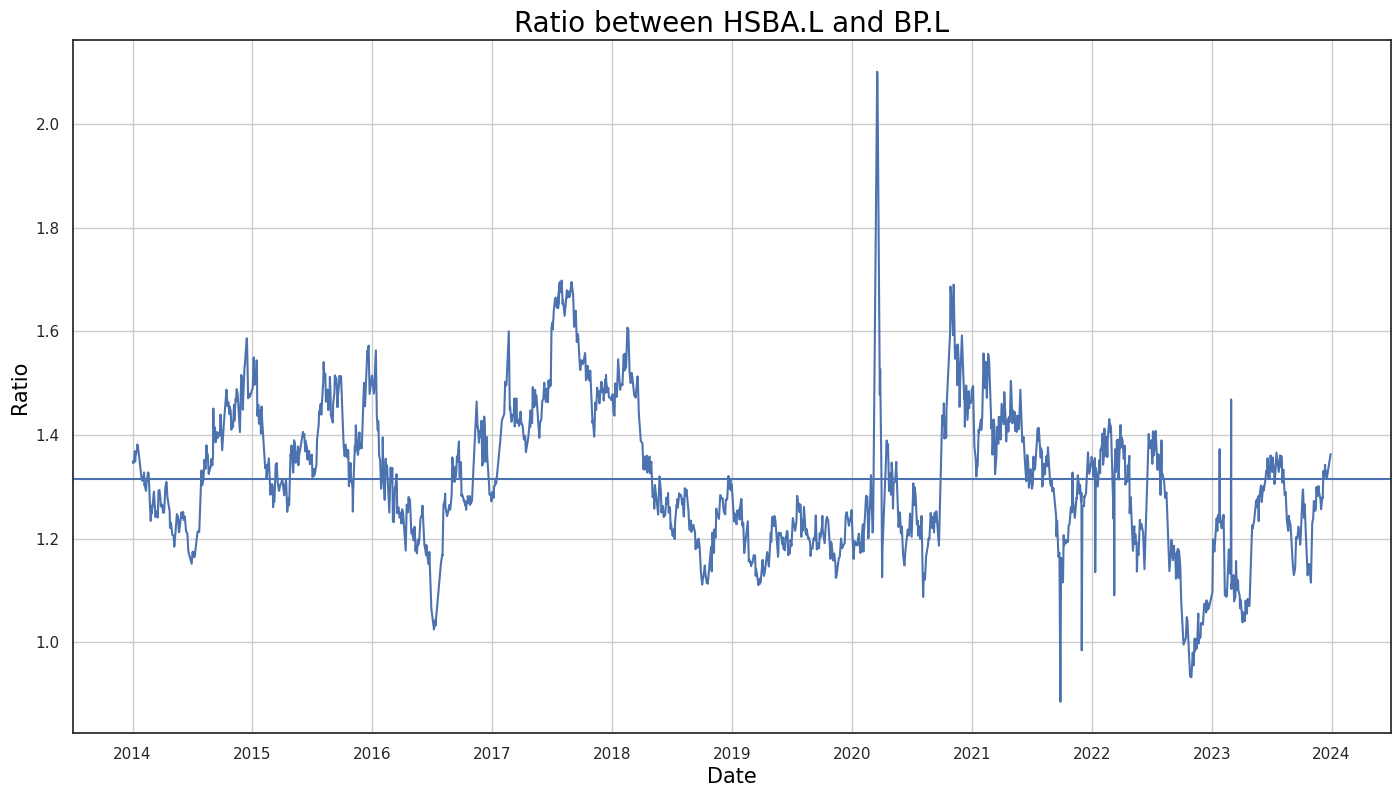

In [225]:
# Plot ratio between HSBA.L and BP.L

plt.figure(figsize=(17, 9))
sns.lineplot(x=guineapig_stocks_df.index, y=guineapig_stocks_df.Ratio) 
plt.axhline(guineapig_stocks_df.Ratio.mean())
plt.grid(True)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Ratio', color = 'black', fontsize = 15)
plt.title('Ratio between HSBA.L and BP.L', color = 'black', fontsize = 20);

In [226]:
# Calculating the ratio between HSBA.L and BP.L and plotting it shows that the stocks appear to vary around a constant mean, and the spread appears to satisfy the stationarity test as well.

In [227]:
# Further work could include backtesting a dollar-neutral pairs trading strategy on HSBA.L and BP.L with following conditions:

holding_period = 60
lookback = 9
upper_barrier = 2
lower_barrier = -2


In [228]:
# Add column for the mean

guineapig_stocks_df['Mean'] = ''


In [229]:
# Standardisation assuming the spread

for i in range(len(guineapig_stocks_df)):
  try:
    guineapig_stocks_df.iloc[i, 3] = (guineapig_stocks_df.iloc[i - lookback:i + 1, 2].mean())
  except IndexError:
    pass

In [230]:
# Add column for Standard deviation

guineapig_stocks_df['StdDev'] = ''


In [231]:
# Calculate the Standard deviation

for i in range(len(guineapig_stocks_df)):
  guineapig_stocks_df.iloc[i, 4] = ((guineapig_stocks_df.iloc[i - lookback:i + 1, 2].std()))

In [232]:
# Add column for Standardised Ratio

guineapig_stocks_df['StdRatio'] = ''

In [233]:
# Standardise the ratio in order to normalise the signals

for i in range(len(guineapig_stocks_df)):
  guineapig_stocks_df.iloc[i, 5] = (guineapig_stocks_df.iloc[i, 2] - guineapig_stocks_df.iloc[i, 3]) / guineapig_stocks_df.iloc[i, 4]

In [234]:
guineapig_stocks_df

HSBA.L        BP.L     Ratio      Mean    StdDev  StdRatio
Date                                                                      
2014-01-02  659.700012  488.850006  1.349494       NaN       NaN       NaN
2014-01-03  656.400024  487.899994  1.345358       NaN       NaN       NaN
2014-01-06  660.000000  488.950012  1.349831       NaN       NaN       NaN
2014-01-07  675.799988  494.000000  1.368016       NaN       NaN       NaN
2014-01-08  674.500000  492.850006  1.368571       NaN       NaN       NaN
...                ...         ...       ...       ...       ...       ...
2023-12-21  622.500000  466.250000  1.335121  1.328022  0.009131  0.777359
2023-12-22  627.799988  467.200012  1.343750   1.33016  0.010111  1.344003
2023-12-27  631.500000  467.200012  1.351669  1.333406  0.011341  1.610413
2023-12-28  631.599976  465.200012  1.357696  1.334931  0.013509  1.685072
2023-12-29  635.500000  466.149994  1.363295  1.337043  0.016159  1.624634

[2525 rows x 6 columns]

In [235]:
# Clean up data by dropping NaNs
guineapig_stocks_df.dropna(inplace=True)
guineapig_stocks_df

HSBA.L        BP.L     Ratio      Mean    StdDev  StdRatio
Date                                                                      
2014-01-15  681.000000  492.850006  1.381759  1.360706  0.011996  1.755042
2014-01-16  673.900024  489.450012  1.376852  1.363442  0.012271  1.092795
2014-01-17  677.700012  491.049988  1.380104  1.366917  0.011475  1.149251
2014-01-20  673.000000  494.299988  1.361521  1.368086  0.010047 -0.653345
2014-01-21  673.900024  491.299988  1.371667  1.368451  0.010111  0.318109
...                ...         ...       ...       ...       ...       ...
2023-12-21  622.500000  466.250000  1.335121  1.328022  0.009131  0.777359
2023-12-22  627.799988  467.200012  1.343750   1.33016  0.010111  1.344003
2023-12-27  631.500000  467.200012  1.351669  1.333406  0.011341  1.610413
2023-12-28  631.599976  465.200012  1.357696  1.334931  0.013509  1.685072
2023-12-29  635.500000  466.149994  1.363295  1.337043  0.016159  1.624634

[2516 rows x 6 columns]

In [236]:
# Check data types

guineapig_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-15 to 2023-12-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HSBA.L    2516 non-null   float64
 1   BP.L      2516 non-null   float64
 2   Ratio     2516 non-null   float64
 3   Mean      2516 non-null   object 
 4   StdDev    2516 non-null   object 
 5   StdRatio  2516 non-null   object 
dtypes: float64(3), object(3)
memory usage: 137.6+ KB


In [237]:
# Convert data types for Mean and StdDev from object to float

guineapig_stocks_df["Mean"] = guineapig_stocks_df.Mean.astype(float)
guineapig_stocks_df["StdDev"] = guineapig_stocks_df.StdDev.astype(float)
guineapig_stocks_df["StdRatio"] = guineapig_stocks_df.StdRatio.astype(float)

In [238]:
# Check data types

guineapig_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-15 to 2023-12-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HSBA.L    2516 non-null   float64
 1   BP.L      2516 non-null   float64
 2   Ratio     2516 non-null   float64
 3   Mean      2516 non-null   float64
 4   StdDev    2516 non-null   float64
 5   StdRatio  2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


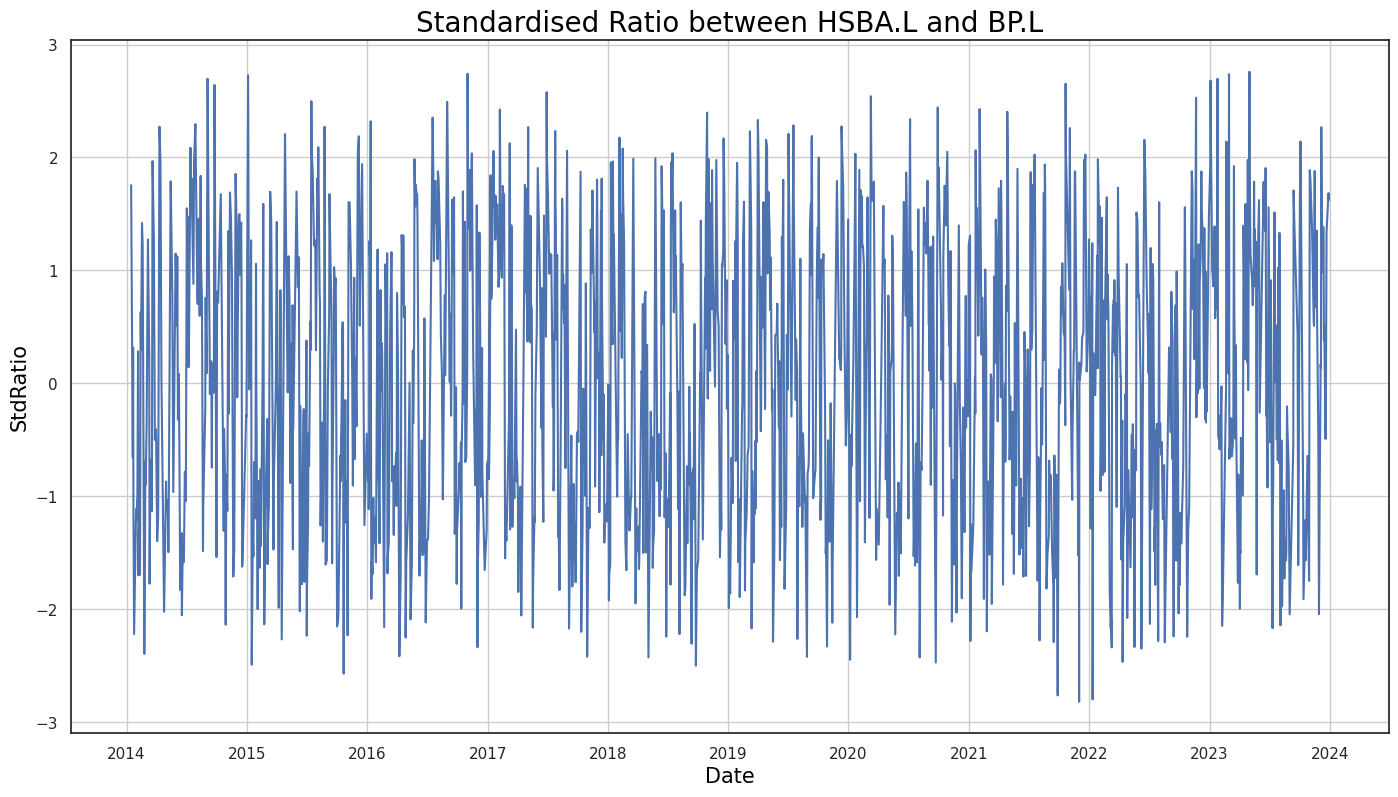

In [239]:
# Plot Standardised Ratio between HSBA.L and BP.L

plt.figure(figsize=(17, 9))
sns.lineplot(x=guineapig_stocks_df.index, y=guineapig_stocks_df.StdRatio) 
plt.grid(True)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('StdRatio', color = 'black', fontsize = 15)
plt.title('Standardised Ratio between HSBA.L and BP.L', color = 'black', fontsize = 20);

In [240]:
# The arbitrarily chosen barriers of 2 and -2 would be used to initiate trades. If the standardised ratio reached -2 we would go long the ratio, and if it reached 2 we would short the ratio.

In [241]:
# Volume Trading Strategies
# Volume trading is a measure of how much of a given financial asset has traded in a period of time. Volume traders look for instances of increased buying or selling orders. 
# They also pay attention to current price trends and potential price movements. Generally, increased trading volume will lean heavily towards buy orders.

In [242]:
# On Balance Volume (OBV)
# OBV is a momentum-based indicator which measures volume flow to gauge the direction of the trend. Volume and price rise are directly proportional and OBV can be used as a confirmation tool 
# with regards to price trends. A rising price is depicted by a rising OBV and a falling OBV stands for a falling price.

# It is a cumulative total of the up and down volume. When the close is higher than the previous close, the volume is added to the running total, and when the close is lower than the previous close, 
# the volume is subtracted from the running total.

In [243]:
# Create copy of dataframe for HSBA.L stock

hsba_obv = hsba.copy()
hsba_obv

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  658.400024  661.200012  654.599976  659.700012  383.506287   
2014-01-03  653.000000  659.388000  649.796997  656.400024  381.587799   
2014-01-06  658.099976  664.299988  656.388000  660.000000  383.680542   
2014-01-07  659.799988  678.400024  659.599976  675.799988  392.865692   
2014-01-08  673.099976  677.940979  671.911011  674.500000  392.110046   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2014-01-02  15181957  
2014-01-03  15846261  
2014-01-06  26415293  
2014-01-07  31453649  
2014-01-08  24154793  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[2525 rows x 6 columns]

In [244]:
# Create dataframe for slice of HSBA.L stock for 6 months July - Dec 2023

hsba_obv_6mo = hsba_obv['2023-07-01':'2023-12-31']
hsba_obv_6mo

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-03  623.000000  628.500000  622.200012  627.599976  611.611694   
2023-07-04  627.000000  628.200012  623.599976  624.700012  608.785645   
2023-07-05  620.799988  624.000000  617.599976  621.900024  606.056946   
2023-07-06  615.000000  617.028992  608.099976  610.400024  594.849915   
2023-07-07  608.299988  614.770020  606.700012  609.900024  594.362610   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume  
Date                  
2023-07-03  21193781  
2023-07-04   8538299  
2023-07-05  39669655  
2023-07-06  19028428  
2023-07-07  34212718  
...              ...  
2023-12-21  21034187  
2023-12-22  10833490  
2023-12-27  16151929  
2023-12-28   9952106  
2023-12-29   5844099  

[127 rows x 6 columns]

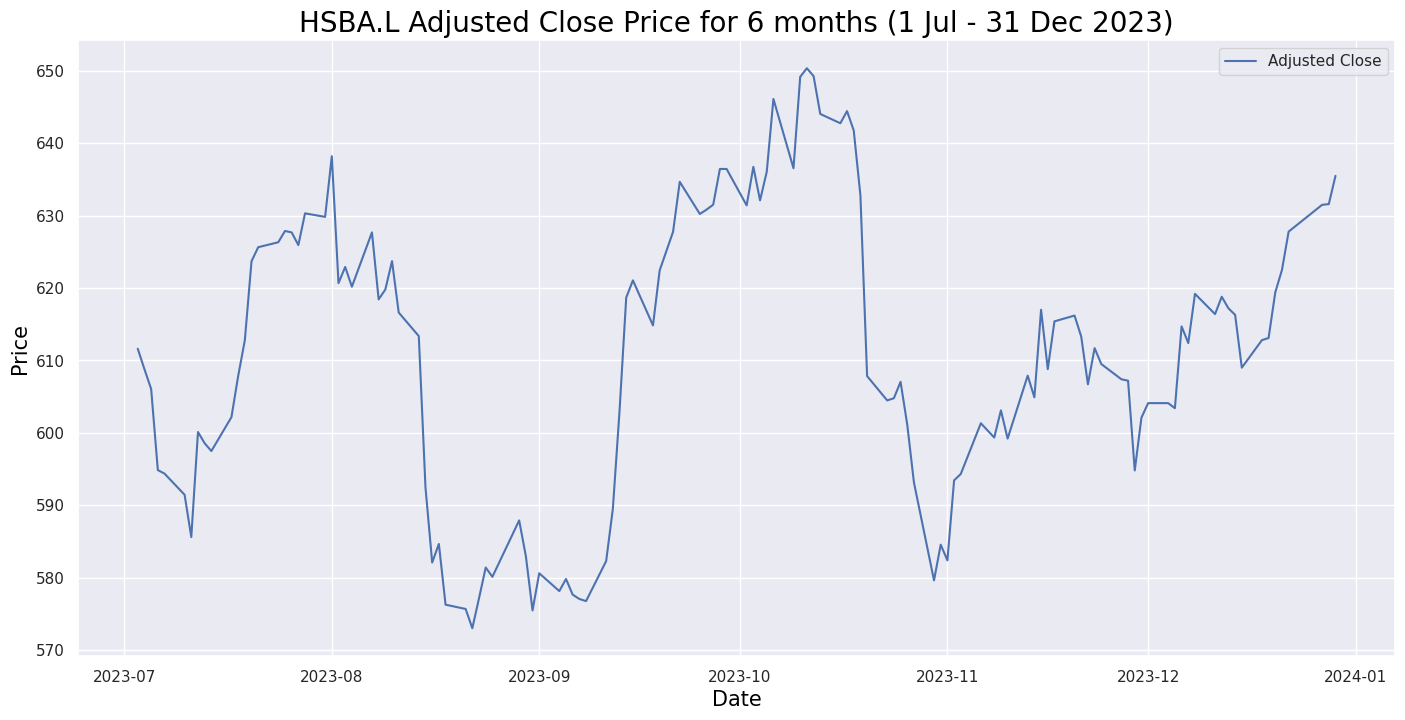

In [246]:
# Plot HSBA.L Adjusted Close price for the time period

def obv_adj():
  plt.figure(figsize=(17, 8))
  plt.plot(hsba_obv_6mo['Adj Close'], label = 'Adjusted Close')
  plt.title('HSBA.L Adjusted Close Price for 6 months (1 Jul - 31 Dec 2023)', color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Price', color = 'black', fontsize = 15)
  plt.legend()
  plt.show()

sns.set_theme()
obv_adj()

In [247]:
# Calculate the OBV

OBV = []
OBV.append(0)

for i in range(1, len(hsba_obv_6mo['Adj Close'])):
  if hsba_obv_6mo['Adj Close'][i] > hsba_obv_6mo['Adj Close'][i-1]:
    OBV.append(OBV[-1] + hsba_obv_6mo.Volume[i])
  elif hsba_obv_6mo['Adj Close'][i] < hsba_obv_6mo['Adj Close'][i-1]:
    OBV.append(OBV[-1] - hsba_obv_6mo.Volume[i])
  else:
    OBV.append(OBV[-1])

In [248]:
# Store OBV and OBV EMA in new columns

hsba_obv_6mo['OBV'] = OBV
hsba_obv_6mo['OBV_EMA'] = hsba_obv_6mo['OBV'].ewm(span=20).mean()
hsba_obv_6mo

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-03  623.000000  628.500000  622.200012  627.599976  611.611694   
2023-07-04  627.000000  628.200012  623.599976  624.700012  608.785645   
2023-07-05  620.799988  624.000000  617.599976  621.900024  606.056946   
2023-07-06  615.000000  617.028992  608.099976  610.400024  594.849915   
2023-07-07  608.299988  614.770020  606.700012  609.900024  594.362610   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume        OBV       OBV_EMA  
Date                                           
2023-07-03  21193781          0  0.000000e+00  
2023-07-04   8538299   -8538299 -4.482607e+06  
2023-07-05  39669655  -48207954 -2.053829e+07  
2023-07-06  19028428  -67236382 -3.401931e+07  
2023-07-07  34212718 -101449100 -5.033000e+07  
...              ...        ...           ...  
2023-12-21  21034187  291420870  2.589846e+08  
2023-12-22  10833490  302254360  2.631055e+08  
2023-12-27  16151929  318406289  2.683723e+08  
2023-12-28   9952106  328358395  2.740853e+08  
2023-12-29   5844099  334202494  2.798107e+08  

[127 rows x 8 columns]

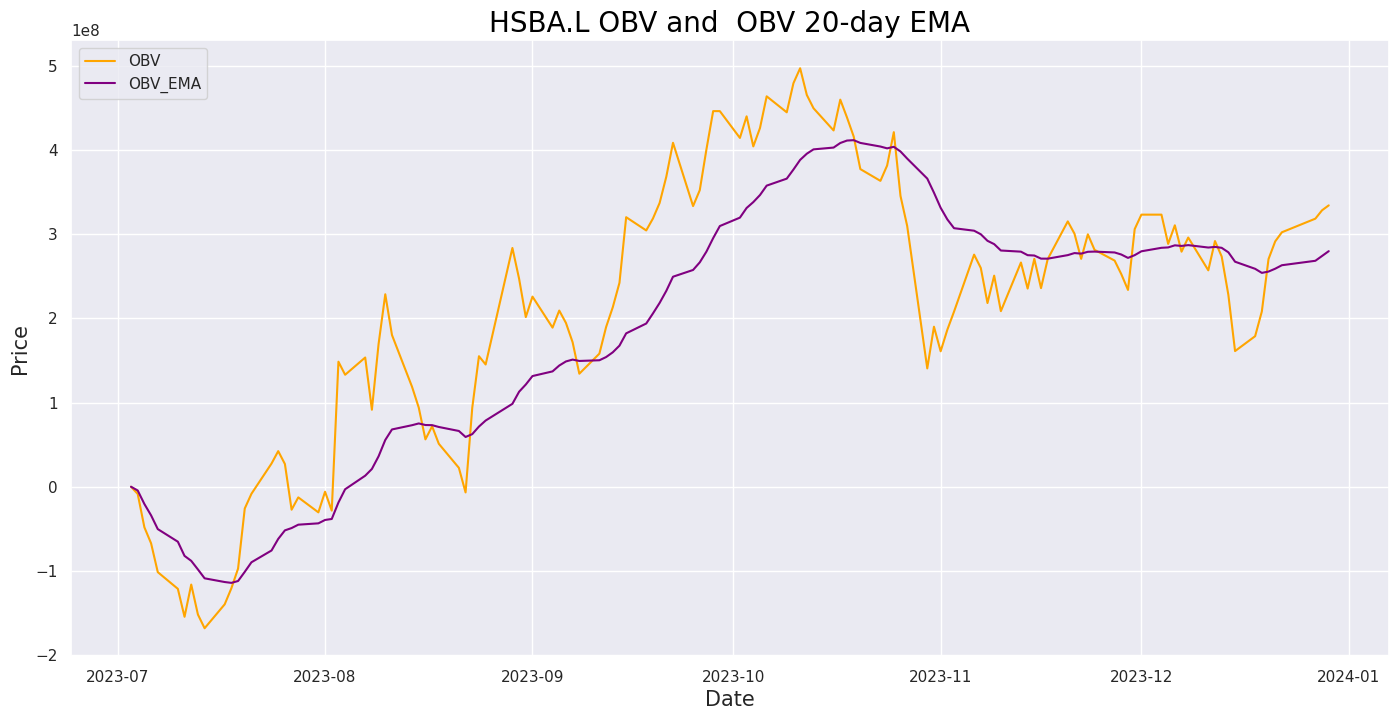

In [250]:
# Plot OBV and OBV with EMA of 20 days

def obv_ema():
  plt.figure(figsize=(17, 8))
  plt.plot(hsba_obv_6mo['OBV'], label = 'OBV', color = 'orange')
  plt.plot(hsba_obv_6mo['OBV_EMA'], label = 'OBV_EMA', color = 'purple')
  plt.title('HSBA.L OBV and  OBV 20-day EMA', color = 'black', fontsize = 20)
  plt.xlabel('Date', fontsize = 15)
  plt.ylabel('Price', fontsize = 15)
  plt.legend(loc = 'upper left')
  plt.show()


sns.set_theme()
obv_ema()

In [251]:
# The strategy is to buy the stock whenever the OBV goes above the OBV EMA and sell whenever the OBV EMA goes above the OBV.

In [252]:
# Create function to signal when to buy and sell the stock
# If OBV > OBV_EMA then buy
# If OBV < OBV_EMA then sell
# Else do nothing

def buy_sell_obv(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(0, len(signal)):
    # If OBV > OBV_EMA then buy --> col1 => If OBV < OBV_EMA then sell => 'OBV_EMA'
    if signal[col1][i] > signal[col2][i] and flag != 1:
      sigPriceBuy.append(signal['Adj Close'][i])
      sigPriceSell.append(np.nan)
      flag = 1
     # If OBV < OBV_EMA then sell
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['Adj Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPriceSell.append(np.nan)
      sigPriceBuy.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [253]:
# Create buy and sell columns

x = buy_sell_obv(hsba_obv_6mo, 'OBV', 'OBV_EMA')
hsba_obv_6mo['Buy_Signal_Price'] = x[0]
hsba_obv_6mo['Sell_Signal_Price'] = x[1]

hsba_obv_6mo

Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-03  623.000000  628.500000  622.200012  627.599976  611.611694   
2023-07-04  627.000000  628.200012  623.599976  624.700012  608.785645   
2023-07-05  620.799988  624.000000  617.599976  621.900024  606.056946   
2023-07-06  615.000000  617.028992  608.099976  610.400024  594.849915   
2023-07-07  608.299988  614.770020  606.700012  609.900024  594.362610   
...                ...         ...         ...         ...         ...   
2023-12-21  619.299988  624.877014  615.299988  622.500000  622.500000   
2023-12-22  623.500000  628.900024  622.200012  627.799988  627.799988   
2023-12-27  628.200012  636.598999  624.099976  631.500000  631.500000   
2023-12-28  631.200012  633.700012  629.299988  631.599976  631.599976   
2023-12-29  632.700012  635.500000  632.099976  635.500000  635.500000   

Price         Volume        OBV       OBV_EMA  Buy_Signal_Price  \
Date                                                              
2023-07-03  21193781          0  0.000000e+00               NaN   
2023-07-04   8538299   -8538299 -4.482607e+06               NaN   
2023-07-05  39669655  -48207954 -2.053829e+07               NaN   
2023-07-06  19028428  -67236382 -3.401931e+07               NaN   
2023-07-07  34212718 -101449100 -5.033000e+07               NaN   
...              ...        ...           ...               ...   
2023-12-21  21034187  291420870  2.589846e+08               NaN   
2023-12-22  10833490  302254360  2.631055e+08               NaN   
2023-12-27  16151929  318406289  2.683723e+08               NaN   
2023-12-28   9952106  328358395  2.740853e+08               NaN   
2023-12-29   5844099  334202494  2.798107e+08               NaN   

Price       Sell_Signal_Price  
Date                           
2023-07-03                NaN  
2023-07-04         608.785645  
2023-07-05                NaN  
2023-07-06                NaN  
2023-07-07                NaN  
...                       ...  
2023-12-21                NaN  
2023-12-22                NaN  
2023-12-27                NaN  
2023-12-28                NaN  
2023-12-29                NaN  

[127 rows x 10 columns]

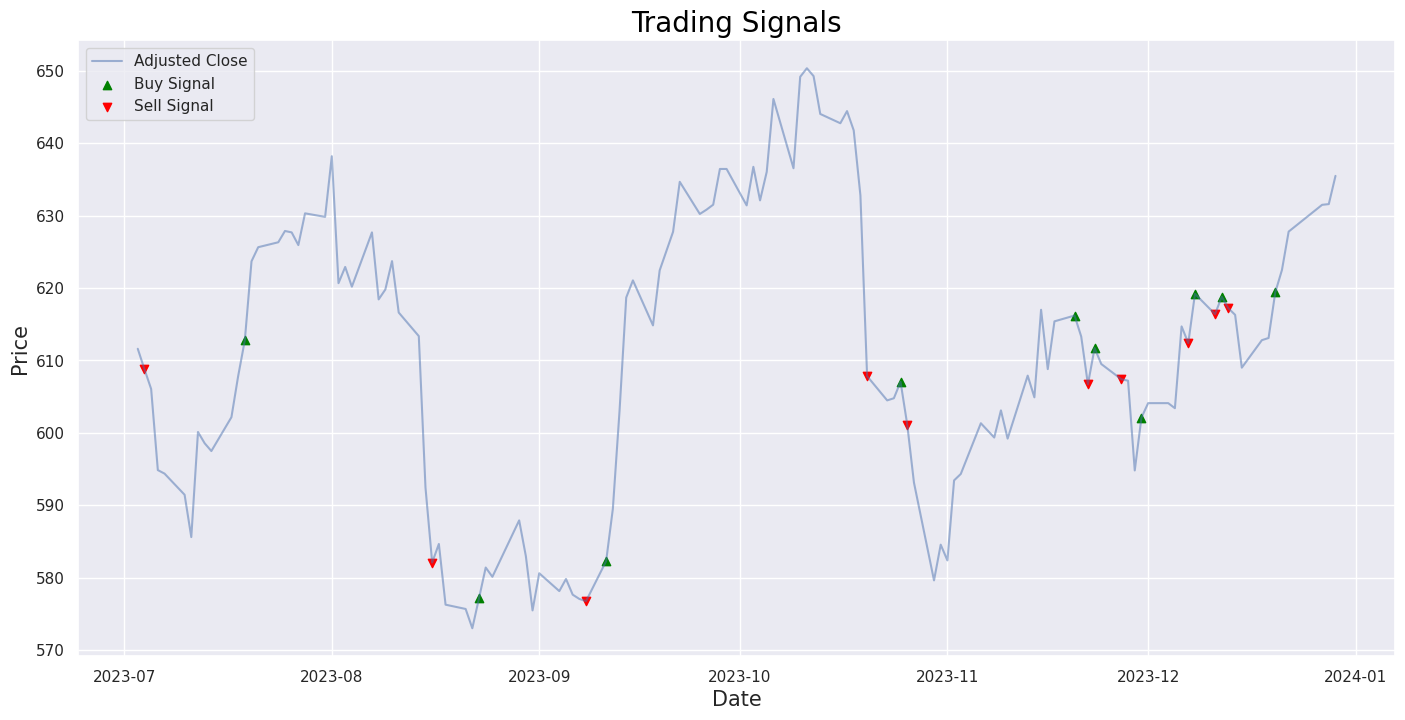

In [254]:
# Plot buy and sell trading signals

def obv_sig():
  plt.figure(figsize=(17, 8))
  plt.plot(hsba_obv_6mo['Adj Close'], label = 'Adjusted Close', alpha = 0.5)
  plt.scatter(hsba_obv_6mo.index, hsba_obv_6mo['Buy_Signal_Price'], label = 'Buy Signal', marker = '^', alpha = 1, color = 'green')
  plt.scatter(hsba_obv_6mo.index, hsba_obv_6mo['Sell_Signal_Price'], label = 'Sell Signal', marker = 'v', alpha = 1, color = 'red')
  plt.title('Trading Signals', color = 'black', fontsize = 20)
  plt.xlabel('Date', fontsize = 15)
  plt.ylabel('Price', fontsize = 15)
  plt.legend(loc = 'upper left')
  plt.show()


sns.set_theme()
obv_sig()

In [ ]:
# Conclusion
# It is almost certainly better to choose technical indicators that complement each other, not just those that move in unison and generate the same signals.
# The intuition here is that the more indicators you have that confirm each other, the better your chances are to profit. This can be done by combining strategies to form a system, 
# and looking for multiple signals.